## El sistema de pensions actual és sostenible?
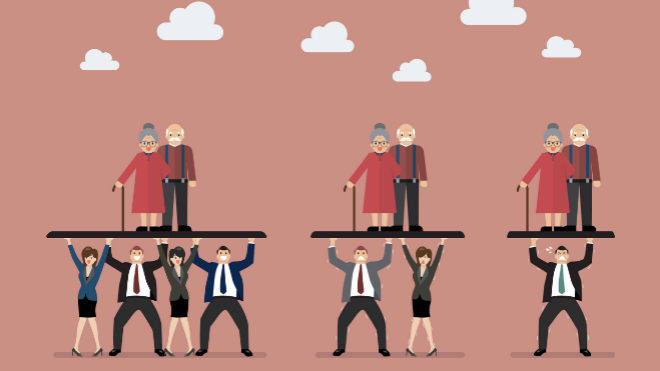

In [1]:
import pandas as pd
import numpy as np
# Gràfics utilitzats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns 
import statsmodels.api as sm
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import display, clear_output
from PIL import Image
import lightgbm as lgb
from sklearn import metrics
##Preprocessat
from sklearn import preprocessing
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Metriques utilitzades
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
#Models utilitzats

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")


### 1. BASE DE DADES DE POBLACIÓ

# Font: https://population.un.org/wpp/Download/Documentation/Documentation/
Projeccions de l’ONU dades poblacionals per padró, per edat i sexes amb  del 2022 fins 2050. He pres nomes les dades d'Espanya (Hi ha la població global)i agafat amb una projecció estimada de fertilitat, mortalitat i migració internacional amb la "medium variant" ja que es considera la millor estimació en termes de projeccio i tendencies poblacionals.Per mes informació consultar la documentació al link adjunt.
Aquest escenari assumeix una continuació de les tendencies demogràfiques actuals, tant en fertilitat, mortalitat i migració internacional. 


In [2]:
#Llegim les dades poblacionals de la ONU del 1950 al 2022
population = pd.read_excel ('Population_Spain_estimates_UN.xlsx')
                            
pd.set_option('display.max_columns',None)
population = population.rename(columns={'Year': 'Any'})
population.head()

Index    Variant Region, subregion, country or area *  Notes  \
0  13397  Estimates                                Spain     24   
1  13398  Estimates                                Spain     24   
2  13399  Estimates                                Spain     24   
3  13400  Estimates                                Spain     24   
4  13401  Estimates                                Spain     24   

   Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**          Type  \
0            724             ESP              ES          724  Country/Area   
1            724             ESP              ES          724  Country/Area   
2            724             ESP              ES          724  Country/Area   
3            724             ESP              ES          724  Country/Area   
4            724             ESP              ES          724  Country/Area   

   Parent code   Any         0         1         2         3         4  \
0          925  1950  503.4260  546.8335  559.3575  526.6370  527.2370   
1          925  1951  495.9380  477.6295  542.1490  557.6580  523.6035   
2          925  1952  552.6625  487.3195  480.2435  541.9150  556.4285   
3          925  1953  565.0085  540.6480  488.4645  485.0415  542.9650   
4          925  1954  558.8350  554.2070  537.4805  491.2695  490.7600   

          5         6         7         8         9        10        11  \
0  532.7805  511.2795  480.1455  444.1595  471.4660  444.6245  389.8620   
1  525.5910  532.0605  508.5980  481.4880  443.4730  478.1380  442.9375   
2  522.4915  525.1390  531.4435  508.7440  481.7350  442.3405  477.0105   
3  555.8920  521.7585  524.9990  531.1005  509.0835  482.1130  441.3080   
4  544.5550  555.7030  521.2735  525.0690  530.9160  509.5210  482.5675   

         12        13        14        15        16        17        18  \
0  449.7825  507.5430  540.9625  535.2255  550.7290  570.6515  537.4320   
1  390.7995  450.7540  507.7495  538.1240  532.3865  547.2550  568.3285   
2  442.3100  391.9445  450.4920  503.5050  533.1245  526.9310  541.3305   
3  475.9780  441.7335  393.1200  450.2855  499.3620  528.2020  521.5395   
4  440.3520  474.9950  441.1775  394.3405  450.1370  495.2455  523.3065   

         19        20        21        22        23        24        25  \
0  537.0275  547.3895  542.2880  541.9445  512.0510  510.9015  497.6075   
1  530.5565  536.5820  543.0445  539.1935  535.5370  508.3925  507.3460   
2  561.7315  525.9695  532.5735  536.8760  530.8435  528.1485  502.9610   
3  535.5765  555.3135  521.6445  528.8130  530.9670  522.8320  521.0055   
4  516.2255  529.9130  549.0365  517.4240  525.1675  525.1875  514.8835   

         26        27        28        29        30        31        32  \
0  486.3165  486.5875  460.3940  456.8525  418.9470  370.6365  381.5320   
1  493.8390  482.4165  480.8780  456.4970  454.5915  413.8770  367.6855   
2  501.2595  488.6050  477.4655  476.2905  453.2445  450.9255  410.6545   
3  497.7685  495.3870  483.5945  472.8455  471.9490  450.2790  447.4795   
4  513.9435  492.6685  489.6270  478.7645  468.3385  467.7425  447.3940   

         33        34        35        36        37        38        39  \
0  369.2980  371.0025  382.1985  377.0860  375.9660  372.5160  408.6155   
1  378.0240  364.8230  367.3925  379.0425  373.3240  372.1570  371.5100   
2  365.9075  375.2650  362.0600  364.9710  376.0540  370.4620  369.9940   
3  407.5265  364.3435  372.6750  359.4390  362.7320  373.1465  367.7215   
4  444.0585  404.5455  362.8655  370.1240  356.8685  360.4640  370.2905   

         40        41        42        43        44        45        46  \
0  391.5910  351.7945  356.7280  341.4800  353.3825  352.4450  328.1930   
1  405.9740  388.0050  350.2105  353.5760  339.8960  352.3645  348.7235   
2  369.0365  400.8025  383.7135  348.0380  351.0850  337.7590  348.8480   
3  367.8940  366.7730  395.7605  379.4350  346.0890  348.5665  335.6940   
4  364.9795  365.8735  364.5205  390.6655  375.278

In [3]:
#LLegim bdd de les projeccions de la UN del 2022 al 2100 segons les projeccions abans esmentades.
population2 = pd.read_excel('projectionsmedium .xlsx')
pd.set_option('display.max_columns',None)
population2 = population2.rename(columns={'xº': 'Index'})
population2 = population2.rename(columns={'Year': 'Any'})
population2.head()

Index Variant Region, subregion, country or area *  Notes  Location code  \
0  14699  Medium                                Spain     24            724   
1  14700  Medium                                Spain     24            724   
2  14701  Medium                                Spain     24            724   
3  14702  Medium                                Spain     24            724   
4  14703  Medium                                Spain     24            724   

  ISO3 Alpha-code ISO2 Alpha-code  SDMX code**          Type  Parent code  \
0             ESP              ES          724  Country/Area          925   
1             ESP              ES          724  Country/Area          925   
2             ESP              ES          724  Country/Area          925   
3             ESP              ES          724  Country/Area          925   
4             ESP              ES          724  Country/Area          925   

    Any         0         1         2         3         4         5         6  \
0  2022  358.8140  353.1215  355.7175  375.7920  397.8160  422.1465  439.2595   
1  2023  354.1255  359.2070  353.5285  356.0825  376.1005  398.0755  422.3645   
2  2024  350.1695  354.5240  359.6140  353.8945  356.3935  376.3615  398.2955   
3  2025  346.4545  350.5730  354.9335  359.9810  354.2055  356.6555  376.5835   
4  2026  343.7435  346.8635  350.9855  355.3015  360.2915  354.4690  356.8795   

          7         8         9        10        11        12        13  \
0  448.2660  449.0800  458.4780  479.0015  490.0115  497.5325  516.0420   
1  439.4435  448.4190  449.2080  458.5890  479.1130  490.1495  497.7325   
2  422.5495  439.5975  448.5480  449.3205  458.7030  479.2525  490.3505   
3  398.4820  422.7060  439.7275  448.6610  449.4350  458.8440  479.4550   
4  376.7715  398.6400  422.8365  439.8415  448.7765  449.5775  459.0485   

         14        15        16        17        18        19        20  \
0  521.0005  511.9850  507.5510  502.6740  499.1150  490.6310  487.3445   
1  516.3440  521.4465  512.6050  508.3600  503.6695  500.2775  491.9330   
2  498.0370  516.7915  522.0675  513.4150  509.3560  504.8330  501.5790   
3  490.6565  498.4870  517.4140  522.8770  514.4115  510.5205  506.1345   
4  479.7625  491.1080  499.1120  518.2255  523.8740  515.5765  511.8235   

         21        22        23        24        25        26        27  \
0  492.8685  493.1785  486.5470  486.6165  490.4875  491.5635  497.3095   
1  488.7520  494.3445  494.6825  488.0495  488.0910  491.9150  492.9265   
2  493.3415  490.2310  495.8500  496.1850  489.5255  489.5210  493.2805   
3  502.9885  494.8215  491.7395  497.3540  497.6620  490.9575  490.8890   
4  507.5460  504.4680  496.3315  493.2470  498.8330  499.0935  492.3270   

         28        29        30        31        32        33        34  \
0  510.8285  527.7030  533.9200  536.1310  543.6625  551.8405  559.3705   
1  498.5950  512.0245  528.8045  534.9310  537.0565  544.4995  552.5845   
2  494.2165  499.7970  513.1340  529.8205  535.8600  537.8990  545.2495   
3  494.5725  495.4220  500.9135  514.1575  530.7540  536.7065  538.6550   
4  492.1830  495.7805  496.5420  501.9430  515.0985  531.6055  537.4660   

         35        36        37        38        39        40        41  \
0  568.9415  584.7825  605.2700  626.0840  653.6675  686.2590  717.8535   
1  560.0225  569.5065  585.2580  605.6525  626.3715  653.8540  686.3375   
2  553.2435  560.5960  569.9940  585.6560  605.9570  626.5815  653.9620   
3  545.9155  553.8235  561.0915  570.4040  585.9765  606.1845  626.7140   
4  539.3265  546.5020  554.3260  561.5100  570.7375  586.2205  606.3370   

         42        43        44        45        46        47        48  \
0  745.5615  773.2910  795.2405  807.4005  811.1700  804.7225  791.5750   
1  717.8200  745.4085  773.0050  794.8155  806.8170  810.4045  803.7875   
2  686.3365  717.7005  745.1595  772.6165  794.2625  806.0750  809.4805   
3  653.9920  686.2505  

In [4]:
#Combinem ambdues poblacions per tenir les dades de població del 1950 al 2100
combined_population = pd.concat([population, population2])
pd.set_option('display.max_columns',None)
combined_population.head()

Index    Variant Region, subregion, country or area *  Notes  \
0  13397  Estimates                                Spain     24   
1  13398  Estimates                                Spain     24   
2  13399  Estimates                                Spain     24   
3  13400  Estimates                                Spain     24   
4  13401  Estimates                                Spain     24   

   Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**          Type  \
0            724             ESP              ES          724  Country/Area   
1            724             ESP              ES          724  Country/Area   
2            724             ESP              ES          724  Country/Area   
3            724             ESP              ES          724  Country/Area   
4            724             ESP              ES          724  Country/Area   

   Parent code   Any         0         1         2         3         4  \
0          925  1950  503.4260  546.8335  559.3575  526.6370  527.2370   
1          925  1951  495.9380  477.6295  542.1490  557.6580  523.6035   
2          925  1952  552.6625  487.3195  480.2435  541.9150  556.4285   
3          925  1953  565.0085  540.6480  488.4645  485.0415  542.9650   
4          925  1954  558.8350  554.2070  537.4805  491.2695  490.7600   

          5         6         7         8         9        10        11  \
0  532.7805  511.2795  480.1455  444.1595  471.4660  444.6245  389.8620   
1  525.5910  532.0605  508.5980  481.4880  443.4730  478.1380  442.9375   
2  522.4915  525.1390  531.4435  508.7440  481.7350  442.3405  477.0105   
3  555.8920  521.7585  524.9990  531.1005  509.0835  482.1130  441.3080   
4  544.5550  555.7030  521.2735  525.0690  530.9160  509.5210  482.5675   

         12        13        14        15        16        17        18  \
0  449.7825  507.5430  540.9625  535.2255  550.7290  570.6515  537.4320   
1  390.7995  450.7540  507.7495  538.1240  532.3865  547.2550  568.3285   
2  442.3100  391.9445  450.4920  503.5050  533.1245  526.9310  541.3305   
3  475.9780  441.7335  393.1200  450.2855  499.3620  528.2020  521.5395   
4  440.3520  474.9950  441.1775  394.3405  450.1370  495.2455  523.3065   

         19        20        21        22        23        24        25  \
0  537.0275  547.3895  542.2880  541.9445  512.0510  510.9015  497.6075   
1  530.5565  536.5820  543.0445  539.1935  535.5370  508.3925  507.3460   
2  561.7315  525.9695  532.5735  536.8760  530.8435  528.1485  502.9610   
3  535.5765  555.3135  521.6445  528.8130  530.9670  522.8320  521.0055   
4  516.2255  529.9130  549.0365  517.4240  525.1675  525.1875  514.8835   

         26        27        28        29        30        31        32  \
0  486.3165  486.5875  460.3940  456.8525  418.9470  370.6365  381.5320   
1  493.8390  482.4165  480.8780  456.4970  454.5915  413.8770  367.6855   
2  501.2595  488.6050  477.4655  476.2905  453.2445  450.9255  410.6545   
3  497.7685  495.3870  483.5945  472.8455  471.9490  450.2790  447.4795   
4  513.9435  492.6685  489.6270  478.7645  468.3385  467.7425  447.3940   

         33        34        35        36        37        38        39  \
0  369.2980  371.0025  382.1985  377.0860  375.9660  372.5160  408.6155   
1  378.0240  364.8230  367.3925  379.0425  373.3240  372.1570  371.5100   
2  365.9075  375.2650  362.0600  364.9710  376.0540  370.4620  369.9940   
3  407.5265  364.3435  372.6750  359.4390  362.7320  373.1465  367.7215   
4  444.0585  404.5455  362.8655  370.1240  356.8685  360.4640  370.2905   

         40        41        42        43        44        45        46  \
0  391.5910  351.7945  356.7280  341.4800  353.3825  352.4450  328.1930   
1  405.9740  388.0050  350.2105  353.5760  339.8960  352.3645  348.7235   
2  369.0365  400.8025  383.7135  348.0380  351.0850  337.7590  348.8480   
3  367.8940  366.7730  395.7605  379.4350  346.0890  348.5665  335.6940   
4  364.9795  365.8735  364.5205  390.6655  375.278

In [5]:
# Comprovem que no ni ha valors que faltin i els comptem = combined_population.isna().sum()
missing_values = combined_population.isna().sum()
total_missing = missing_values.sum()
print(f"Total de valors nuls: {total_missing}")

Total de valors nuls: 0


In [6]:
#Afegim un calcul total de població per any total
combined_population['Sum_0_to_100+'] = combined_population.iloc[:, 11:112].sum(axis=1)
combined_population['Sum_0_to_100+'] = (combined_population['Sum_0_to_100+'] * 1000).astype('int64')

pd.set_option('display.max_columns',None)
combined_population.head(20)

Index    Variant Region, subregion, country or area *  Notes  \
0   13397  Estimates                                Spain     24   
1   13398  Estimates                                Spain     24   
2   13399  Estimates                                Spain     24   
3   13400  Estimates                                Spain     24   
4   13401  Estimates                                Spain     24   
5   13402  Estimates                                Spain     24   
6   13403  Estimates                                Spain     24   
7   13404  Estimates                                Spain     24   
8   13405  Estimates                                Spain     24   
9   13406  Estimates                                Spain     24   
10  13407  Estimates                                Spain     24   
11  13408  Estimates                                Spain     24   
12  13409  Estimates                                Spain     24   
13  13410  Estimates                                Spain     24   
14  13411  Estimates                                Spain     24   
15  13412  Estimates                                Spain     24   
16  13413  Estimates                                Spain     24   
17  13414  Estimates                                Spain     24   
18  13415  Estimates                                Spain     24   
19  13416  Estimates                                Spain     24   

    Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**          Type  \
0             724             ESP              ES          724  Country/Area   
1             724             ESP              ES          724  Country/Area   
2             724             ESP              ES          724  Country/Area   
3             724             ESP              ES          724  Country/Area   
4             724             ESP              ES          724  Country/Area   
5             724             ESP              ES          724  Country/Area   
6             724             ESP              ES          724  Country/Area   
7             724             ESP              ES          724  Country/Area   
8             724             ESP              ES          724  Country/Area   
9             724             ESP              ES          724  Country/Area   
10            724             ESP              ES          724  Country/Area   
11            724             ESP              ES          724  Country/Area   
12            724             ESP              ES          724  Country/Area   
13            724             ESP              ES          724  Country/Area   
14            724             ESP              ES          724  Country/Area   
15            724             ESP              ES          724  Country/Area   
16            724             ESP              ES          724  Country/Area   
17            724             ESP              ES          724  Country/Area   
18            724             ESP              ES          724  Country/Area   
19            724             ESP              ES          724  Country/Area   

    Parent code   Any         0         1         2         3         4  \
0           925  1950  503.4260  546.8335  559.3575  526.6370  527.2370   
1           925  1951  495.9380  477.6295  542.1490  557.6580  523.6035   
2           925  1952  552.6625  487.3195  480.2435  541.9150  556.4285   
3           925  1953  565.0085  540.6480  488.4645  485.0415  542.9650   
4           925  1954  558.8350  554.2070  537.4805  491.2695  490.7600   
5           925  1955  563.7910  548.1300  551.6280  535.6755  494.7105   
6           925  1956  578.3605  553.5625  545.5590  550.3540  534.4625   
7           925  1957  601.1915  567.5520  551.2555  544.1120  549.6770   
8           925  1958  622.9005  588.8845  564.5105  549.9485  543.2020   
9           925  1959  628.8745  609.1195  584.2450  562.4125  549.1215   
10          925  1960  609.4480  617.8690  602.7320  580.4720  560.72

In [7]:
# Comprovem els tipus de variable per columna
column_data_types = combined_population.dtypes
# Iterem per columna i mirem el tipus de data
for column, dtype in column_data_types.items():
    print(f"Column '{column}' has dtype: {dtype}")

Column 'Index' has dtype: int64
Column 'Variant' has dtype: object
Column 'Region, subregion, country or area *' has dtype: object
Column 'Notes' has dtype: int64
Column 'Location code' has dtype: int64
Column 'ISO3 Alpha-code' has dtype: object
Column 'ISO2 Alpha-code' has dtype: object
Column 'SDMX code**' has dtype: int64
Column 'Type' has dtype: object
Column 'Parent code' has dtype: int64
Column 'Any' has dtype: int64
Column '0' has dtype: float64
Column '1' has dtype: float64
Column '2' has dtype: float64
Column '3' has dtype: float64
Column '4' has dtype: float64
Column '5' has dtype: float64
Column '6' has dtype: float64
Column '7' has dtype: float64
Column '8' has dtype: float64
Column '9' has dtype: float64
Column '10' has dtype: float64
Column '11' has dtype: float64
Column '12' has dtype: float64
Column '13' has dtype: float64
Column '14' has dtype: float64
Column '15' has dtype: float64
Column '16' has dtype: float64
Column '17' has dtype: float64
Column '18' has dtype: fl

In [8]:
# Llegeix el fitxer Excel excepte les primeres 4 files que son de texte i les 5 ultimes
afiliatsantics = pd.read_excel('afiliacion82_23todos.xlsx', skiprows=4, skipfooter=5)
# Asigna noms a las columnes
afiliatsantics.columns = ["Any", "Mes", "Afiliats"]
afiliatsantics.head(20)


Any         Mes  Afiliats
0   1982.0       Enero  10502499
1      NaN     Febrero  10543143
2      NaN       Marzo  10587169
3      NaN       Abril  10604946
4      NaN        Mayo  10712095
5      NaN       Junio  10745844
6      NaN       Julio  10760887
7      NaN      Agosto  10758372
8      NaN  Septiembre  10728649
9      NaN     Octubre  10712266
10     NaN   Noviembre  10694039
11     NaN   Diciembre  10536760
12  1983.0       Enero  10424351
13     NaN     Febrero  10441250
14     NaN       Marzo  10461528
15     NaN       Abril  10464696
16     NaN        Mayo  10524241
17     NaN       Junio  10569285
18     NaN       Julio  10605112
19     NaN      Agosto  10625865

In [9]:
# Omplo els valors "NaN"  a les columnes de febrer a desembre amb l'any corresponent a la columna "Enero" per a aquell any
afiliatsantics['Any'] = afiliatsantics['Any'].fillna(method ='ffill')
afiliatsantics['Any'] = afiliatsantics['Any'].astype(int)
afiliatsantics.head(20)

Any         Mes  Afiliats
0   1982       Enero  10502499
1   1982     Febrero  10543143
2   1982       Marzo  10587169
3   1982       Abril  10604946
4   1982        Mayo  10712095
5   1982       Junio  10745844
6   1982       Julio  10760887
7   1982      Agosto  10758372
8   1982  Septiembre  10728649
9   1982     Octubre  10712266
10  1982   Noviembre  10694039
11  1982   Diciembre  10536760
12  1983       Enero  10424351
13  1983     Febrero  10441250
14  1983       Marzo  10461528
15  1983       Abril  10464696
16  1983        Mayo  10524241
17  1983       Junio  10569285
18  1983       Julio  10605112
19  1983      Agosto  10625865

In [10]:
afiliatsantics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Any       499 non-null    int64 
 1   Mes       499 non-null    object
 2   Afiliats  499 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


In [11]:
# Defineixo una funció que converteix els noms dels mesos a nombres de dues xifres
def mes_a_numero(mes):
    mesos = {
        'Enero': '01',
        'Febrero': '02',
        'Marzo': '03',
        'Abril': '04',
        'Mayo': '05',
        'Junio': '06',
        'Julio': '07',
        'Agosto': '08',
        'Septiembre': '09',
        'Octubre': '10',
        'Noviembre': '11',
        'Diciembre': '12'
    }
    return mesos.get(mes, mes)  # Retorna el número del mes o el mateix si no es troba a la llista
# Aplico la funció a la columna del mes per canviar el format
afiliatsantics['Mes'] = afiliatsantics['Mes'].apply(mes_a_numero)

# Filtro les files amb Any de 1982 a 2011
df_filtrat = afiliatsantics.loc[(afiliatsantics['Any'] >= 1982) & (afiliatsantics['Any'] <= 2011)]

df_filtrat.head(20)

Any Mes  Afiliats
0   1982  01  10502499
1   1982  02  10543143
2   1982  03  10587169
3   1982  04  10604946
4   1982  05  10712095
5   1982  06  10745844
6   1982  07  10760887
7   1982  08  10758372
8   1982  09  10728649
9   1982  10  10712266
10  1982  11  10694039
11  1982  12  10536760
12  1983  01  10424351
13  1983  02  10441250
14  1983  03  10461528
15  1983  04  10464696
16  1983  05  10524241
17  1983  06  10569285
18  1983  07  10605112
19  1983  08  10625865

Treiem les dades de l'afiliació a la Seguretat social a través d'aquesta web: 
#### https://expinterweb.mites.gob.es/series/  
Nomes es pot treure amb un excel estatic, no hi ha web per baixar les dades dinamicament.
Aqui podem trobar com han calculat les dades d'afiiació: 
#### https://www.seg-social.es/wps/wcm/connect/wss/b7e3b61f-4001-404f-b7e0-b2aaf91a785d/2023-02+IME.pdf?MOD=AJPERES&CONVERT_TO=linktext&CACHEID=ROOTWORKSPACE.Z18_81D21J401P5L40QTIT61G41000-b7e3b61f-4001-404f-b7e0-b2aaf91a785d-oomPec7
**El número de afiliados no se corresponde necesariamente con el de trabajadores y autonomos, sino que se trata de relaciones laborales o situaciones que generan obligación de estar afiliado; es decir, una misma persona se contabiliza en las estadísticas tantas veces como situaciones de afiliación tenga, ya sea porque tiene varias relaciones laborales en un mismo régimen o porque las tenga en varios**.En el caso de los trabajadores del Sistema Especial para Empleados de Hogar y en el de los trabajadores del Sistema Especial para Trabajadores por Cuenta Ajena Agrarios, se contabilizan personas en alta y no relaciones laborales.
Los datos mensuales de afiliación son medias mensuales del total de afiliados a la Seguridad
Social en alta laboral desde enero de 2001.
La propia naturaleza de los datos diarios de afiliación, solo disponibles para días laborables, induce una estacionalidad de periodicidad semanal caracterizada por incrementos de afiliación en los lunes y descensos en los viernes.También está presente una regularidad en torno a los últimos días de cada mes, que presentan un descenso más intenso que cualquier otro día del mes.
Tot i aixi ja que les dades d'afiliats a la seguretat social no son del tot consistents segons les fonts i compten com afiliats, treballadors d'un dia, un mes l'any o tenir multiples contractes i ser una mateixa persona, etc... Tindré mes en compte la despesa en pensions. 

També he trobat moltes fonts que diuen que els afiliats reals son 16Milions de persones per 47 milions de població.
Per tant, introduire com a dada mes fiable de prediccio, la variable econòmica, el total de cotització per any respecte la despesa en pensions, perque representarà millor la sostenibilitat del sistema 
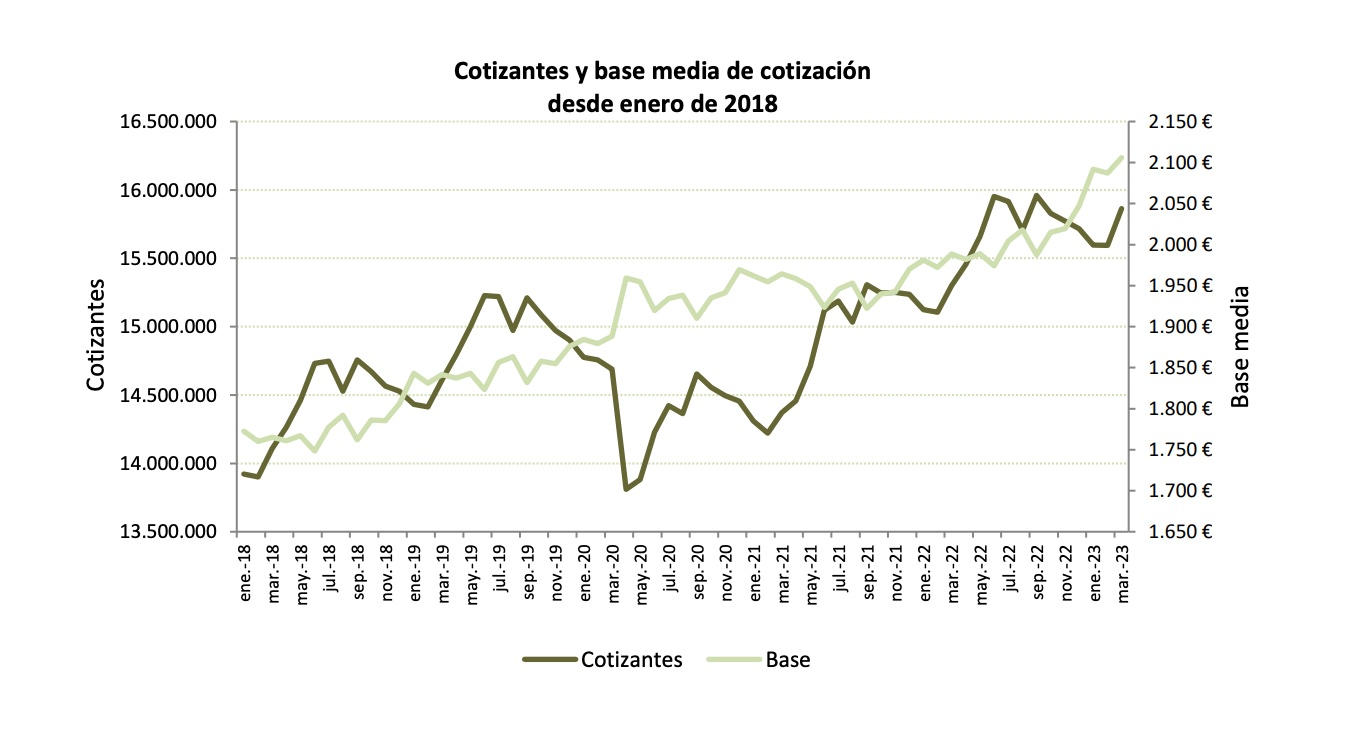



In [12]:
#Treiem les dades del numero d'afiliats de tots els regims a partir del 2012 fins avui (autonoms i treballadors per compte aliena) a la seguretat social (contribuents al sistema de pensions)
afiliats= pd.read_csv('AfiliadosxPeriodoxTramos_de_edadxRegimenes20230903_163534.csv',sep=';', encoding='ISO-8859-9')
pd.set_option('display.max_rows',None)
afiliats.rename(columns={'Todos los Regimenes Total Sexo': 'Afiliats'}, inplace=True)
afiliats.head(30)


Periodo      Tramos_de_edad  Afiliats
0    201201          Total Edad  16839803
1    201201  Entre 16 y 19 aos     85550
2    201201  Entre 20 y 24 aos    789150
3    201201  Entre 25 y 29 aos   1717802
4    201201  Entre 30 y 34 aos   2447229
5    201201  Entre 35 y 39 aos   2672709
6    201201  Entre 40 y 44 aos   2482043
7    201201  Entre 45 y 49 aos   2277902
8    201201  Entre 50 y 54 aos   1938237
9    201201  Entre 55 y 59 aos   1387418
10   201201  Entre 60 y 64 aos    899534
11   201201      Mas de 64 aos    142002
12   201202          Total Edad  16809794
13   201202  Entre 16 y 19 aos     81872
14   201202  Entre 20 y 24 aos    776501
15   201202  Entre 25 y 29 aos   1705436
16   201202  Entre 30 y 34 aos   2438458
17   201202  Entre 35 y 39 aos   2672504
18   201202  Entre 40 y 44 aos   2483016
19   201202  Entre 45 y 49 aos   2278340
20   201202  Entre 50 y 54 aos   1939094
21   201202  Entre 55 y 59 aos   1389863
22   201202  Entre 60 y 64 aos    902284
23   201202      Mas de 64 aos    142182
24   201203          Total Edad  16885759
25   201203  Entre 16 y 19 aos     81583
26   201203  Entre 20 y 24 aos    778188
27   201203  Entre 25 y 29 aos   1711358
28   201203  Entre 30 y 34 aos   2444950
29   201203  Entre 35 y 39 aos   2688693

 Pujo una base de dades que he trobat al Ministeri de treball desde el 1982 fins el 2012 tot i que no hi ha trams d'edat. Només tinc afiliats per trams d'edat a partir del 2012.
Font: https://www.mites.gob.es/es/estadisticas/mercado_trabajo/index.htm
 

In [13]:
afiliats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Periodo         1668 non-null   int64 
 1   Tramos_de_edad  1668 non-null   object
 2   Afiliats        1668 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.2+ KB


In [14]:
# Separa la columna 'Periodo' en dues noves columnes 'Any' i 'Mes'
afiliats['Periodo'] = afiliats['Periodo'].astype(str) # convertim primer la columna en un objecte
afiliats['Any'] = afiliats['Periodo'].str[:4]  # Obté els primers 4 caràcters com a Any
afiliats['Mes'] = afiliats['Periodo'].str[4:]  # Obté els caràcters restants com a Mes
afiliats['Any'] = afiliats['Any'].astype(int) #Convertim l'any a un integer
afiliats.drop(columns=['Periodo'], inplace=True)

afiliats.head(20)

Tramos_de_edad  Afiliats   Any Mes
0           Total Edad  16839803  2012  01
1   Entre 16 y 19 aos     85550  2012  01
2   Entre 20 y 24 aos    789150  2012  01
3   Entre 25 y 29 aos   1717802  2012  01
4   Entre 30 y 34 aos   2447229  2012  01
5   Entre 35 y 39 aos   2672709  2012  01
6   Entre 40 y 44 aos   2482043  2012  01
7   Entre 45 y 49 aos   2277902  2012  01
8   Entre 50 y 54 aos   1938237  2012  01
9   Entre 55 y 59 aos   1387418  2012  01
10  Entre 60 y 64 aos    899534  2012  01
11      Mas de 64 aos    142002  2012  01
12          Total Edad  16809794  2012  02
13  Entre 16 y 19 aos     81872  2012  02
14  Entre 20 y 24 aos    776501  2012  02
15  Entre 25 y 29 aos   1705436  2012  02
16  Entre 30 y 34 aos   2438458  2012  02
17  Entre 35 y 39 aos   2672504  2012  02
18  Entre 40 y 44 aos   2483016  2012  02
19  Entre 45 y 49 aos   2278340  2012  02

In [15]:
afiliats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tramos_de_edad  1668 non-null   object
 1   Afiliats        1668 non-null   int64 
 2   Any             1668 non-null   int64 
 3   Mes             1668 non-null   object
dtypes: int64(2), object(2)
memory usage: 52.2+ KB


In [16]:

# Faig una columna amb la mitjana d'afiiats per any
total_edad_data = afiliats[afiliats['Tramos_de_edad'] == 'Total Edad']

pd.options.display.float_format = '{:.0f}'.format
   
total_edad_data.head(20)

Tramos_de_edad  Afiliats   Any Mes
0       Total Edad  16839803  2012  01
12      Total Edad  16809794  2012  02
24      Total Edad  16885759  2012  03
36      Total Edad  16863390  2012  04
48      Total Edad  16893799  2012  05
60      Total Edad  16966420  2012  06
72      Total Edad  16875350  2012  07
84      Total Edad  16682422  2012  08
96      Total Edad  16793649  2012  09
108     Total Edad  16557981  2012  10
120     Total Edad  16381817  2012  11
132     Total Edad  16332488  2012  12
144     Total Edad  16083780  2013  01
156     Total Edad  16094638  2013  02
168     Total Edad  16169814  2013  03
180     Total Edad  16198707  2013  04
192     Total Edad  16281979  2013  05
204     Total Edad  16346688  2013  06
216     Total Edad  16284726  2013  07
228     Total Edad  16271446  2013  08

In [17]:
#Combino ara els afiliats del 1982 al 2023 
resultafiliats = pd.concat([df_filtrat, total_edad_data[['Any', 'Mes','Afiliats']]], ignore_index=True)
#Faig una mitja anual
mitjana_afiliats_per_any = resultafiliats.groupby('Any')['Afiliats'].mean().reset_index()

# Mirem el resultat
mitjana_afiliats_per_any.head(20)



Any  Afiliats
0   1982  10657222
1   1983  10532817
2   1984  10555975
3   1985  10546896
4   1986  10807216
5   1987  11130596
6   1988  11609451
7   1989  12128050
8   1990  12513901
9   1991  12648310
10  1992  12535511
11  1993  12099430
12  1994  12045450
13  1995  12307616
14  1996  12506001
15  1997  12932120
16  1998  13591037
17  1999  14344917
18  2000  15062893
19  2001  15649940

Fem un grafic per veure si la evolució dels afiliats per any mostren una tendencia lineal de creixement per aplicar una predicció. 

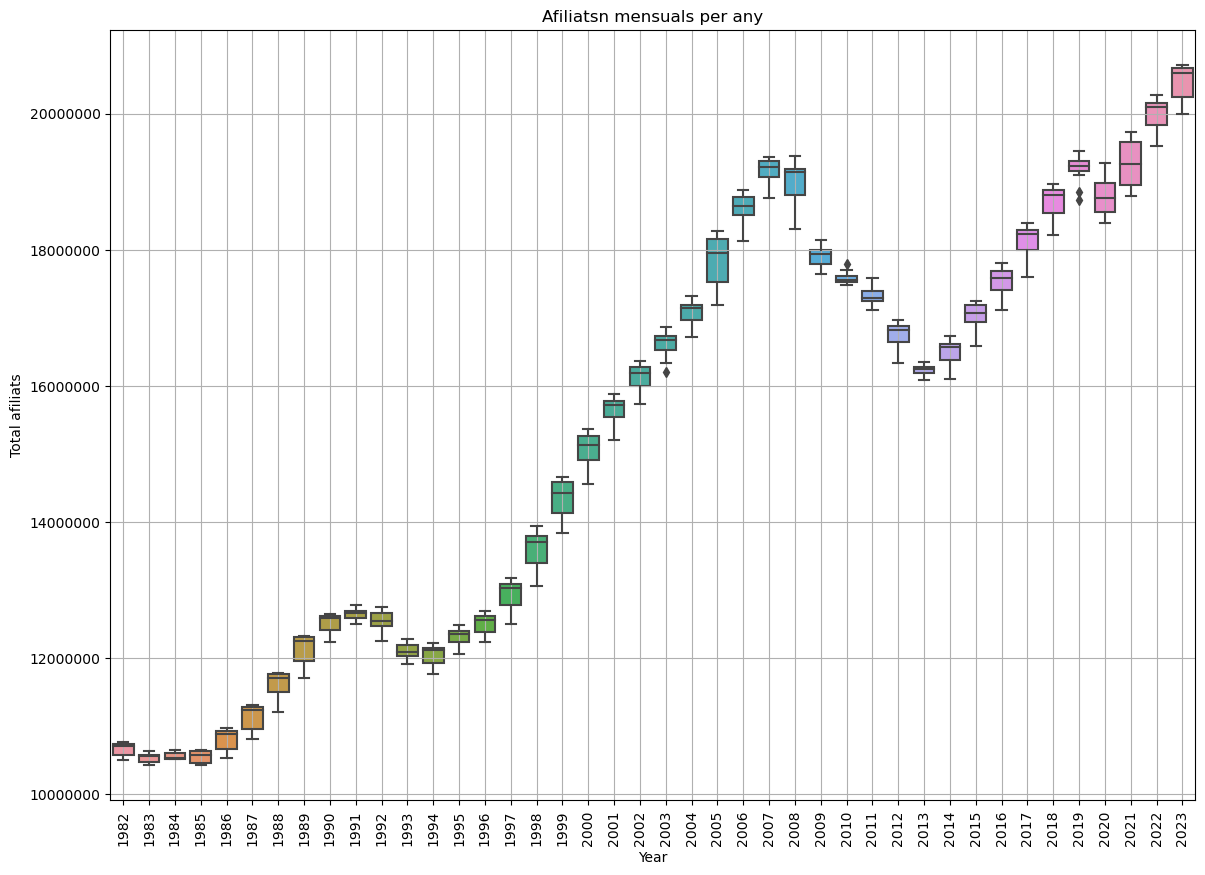

In [18]:
    # Filter the DataFrame to include only 'Total Edad' records
    total_edad_data = afiliats[afiliats['Tramos_de_edad'] == 'Total Edad']
    # combino les dades d'afiliats del 1982 als 2023
    combined_data = pd.concat([df_filtrat, total_edad_data], ignore_index=True)

    # Create a box plot per year
    plt.figure(figsize=(14, 10))
    sns.boxplot(data=combined_data, x='Any', y='Afiliats')
    
    # Personalitza l'eix x perquè vagi del 1982 al 2023
    plt.xticks(rotation=90)  # Rotació de les etiquetes per millorar la llegibilitat

    plt.title('Afiliatsn mensuals per any')
    plt.xlabel('Year')
    plt.ylabel('Total afiliats')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True)

    plt.show()

Amb el boxplot podem veure clarament els anys de mes creació de treball i les de destrucció de llocs de treball. Veiem que nomes hi ha un any, el 2019 amb mesos outliers, es a dir, on alguns mesos han tingut un nombre d'afiliats inusual.  Veiem que la tendencia es creixent,excepte duran les crisi,la del post olimpiades 1992, la inmobiiaria de l'any 2007 al 2013 i el 2020 per la crisi del covid i la consequent destrucció de llocs de feina.


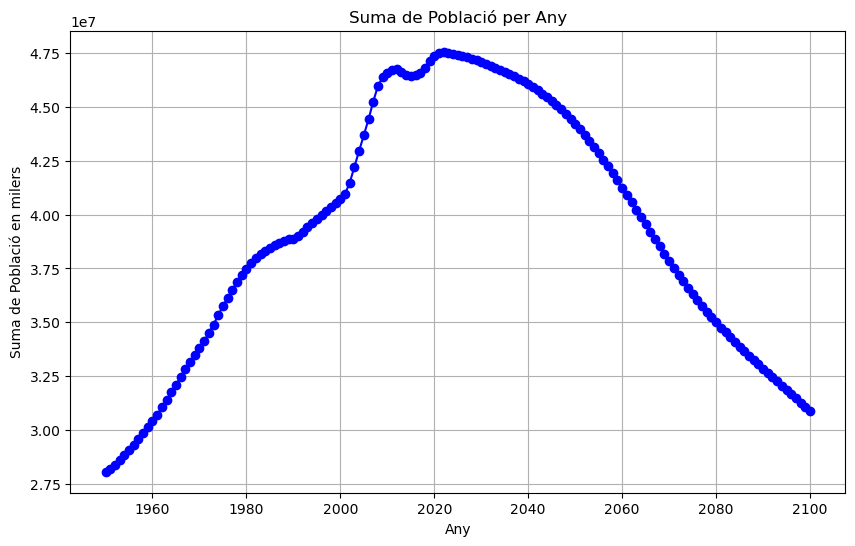

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(combined_population['Any'], combined_population['Sum_0_to_100+'], marker='o', linestyle='-', color='b')
plt.title('Suma de Població per Any')
plt.xlabel('Any')
plt.ylabel('Suma de Població en milers')
plt.grid(True)
plt.show()

Veiem que segons les prediccions de la ONU la població començarà a disminuir en breu degut als efectes de la baixa natalitat.

In [20]:
combined_population['0 a 15 anys'] = combined_population.iloc[:, 11:27].sum(axis=1)
combined_population['16 a 19 anys'] = combined_population.iloc[:, 27:31].sum(axis=1)
combined_population['20 a 24 anys'] = combined_population.iloc[:, 31:36].sum(axis=1)
combined_population['25 a 29 anys'] = combined_population.iloc[:, 36:41].sum(axis=1)
combined_population['30 a 34 anys'] = combined_population.iloc[:, 41:46].sum(axis=1)
combined_population['35 a 39 anys'] = combined_population.iloc[:, 46:51].sum(axis=1)
combined_population['40 a 44 anys'] = combined_population.iloc[:, 51:56].sum(axis=1)
combined_population['45 a 49 anys'] = combined_population.iloc[:, 56:61].sum(axis=1)
combined_population['50 a 54 anys'] = combined_population.iloc[:, 61:66].sum(axis=1)
combined_population['55 a 59 anys'] = combined_population.iloc[:, 66:71].sum(axis=1)
combined_population['60 a 64 anys'] = combined_population.iloc[:, 71:76].sum(axis=1)
combined_population['65 a 67 anys'] = combined_population.iloc[:, 76:79].sum(axis=1)
combined_population['68 a mes de 100'] = combined_population.iloc[:, 79:112].sum(axis=1)
combined_population.head(20)


Index    Variant Region, subregion, country or area *  Notes  \
0   13397  Estimates                                Spain     24   
1   13398  Estimates                                Spain     24   
2   13399  Estimates                                Spain     24   
3   13400  Estimates                                Spain     24   
4   13401  Estimates                                Spain     24   
5   13402  Estimates                                Spain     24   
6   13403  Estimates                                Spain     24   
7   13404  Estimates                                Spain     24   
8   13405  Estimates                                Spain     24   
9   13406  Estimates                                Spain     24   
10  13407  Estimates                                Spain     24   
11  13408  Estimates                                Spain     24   
12  13409  Estimates                                Spain     24   
13  13410  Estimates                                Spain     24   
14  13411  Estimates                                Spain     24   
15  13412  Estimates                                Spain     24   
16  13413  Estimates                                Spain     24   
17  13414  Estimates                                Spain     24   
18  13415  Estimates                                Spain     24   
19  13416  Estimates                                Spain     24   

    Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**          Type  \
0             724             ESP              ES          724  Country/Area   
1             724             ESP              ES          724  Country/Area   
2             724             ESP              ES          724  Country/Area   
3             724             ESP              ES          724  Country/Area   
4             724             ESP              ES          724  Country/Area   
5             724             ESP              ES          724  Country/Area   
6             724             ESP              ES          724  Country/Area   
7             724             ESP              ES          724  Country/Area   
8             724             ESP              ES          724  Country/Area   
9             724             ESP              ES          724  Country/Area   
10            724             ESP              ES          724  Country/Area   
11            724             ESP              ES          724  Country/Area   
12            724             ESP              ES          724  Country/Area   
13            724             ESP              ES          724  Country/Area   
14            724             ESP              ES          724  Country/Area   
15            724             ESP              ES          724  Country/Area   
16            724             ESP              ES          724  Country/Area   
17            724             ESP              ES          724  Country/Area   
18            724             ESP              ES          724  Country/Area   
19            724             ESP              ES          724  Country/Area   

    Parent code   Any   0   1   2   3   4   5   6   7   8   9  10  11  12  13  \
0           925  1950 503 547 559 527 527 533 511 480 444 471 445 390 450 508   
1           925  1951 496 478 542 558 524 526 532 509 481 443 478 443 391 451   
2           925  1952 553 487 480 542 556 522 525 531 509 482 442 477 442 392   
3           925  1953 565 541 488 485 543 556 522 525 531 509 482 441 476 442   
4           925  1954 559 554 537 491 491 545 556 521 525 531 510 483 440 475   
5           925  1955 564 548 552 536 495 497 546 556 521 525 531 510 483 439   
6           925  1956 578 554 546 550 534 498 503 548 556 521 525 531 511 484   
7           925  1957 601 568 551 544 550 534 502 509 550 556 520 526 531 511   
8           925  1958 623 589 565 550 543 549 533 506 516 552 556 520 526 531   
9           925  1959 629 609 584 562 549 543 549 532 510 522 555 556 520 526   
10 

In [21]:
columns_selected= ['Any']+list(combined_population.columns[113:127])
combined_population_selected = combined_population[columns_selected]
combined_population_selected.head(29)

Any  0 a 15 anys  16 a 19 anys  20 a 24 anys  25 a 29 anys  30 a 34 anys  \
0   1950         7971          2196          2655          2388          1911   
1   1951         7897          2179          2663          2421          1979   
2   1952         7896          2163          2654          2447          2056   
3   1953         7949          2085          2660          2471          2142   
4   1954         8053          1985          2647          2490          2232   
5   1955         8217          1855          2613          2505          2287   
6   1956         8350          1774          2583          2513          2308   
7   1957         8475          1759          2535          2511          2325   
8   1958         8655          1746          2434          2520          2335   
9   1959         8790          1829          2313          2519          2338   
10  1960         8876          1902          2253          2487          2349   
11  1961         8940          1953          2213          2461          2378   
12  1962         9030          2028          2153          2428          2405   
13  1963         9145          2047          2170          2346          2435   
14  1964         9251          2077          2260          2228          2454   
15  1965         9364          2096          2326          2156          2437   
16  1966         9492          2100          2360          2102          2416   
17  1967         9633          2105          2429          2030          2379   
18  1968         9760          2094          2487          2049          2279   
19  1969         9862          2098          2526          2146          2138   
20  1970         9964          2116          2536          2208          2055   
21  1971        10065          2141          2548          2252          2003   
22  1972        10164          2162          2575          2344          1947   
23  1973        10249          2190          2580          2420          1993   
24  1974        10327          2264          2579          2488          2123   
25  1975        10396          2340          2600          2519          2219   
26  1976        10448          2399          2635          2523          2278   
27  1977        10491          2442          2682          2534          2363   
28  1978        10508          2467          2743          2523          2431   

    35 a 39 anys  40 a 44 anys  45 a 49 anys  50 a 54 anys  55 a 59 anys  \
0           1916          1795          1673          1359          1160   
1           1863          1838          1666          1427          1178   
2           1844          1853          1678          1467          1209   
3           1836          1856          1691          1519          1230   
4           1821          1861          1703          1571          1242   
5           1843          1841          1727          1587          1287   
6           1912          1802          1757          1583          1342   
7           1988          1780          1770          1597          1373   
8           2066          1769          1775          1611          1419   
9           2142          1760          1776          1626          1466   
10          2188          1781          1763          1647          1484   
11          2208          1849          1739          1673          1491   
12          2233          1932          1725          1693          1517   
13          2258          2014          1719          1708          1541   
14          2279          2094          1718          1717          1564   
15          2315          2152          1745          1713          1590   
16          2353          2183          1813          1696          1615   
17          2378          2206          1895          1683          1631   
18          2405          2228          1978          1677          1644   
19          2414          2254          2056          

In [22]:
Calculs_de_població = pd.DataFrame({
    'Any': combined_population['Any'],
    'Sum_0_to_100+': combined_population['Sum_0_to_100+'],
    'Jubilats': ((combined_population['68 a mes de 100'] + combined_population['65 a 67 anys'])*1000),
    '% Jubilats': (((combined_population['68 a mes de 100'] + combined_population['65 a 67 anys']) * 1000) / combined_population['Sum_0_to_100+'])
*100})
Calculs_de_població.tail(20)

Any  Sum_0_to_100+  Jubilats  % Jubilats
59  2081       34761798  13492167          39
60  2082       34532211  13432042          39
61  2083       34308910  13357520          39
62  2084       34091152  13270238          39
63  2085       33877248  13170968          39
64  2086       33667226  13075866          39
65  2087       33460949  12992197          39
66  2088       33256943  12908608          39
67  2089       33055164  12825462          39
68  2090       32855478  12742472          39
69  2091       32656642  12659840          39
70  2092       32458233  12577790          39
71  2093       32260881  12496387          39
72  2094       32064222  12416464          39
73  2095       31867655  12337278          39
74  2096       31671213  12259184          39
75  2097       31474039  12182564          39
76  2098       31276177  12106654          39
77  2099       31078356  12030755          39
78  2100       30880752  11955838          39

In [23]:
Calculs_de_població.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 78
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Any            151 non-null    int64  
 1   Sum_0_to_100+  151 non-null    int64  
 2   Jubilats       151 non-null    float64
 3   % Jubilats     151 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.9 KB


In [24]:
# Assuming your DataFrame is named "transposed_combined_population"
df = combined_population_selected.melt(id_vars=['Any'], var_name='Tram edat', value_name='Result')

# Sort the DataFrame first by "Year" and then by "Tram edat"
df = df.sort_values(by=['Tram edat', 'Any'])
# Multiply the "Result" column by 1000
df['Result'] *= 1000
# Round the values in the "Result" column
df['Result'] = df['Result'].round()

# Print the modified DataFrame
df.tail(20)

Any        Tram edat   Result
1943  2081  68 a mes de 100 12109653
1944  2082  68 a mes de 100 12073694
1945  2083  68 a mes de 100 12045809
1946  2084  68 a mes de 100 12017578
1947  2085  68 a mes de 100 11980118
1948  2086  68 a mes de 100 11925874
1949  2087  68 a mes de 100 11856443
1950  2088  68 a mes de 100 11772780
1951  2089  68 a mes de 100 11691292
1952  2090  68 a mes de 100 11619344
1953  2091  68 a mes de 100 11545874
1954  2092  68 a mes de 100 11471170
1955  2093  68 a mes de 100 11395056
1956  2094  68 a mes de 100 11317840
1957  2095  68 a mes de 100 11239869
1958  2096  68 a mes de 100 11161357
1959  2097  68 a mes de 100 11083051
1960  2098  68 a mes de 100 11004626
1961  2099  68 a mes de 100 10926936
1962  2100  68 a mes de 100 10851080

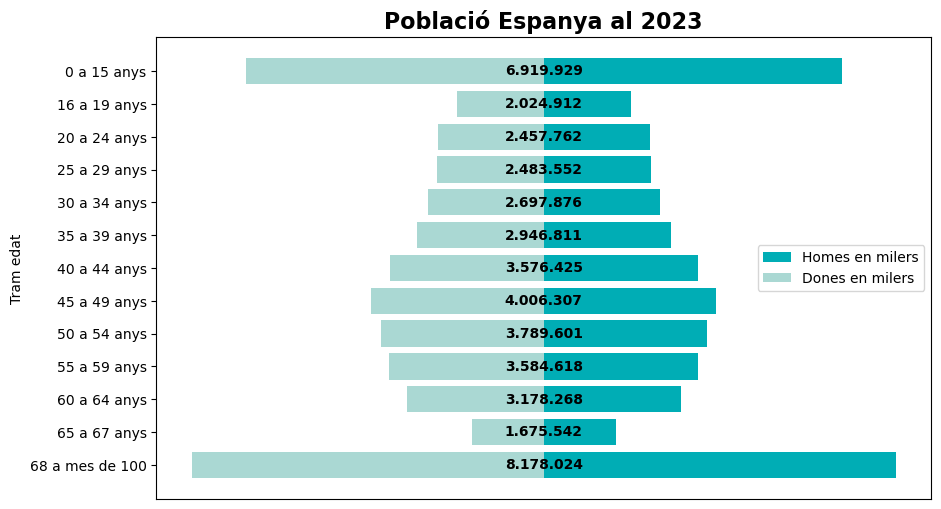

In [25]:
# Calculo el centre dels valors y per cada tram d'edat
data_2023 = df[df['Any'] == 2023]
centered_y_values = range(len(data_2023['Tram edat']))

# Calculate el centre dels valors de les x per cada meitat de la piramid de població
half_widths = data_2023['Result'] / 2

# Create the population pyramid with the results split 50/50 on each side
fig, ax = plt.subplots(figsize=(10, 6))
bars_left = ax.barh(y=centered_y_values, width=half_widths, align='center', label='Homes en milers', color='#00ADB5')
bars_right = ax.barh(y=centered_y_values, width=-half_widths, align='center', label='Dones en milers', color='#AAD8D3')

# Add the rounded 'Result' value in the middle between bars
for i, (bar_left, bar_right, result) in enumerate(zip(bars_left, bars_right, data_2023['Result'])):
    x_value = 0  # Center between the two bars
    result_value = round(result)
    result_formatted = '{:,}'.format(result_value).replace(',', '.')
    ax.text(x_value, i, result_formatted, ha='center', va='center', color='black', fontweight='bold')

ax.set_yticks(centered_y_values)
ax.set_yticklabels(data_2023['Tram edat'])
ax.invert_yaxis()  # Invert y-axis to have younger age groups at the bottom

# Centro la etiqueta al eix X("Població") entre les barres
ax.set_title('Població Espanya al 2023', size=16, weight='bold')
ax.set_xlim(-max(half_widths) * 1.1, max(half_widths) * 1.1)  # deixa espai a ambdós costats de la piràmid
ax.xaxis.set_label_coords(0.5, -0.07)  # fixa unes coordinades sobre el eix x

# Afegir llegenda
ax.legend(loc='center right')

plt.ylabel('Tram edat')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.show()




- Jubilats a dia d'avui entre 1923 i 1958, encara no s'han jubilat tots els baby boomers que van del 1943 al 1965 que augmentaràn en uns 3M mes la població jubilada 

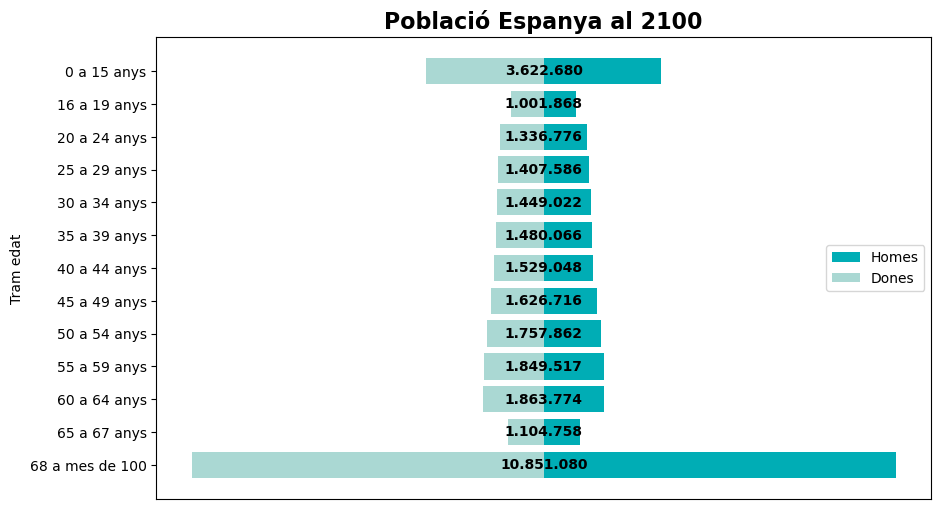

In [26]:
# Definim una funció per crear una piràmide de població per un any donat:  
def create_population_pyramid(year):
    d = df[df['Any'] == year]
    centered_y_values = range(len(d['Tram edat']))
    half_widths = d['Result'] / 2 #Fem dos meitats aprox (homes dones )

    fig, ax = plt.subplots(figsize=(10, 6))

    bars_left = ax.barh(y=centered_y_values, width=half_widths, align='center', label='Homes', color='#00ADB5')
    bars_right = ax.barh(y=centered_y_values, width=-half_widths, align='center', label='Dones', color='#AAD8D3')

    artists = []
    for i, (bar_left, bar_right, result) in enumerate(zip(bars_left, bars_right, d['Result'])):
        x_value = 0
        result_value = round(result)
        result_formatted = '{:,}'.format(result_value).replace(',', '.')
        text_artist = ax.text(x_value, i, result_formatted, ha='center', va='center', color='black', fontweight='bold')
        artists.append(text_artist)

    ax.set_yticks(centered_y_values)
    ax.set_yticklabels(d['Tram edat'])
    ax.invert_yaxis()
    
    any = d["Any"].values[0]
    ax.set_title(f'Població Espanya al {any}', size=16, weight='bold')
    ax.set_xlim(-max(half_widths) * 1.1, max(half_widths) * 1.1)
    ax.xaxis.set_label_coords(0.5, -0.07)
    
    ax.legend(loc='center right')

    plt.ylabel('Tram edat')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())

    return fig, artists

# Get unique years in your DataFrame
years = df['Any'].unique()
plt.rcParams['animation.ffmpeg_path'] = '/Users/angelssastrenadal/opt/anaconda3/pkgs/qt-main-5.15.2-h719ae48_7/share/qt/3rd_party_licenses/qtwebengine/src/3rdparty/chromium/third_party/ffmpeg/'
# Display the animation
# Create the animator
def animate(year):
    clear_output(wait=True)
    fig, artists = create_population_pyramid(year)
    display(fig)
    plt.close(fig)  # Close the figure to avoid accumulating them in the final output

anim = FuncAnimation(plt.figure(), animate, frames=years)
anim.save('piramide_poblacio.gif', dpi=300, writer='pillowWriter(fps=5)' ) # Guarda l'animació com a GIF
plt.close()  # Close the initial figure


In [27]:
despesa = pd.read_excel('gastoeingresos_presupuestado_en_pensiones.xlsx', header=1,skipfooter=2,usecols=lambda x: x not in ['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
despesa.rename(columns={'Despesa pensions': 'Despesa pensions en M€','Ingressos cotitzacions':'Ingressos cotitzacions en M€','Fons Reserva':'Fons Reserva en M€'}, inplace=True)

despesa.head(20)

Any  Despesa pensions en M€  Ingressos cotitzacions en M€  \
0   1995                   43990                         41951   
1   1996                   47578                         45155   
2   1997                   49878                         48012   
3   1998                   52451                         51146   
4   1999                   55200                         54904   
5   2000                   58243                         60539   
6   2001                   61435                         66071   
7   2002                   64958                         70577   
8   2003                   69392                         76159   
9   2004                   74156                         82024   
10  2005                   79221                         88217   
11  2006                   84682                         95885   
12  2007                   91458                        103470   
13  2008                   98011                        108776   
14  2009                  106098                        107158   
15  2010                  108282                        106599   
16  2011                  112215                        105812   
17  2012                  115825                        100743   
18  2013                  121556                         98712   
19  2014                  127483                         99540   

    Fons Reserva en M€  
0                -2039  
1                -4462  
2                -6328  
3                -7633  
4                -7929  
5                -5633  
6                 -997  
7                 4622  
8                11389  
9                19257  
10               28253  
11               39456  
12               51468  
13               62233  
14               63293  
15               61610  
16               55207  
17               40125  
18               17281  
19              -10662

Les dades per 2023 son les dades disponibles fins Agost 2023

S'ha intentat fer webscrapping però la web de la seguretat social enmagatzema aquestes dades en pdfs localitzats en diferents sub pàgines web segons l'any.Per el que s'ha hagut de fer un treball bastant manual per obtenir les dades...
https://www.seg-social.es/wps/portal/wss/internet/InformacionEconomicoFinanciera/InformacionPresupuestariaFinanciera/393/397/655/3296
	https://www.seg-social.es/wps/portal/wss/internet/EstadisticasPresupuestosEstudios/Estadisticas/EST66/EST67![image.png](attachment:image.png)
Aquesta web també ha: https://datosmacro.expansion.com/deuda/espana

In [28]:
DeutePIB=pd.read_excel('DeuteEvolucio.xlsx', decimal=',',usecols=lambda x: x not in ['Unnamed: 4', 'Unnamed: 5']) 
def convert_to_percentage(value):
    # Divideix el valor pel factor 100 per convertir-lo en percentatge
    return float(value.replace('%', '')) 

# Aplica la funció personalitzada a la columna 'Deute(%PIB)'
DeutePIB['Deute(%PIB)'] = DeutePIB['Deute(%PIB)'].apply(convert_to_percentage)
DeutePIB['PIB en M€'] = DeutePIB['Deute en (M€)'] / DeutePIB['Deute(%PIB)']*100
DeutePIB

Any  Deute en (M€)  Deute(%PIB)  Deute per capita  PIB en M€
0   2023        1558149          113             32419    1377552
1   2022        1502501          113             31261    1327298
2   2021        1427238          118             30049    1206456
3   2020        1345786          120             28393    1117762
4   2019        1223355           98             25846    1245779
5   2018        1208861          100             25755    1204045
6   2017        1183412          102             25363    1162487
7   2016        1145050          103             24610    1114946
8   2015        1113661          103             23981    1078084
9   2014        1084846          105             23355    1032204
10  2013        1025655          100             22051    1020552
11  2012         927813           90             19856    1030903
12  2011         743043           70             15871    1063009
13  2010         649153           60             13910    1072980
14  2009         569535           53             12252    1068546
15  2008         440621           40              9529    1109877
16  2007         384662           36              8423    1074475
17  2006         392132           39              8756    1002895
18  2005         393479           42              8941     928017
19  2004         389888           45              9005     858784
20  2003         382775           48              8996     802463
21  2002         384145           51              9184     750283
22  2001         378883           54              9233     701635
23  2000         374557           58              9211     648022
24  1999         362223           61              8950     595762
25  1998         346417           62              8595     556047
26  1997         333627           64              8311     519668
27  1996         319976           65              8005     489260
28  1995         283457           62              7121     460906
29  1994         249508           59              6294     425201
30  1993         225627           56              5718     401757
31  1992         174047           45              4433     383195
32  1991         152672           43              3910     354310
33  1990         136775           43              3518     321748
34  1989         117061           41              3013     285306
35  1988         100796           40              2598     254343
36  1987          98919           43              2554     229298
37  1986          88955           43              2302     205439
38  1985          75769           42              1966     180145
39  1984          59926           37              1560     161613
40  1983          43817           30              1145     144230
41  1982          31769           25               834     126368
42  1981          22017           20               581     109975
43  1980          15997           17               425      96484

In [29]:
resultat = pd.merge(Calculs_de_població, mitjana_afiliats_per_any, on='Any', how='inner')
resultat['% Afiliats'] = ((resultat['Afiliats'] / resultat['Sum_0_to_100+']) * 100)
resultat['CotitzantxJubilat'] = (resultat['Afiliats'] / resultat['Jubilats']).round(2)
pd.options.display.float_format = '{:.2f}'.format
resultat.tail()


Any  Sum_0_to_100+   Jubilats  % Jubilats    Afiliats  % Afiliats  \
37  2019       47131371 9183368.50       19.48 19189213.42       40.71   
38  2020       47363806 9317649.00       19.67 18767143.67       39.62   
39  2021       47486934 9451268.50       19.90 19274275.00       40.59   
40  2022       47558629 9637775.00       20.27 20005273.92       42.06   
41  2023       47519627 9853566.00       20.74 20454039.71       43.04   

    CotitzantxJubilat  
37               2.09  
38               2.01  
39               2.04  
40               2.08  
41               2.08

In [30]:
resultatambdeute = pd.merge(resultat, DeutePIB, on='Any', how='inner')
resultatambdeute.head(20)

Any  Sum_0_to_100+   Jubilats  % Jubilats    Afiliats  % Afiliats  \
0   1982       37982148 4355796.00       11.47 10657222.42       28.06   
1   1983       38169759 4436721.00       11.62 10532817.42       27.59   
2   1984       38329925 4519319.00       11.79 10555975.17       27.54   
3   1985       38471920 4618164.00       12.00 10546895.50       27.41   
4   1986       38590807 4737965.00       12.28 10807216.42       28.00   
5   1987       38694532 4877293.50       12.60 11130595.50       28.77   
6   1988       38781721 5023502.00       12.95 11609450.58       29.94   
7   1989       38847317 5169124.50       13.31 12128050.17       31.22   
8   1990       38889889 5312979.00       13.66 12513901.08       32.18   
9   1991       38997063 5455723.50       13.99 12648310.08       32.43   
10  1992       39202250 5600669.50       14.29 12535510.75       31.98   
11  1993       39420545 5748724.00       14.58 12099430.08       30.69   
12  1994       39623724 5901131.00       14.89 12045450.33       30.40   
13  1995       39814572 6060736.00       15.22 12307616.25       30.91   
14  1996       39996472 6219734.50       15.55 12506000.75       31.27   
15  1997       40180049 6377704.50       15.87 12932119.75       32.19   
16  1998       40362356 6536607.00       16.19 13591036.75       33.67   
17  1999       40542232 6677750.00       16.47 14344917.17       35.38   
18  2000       40741651 6810754.50       16.72 15062893.25       36.97   
19  2001       40966449 6954583.00       16.98 15649940.25       38.20   

    CotitzantxJubilat  Deute en (M€)  Deute(%PIB)  Deute per capita  PIB en M€  
0                2.45          31769        25.14               834  126368.34  
1                2.37          43817        30.38              1145  144229.76  
2                2.34          59926        37.08              1560  161612.73  
3                2.28          75769        42.06              1966  180145.03  
4                2.28          88955        43.30              2302  205438.80  
5                2.28          98919        43.14              2554  229297.64  
6                2.31         100796        39.63              2598  254342.67  
7                2.35         117061        41.03              3013  285305.87  
8                2.36         136775        42.51              3518  321747.82  
9                2.32         152672        43.09              3910  354309.58  
10               2.24         174047        45.42              4433  383194.63  
11               2.10         225627        56.16              5718  401757.48  
12               2.04         249508        58.68              6294  425201.09  
13               2.03         283457        61.50              7121  460905.69  
14               2.01         319976        65.40              8005  489259.94  
15               2.03         333627        64.20              8311  519668.22  
16               2.08         346417        62.30              8595  556046.55  
17               2.15         362223        60.80              8950  595761.51  
18               2.21         374557        57.80              9211  648022.49  
19               2.25         378883        54.00              9233  701635.19

Desafortunadament no hi ha dades fiables de la despesa en pensions o ingressos de cotitzacio anteriors al 1995 que va ser el Pacte de Toledo..
veure https://www.seg-social.es/wps/wcm/connect/wss/dfaf31c3-b09a-4188-8154-faa5490ffafc/30_F06.pdf?MOD=AJPERES pagina 23

Per tant utilitzarem aquesta **BASE DE DADES** per fer la predicció:

In [31]:
resultatambdeute.isnull().values.any() 



False

## Estudi i anàlisi de la Base de dades

In [32]:
resultatambdeuteidespesa= pd.merge(resultatambdeute, despesa, on='Any', how='inner')
resultatambdeuteidespesa['%PensionsvsPIB'] = (resultatambdeuteidespesa['Despesa pensions en M€'] / resultatambdeuteidespesa['PIB en M€'])*100
resultatambdeuteidespesa['PIB per capita'] = (resultatambdeuteidespesa['PIB en M€']*1000000 / resultatambdeuteidespesa['Sum_0_to_100+'])
resultatambdeuteidespesa['Rati Ingressos vs Despesa'] = (resultatambdeuteidespesa['Ingressos cotitzacions en M€'] / resultatambdeuteidespesa['Despesa pensions en M€'])
resultatambdeuteidespesa['Pensio x Jubilat'] = (resultatambdeuteidespesa['Despesa pensions en M€']*1000000 / resultatambdeuteidespesa['Jubilats'])
resultatambdeuteidespesa['Ingres x Afiliat'] = (resultatambdeuteidespesa['Ingressos cotitzacions en M€']*1000000 / resultatambdeuteidespesa['Afiliats'])
resultatambdeuteidespesa

Any  Sum_0_to_100+   Jubilats  % Jubilats    Afiliats  % Afiliats  \
0   1995       39814572 6060736.00       15.22 12307616.25       30.91   
1   1996       39996472 6219734.50       15.55 12506000.75       31.27   
2   1997       40180049 6377704.50       15.87 12932119.75       32.19   
3   1998       40362356 6536607.00       16.19 13591036.75       33.67   
4   1999       40542232 6677750.00       16.47 14344917.17       35.38   
5   2000       40741651 6810754.50       16.72 15062893.25       36.97   
6   2001       40966449 6954583.00       16.98 15649940.25       38.20   
7   2002       41477654 7083236.00       17.08 16126297.42       38.88   
8   2003       42230270 7162845.00       16.96 16612847.17       39.34   
9   2004       42959666 7196516.00       16.75 17081783.67       39.76   
10  2005       43685374 7279703.00       16.66 17835422.75       40.83   
11  2006       44422830 7391638.50       16.64 18596343.50       41.86   
12  2007       45245782 7476175.50       16.52 19152330.67       42.33   
13  2008       45966538 7595034.00       16.52 19005565.83       41.35   
14  2009       46367771 7739486.00       16.69 17916783.92       38.64   
15  2010       46572772 7893049.00       16.95 17581859.58       37.75   
16  2011       46729232 8042520.50       17.21 17326279.50       37.08   
17  2012       46756081 8178541.00       17.49 16740222.67       35.80   
18  2013       46603458 8334911.00       17.88 16227662.08       34.82   
19  2014       46464551 8500125.00       18.29 16491671.83       35.49   
20  2015       46431341 8630020.00       18.59 17017313.83       36.65   
21  2016       46473315 8748055.50       18.82 17518425.58       37.70   
22  2017       46584169 8882395.50       19.07 18126906.25       38.91   
23  2018       46792042 9027225.00       19.29 18701101.17       39.97   
24  2019       47131371 9183368.50       19.48 19189213.42       40.71   
25  2020       47363806 9317649.00       19.67 18767143.67       39.62   
26  2021       47486934 9451268.50       19.90 19274275.00       40.59   
27  2022       47558629 9637775.00       20.27 20005273.92       42.06   
28  2023       47519627 9853566.00       20.74 20454039.71       43.04   

    CotitzantxJubilat  Deute en (M€)  Deute(%PIB)  Deute per capita  \
0                2.03         283457        61.50              7121   
1                2.01         319976        65.40              8005   
2                2.03         333627        64.20              8311   
3                2.08         346417        62.30              8595   
4                2.15         362223        60.80              8950   
5                2.21         374557        57.80              9211   
6                2.25         378883        54.00              9233   
7                2.28         384145        51.20              9184   
8                2.32         382775        47.70              8996   
9                2.37         389888        45.40              9005   
10               2.45         393479        42.40              8941   
11               2.52         392132        39.10              8756   
12               2.56         384662        35.80              8423   
13               2.50         440621        39.70              9529   
14               2.31         569535        53.30             12252   
15               2.23         649153        60.50             13910   
16               2.15         743043        69.90             15871   
17               2.05         927813        90.00             19856   
18               1.95        1025655       100.50             22051   
19               1.94        1084846       105.10             23355   
20               1.97        1113661       103.30             23981   
21               2.00        1145050       102.70             24610   
22               2.04        1183412       101.80             25363   
23               2.07        1208861       100.40             25755   
24       

S'ha de tenir en compte que com a Jubilat s'ha tingut en compte tota la població de mes de 65 anys. 
La Despesa en pensions mitja al 2023 es de 16800€ anuals, aqui surt 19352€ ja que inclou les pensions contributives i no contributives que cobren població jubilada i també població amb baixos recursos, discapacitats, orfans, etc...

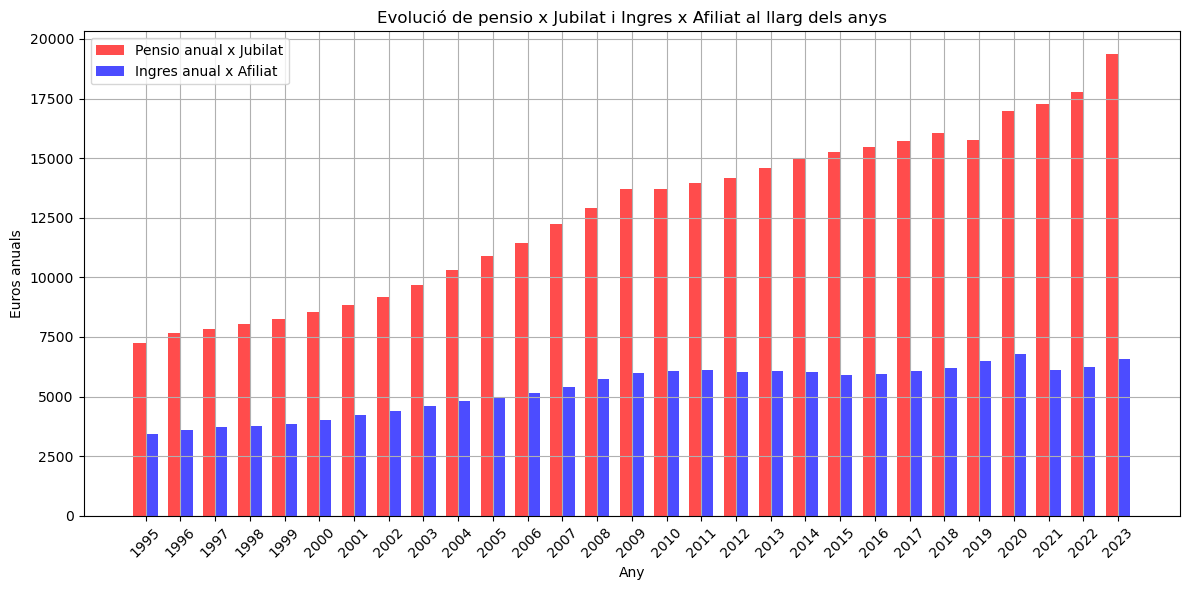

In [33]:
import matplotlib.pyplot as plt

# Dades de mostra
anys = resultatambdeuteidespesa['Any']
pensio_x_jubilat = resultatambdeuteidespesa['Pensio x Jubilat']
ingres_x_afiliat = resultatambdeuteidespesa['Ingres x Afiliat']

# Amplada de cada barra
ample_barra = 0.35

# Calculem les posicions per a les barres
posicions = np.arange(len(anys))

plt.figure(figsize=(12, 6))

# Crea les barres per "Pensio x Jubilat"
plt.bar(posicions - ample_barra/2, pensio_x_jubilat, width=ample_barra, color='r', alpha=0.7, label='Pensio anual x Jubilat')

# Crea les barres per "Ingres x Afiliat"
plt.bar(posicions + ample_barra/2, ingres_x_afiliat, width=ample_barra, color='b', alpha=0.7, label='Ingres anual x Afiliat')

# Etiquetes d'any a l'eix X
plt.xticks(posicions, anys, rotation=45)

plt.xlabel('Any')
plt.ylabel('Euros anuals')
plt.title('Evolució de pensio x Jubilat i Ingres x Afiliat al llarg dels anys')
plt.grid(True)
plt.legend()

# Evita el format científic a l'eix de la Y
plt.ticklabel_format(style='plain', axis='y')

# Mostra el gràfic
plt.tight_layout()
plt.show()


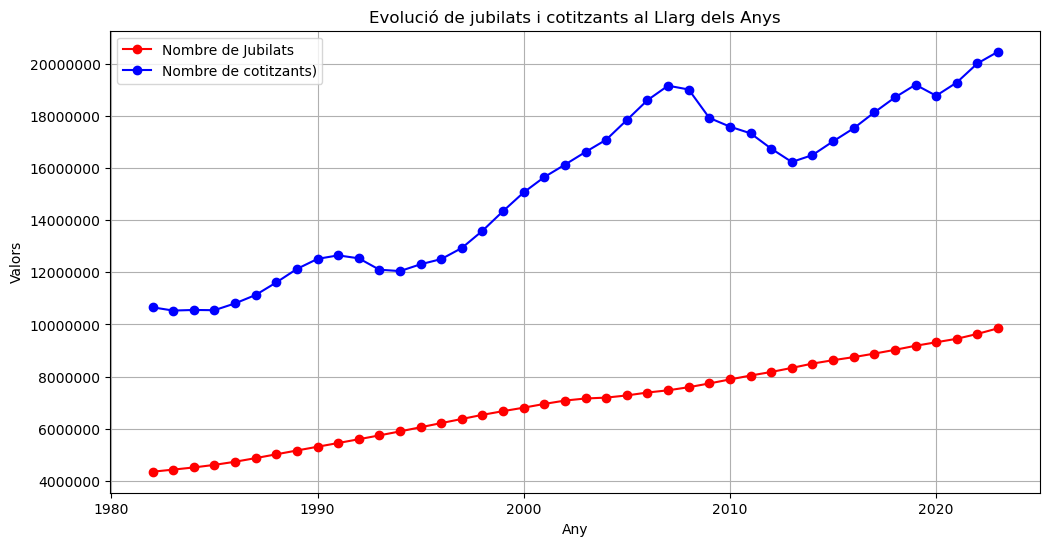

In [34]:

dades_seleccionades = resultatambdeute[['Any', 'Jubilats', 'Afiliats']]

# Creem el gràfic de línies amb diferents colors per a cada variable
plt.figure(figsize=(12, 6))

plt.plot(dades_seleccionades['Any'], dades_seleccionades['Jubilats'], marker='o', linestyle='-', color='r', label='Nombre de Jubilats')
plt.plot(dades_seleccionades['Any'], dades_seleccionades['Afiliats'], marker='o', linestyle='-', color='b', label='Nombre de cotitzants)')


plt.xlabel('Any')
plt.ylabel('Valors')
plt.title('Evolució de jubilats i cotitzants al Llarg dels Anys')
plt.grid(True)
plt.legend()

# Evita el format científic a l'eix de la Y
plt.ticklabel_format(style='plain', axis='y')

# Mostra el gràfic
plt.show()


In [35]:
# Suposem que tens un DataFrame anomenat "data" amb les columnes "Any", "Deute en (M€)", i "PIB en M€"
data=resultatambdeuteidespesa
# Crea un gràfic de dispersió interactiu amb etiquetes emergents (tooltips)
fig = px.scatter(data, x="Any", y="Rati Ingressos vs Despesa", size="Rati Ingressos vs Despesa", color="Despesa pensions en M€",
                 labels={"Ingressos cotitzacions en M€": "Ingressos cotitzacions en M€", "Despesa pensions en M€": "Despesa pensions en M€"}, 
                 hover_name="Any",
                 hover_data={"Any": False, "Ingressos cotitzacions en M€": ":.2f", "Despesa pensions en M€": ":.2f"})

# Personalitza l'aspecte del gràfic
fig.update_layout(title='Evolució rati cotitzacions / pensions',
                  xaxis_title='Any',
                  yaxis_title='Rati cotitzacions/pensions',
                  legend_title='Despesa pensions en M€')

# Mostra el gràfic
fig.show()

In [36]:
import plotly.graph_objs as go
import pandas as pd

# Suposem que tens un DataFrame anomenat "data" amb les columnes "Any", "Deute en (M€)", i "PIB en M€"
data=resultatambdeuteidespesa
# Creem un gràfic de línies per al PIB en M€
trace1 = go.Scatter(x=data["Any"], y=data["PIB en M€"],
                    mode="lines+markers",
                    name="PIB en (M€)",
                    line=dict(color="blue"),
                    marker=dict(size=10))

# Creem un gràfic de línies per al Deute en (M€)
trace2 = go.Scatter(x=data["Any"], y=data["Deute en (M€)"],
                    mode="lines+markers",
                    name="Deute en (M€)",
                    line=dict(color="red"),
                    marker=dict(size=10))
# Creem un layout per personalitzar l'aspecte del gràfic
layout = go.Layout(title='Evolució de PIB i Deute en (M€) al Llarg dels Anys',
                   xaxis=dict(title='Any', tickmode='array', tickvals=data["Any"]),
                   yaxis=dict(title='Valors'),
                   legend=dict(title=''))

# Creem la figura que inclou les dues línies de cercles
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostra el gràfic interactiu
fig.show()

Veiem que el Deute del Estat es manté estable fins al 2008 i a partir de llavors comença un creixement exponencial.


Si ens fixem en la trajectoria dels ingressos en cotitzacions es bastant similar a la del PIB del pais. 
Al igual que amb el deute a partir del 2008 hi ha un canvi de tendencia i el creixement dels ingressos es fa mes moderat.


In [37]:
import plotly.graph_objs as go

# Suposem que tens un DataFrame anomenat "data" amb les columnes "Any", "Despesa pensions", "Ingressos cotiitzacion
data=despesa
# Creem un gràfic de línies per la Despesa en pensions (M€)
trace1 = go.Scatter(x=data["Any"], y=data["Despesa pensions en M€"],
                    mode="lines+markers",
                    name="Despesa pensions (M€)",
                    line=dict(color="green"),
                    marker=dict(size=10))

# Creem un gràfic de línies per el Ingres en cotitzacions (M€)
trace2 = go.Scatter(x=data["Any"], y=data["Ingressos cotitzacions en M€"],
                    mode="lines+markers",
                    name="Ingressos cotitzacions (M€)",
                    line=dict(color="yellow"),
                    marker=dict(size=10))
# Creem un layout per personalitzar l'aspecte del gràfic
layout = go.Layout(title='Despesa Pensions e Ingres de cotitzacions en (M€) al Llarg dels Anys',
                   xaxis=dict(title='Any', tickmode='array', tickvals=data["Any"]),
                   yaxis=dict(title='Valors'),
                   legend=dict(title=''))

# Creem la figura que inclou les dues línies de cercles
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostra el gràfic interactiu
fig.show()


Veiem aqui també que la despesa en pensions també a partir del 2018 comença un creixement exponencialdal igual
que el deute espanyol per tant son variables correlacionades com la matriu de correlació indicará a continuació..

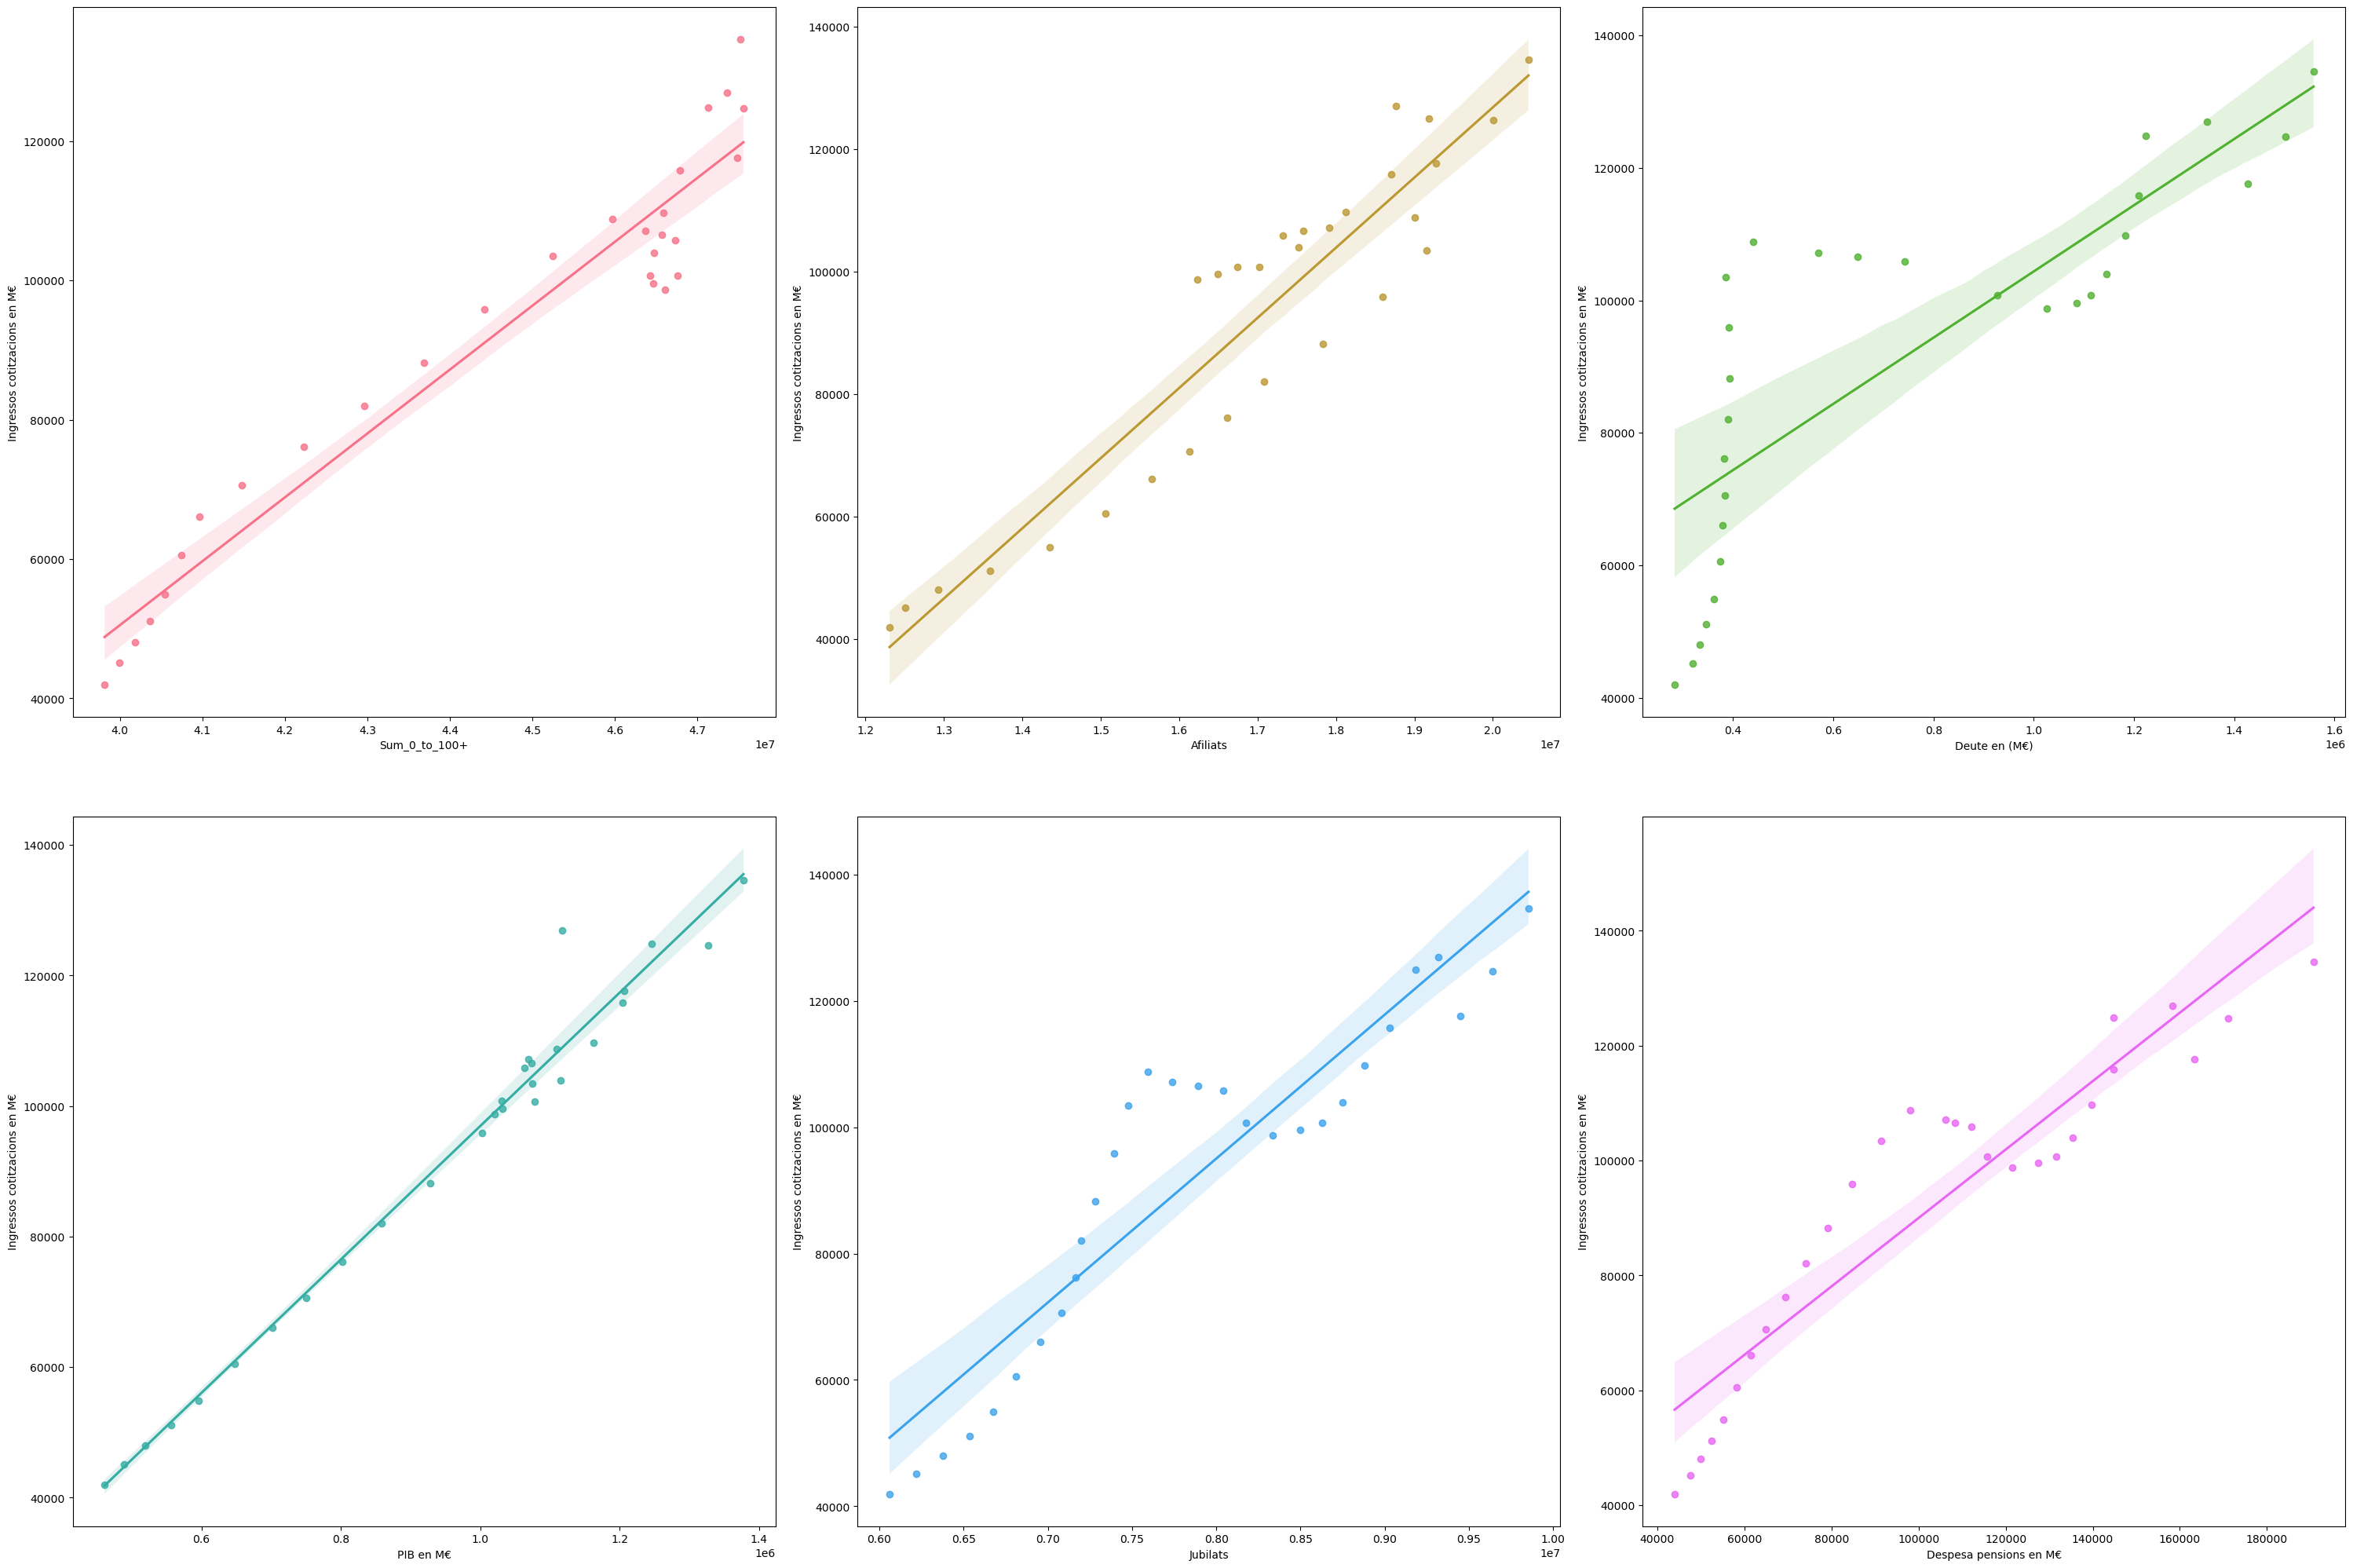

In [38]:
column_sels = ['Sum_0_to_100+','Afiliats','Deute en (M€)','PIB en M€','Jubilats', 'Despesa pensions en M€']
x = resultatambdeuteidespesa.loc[:, column_sels]
y = resultatambdeuteidespesa['Ingressos cotitzacions en M€']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))
axs = axs.flatten()

for i, k in enumerate(column_sels):
    color_index = i % len(sns.color_palette("husl"))  #canvio color per variable
    sns.regplot(y=y, x=x[k], color=sns.color_palette("husl")[color_index], ax=axs[i])
plt.tight_layout(pad=0.8, w_pad=1, h_pad=6.0)
plt.show()   

Veiem que les dades amb mes correlació respecte al nombre d'ingressos de cotitzacions es el creixement del PIB en Milions d'Euros, que te sentit, ja que si creix l'economia del pais, ha de suposar mes contratacions...

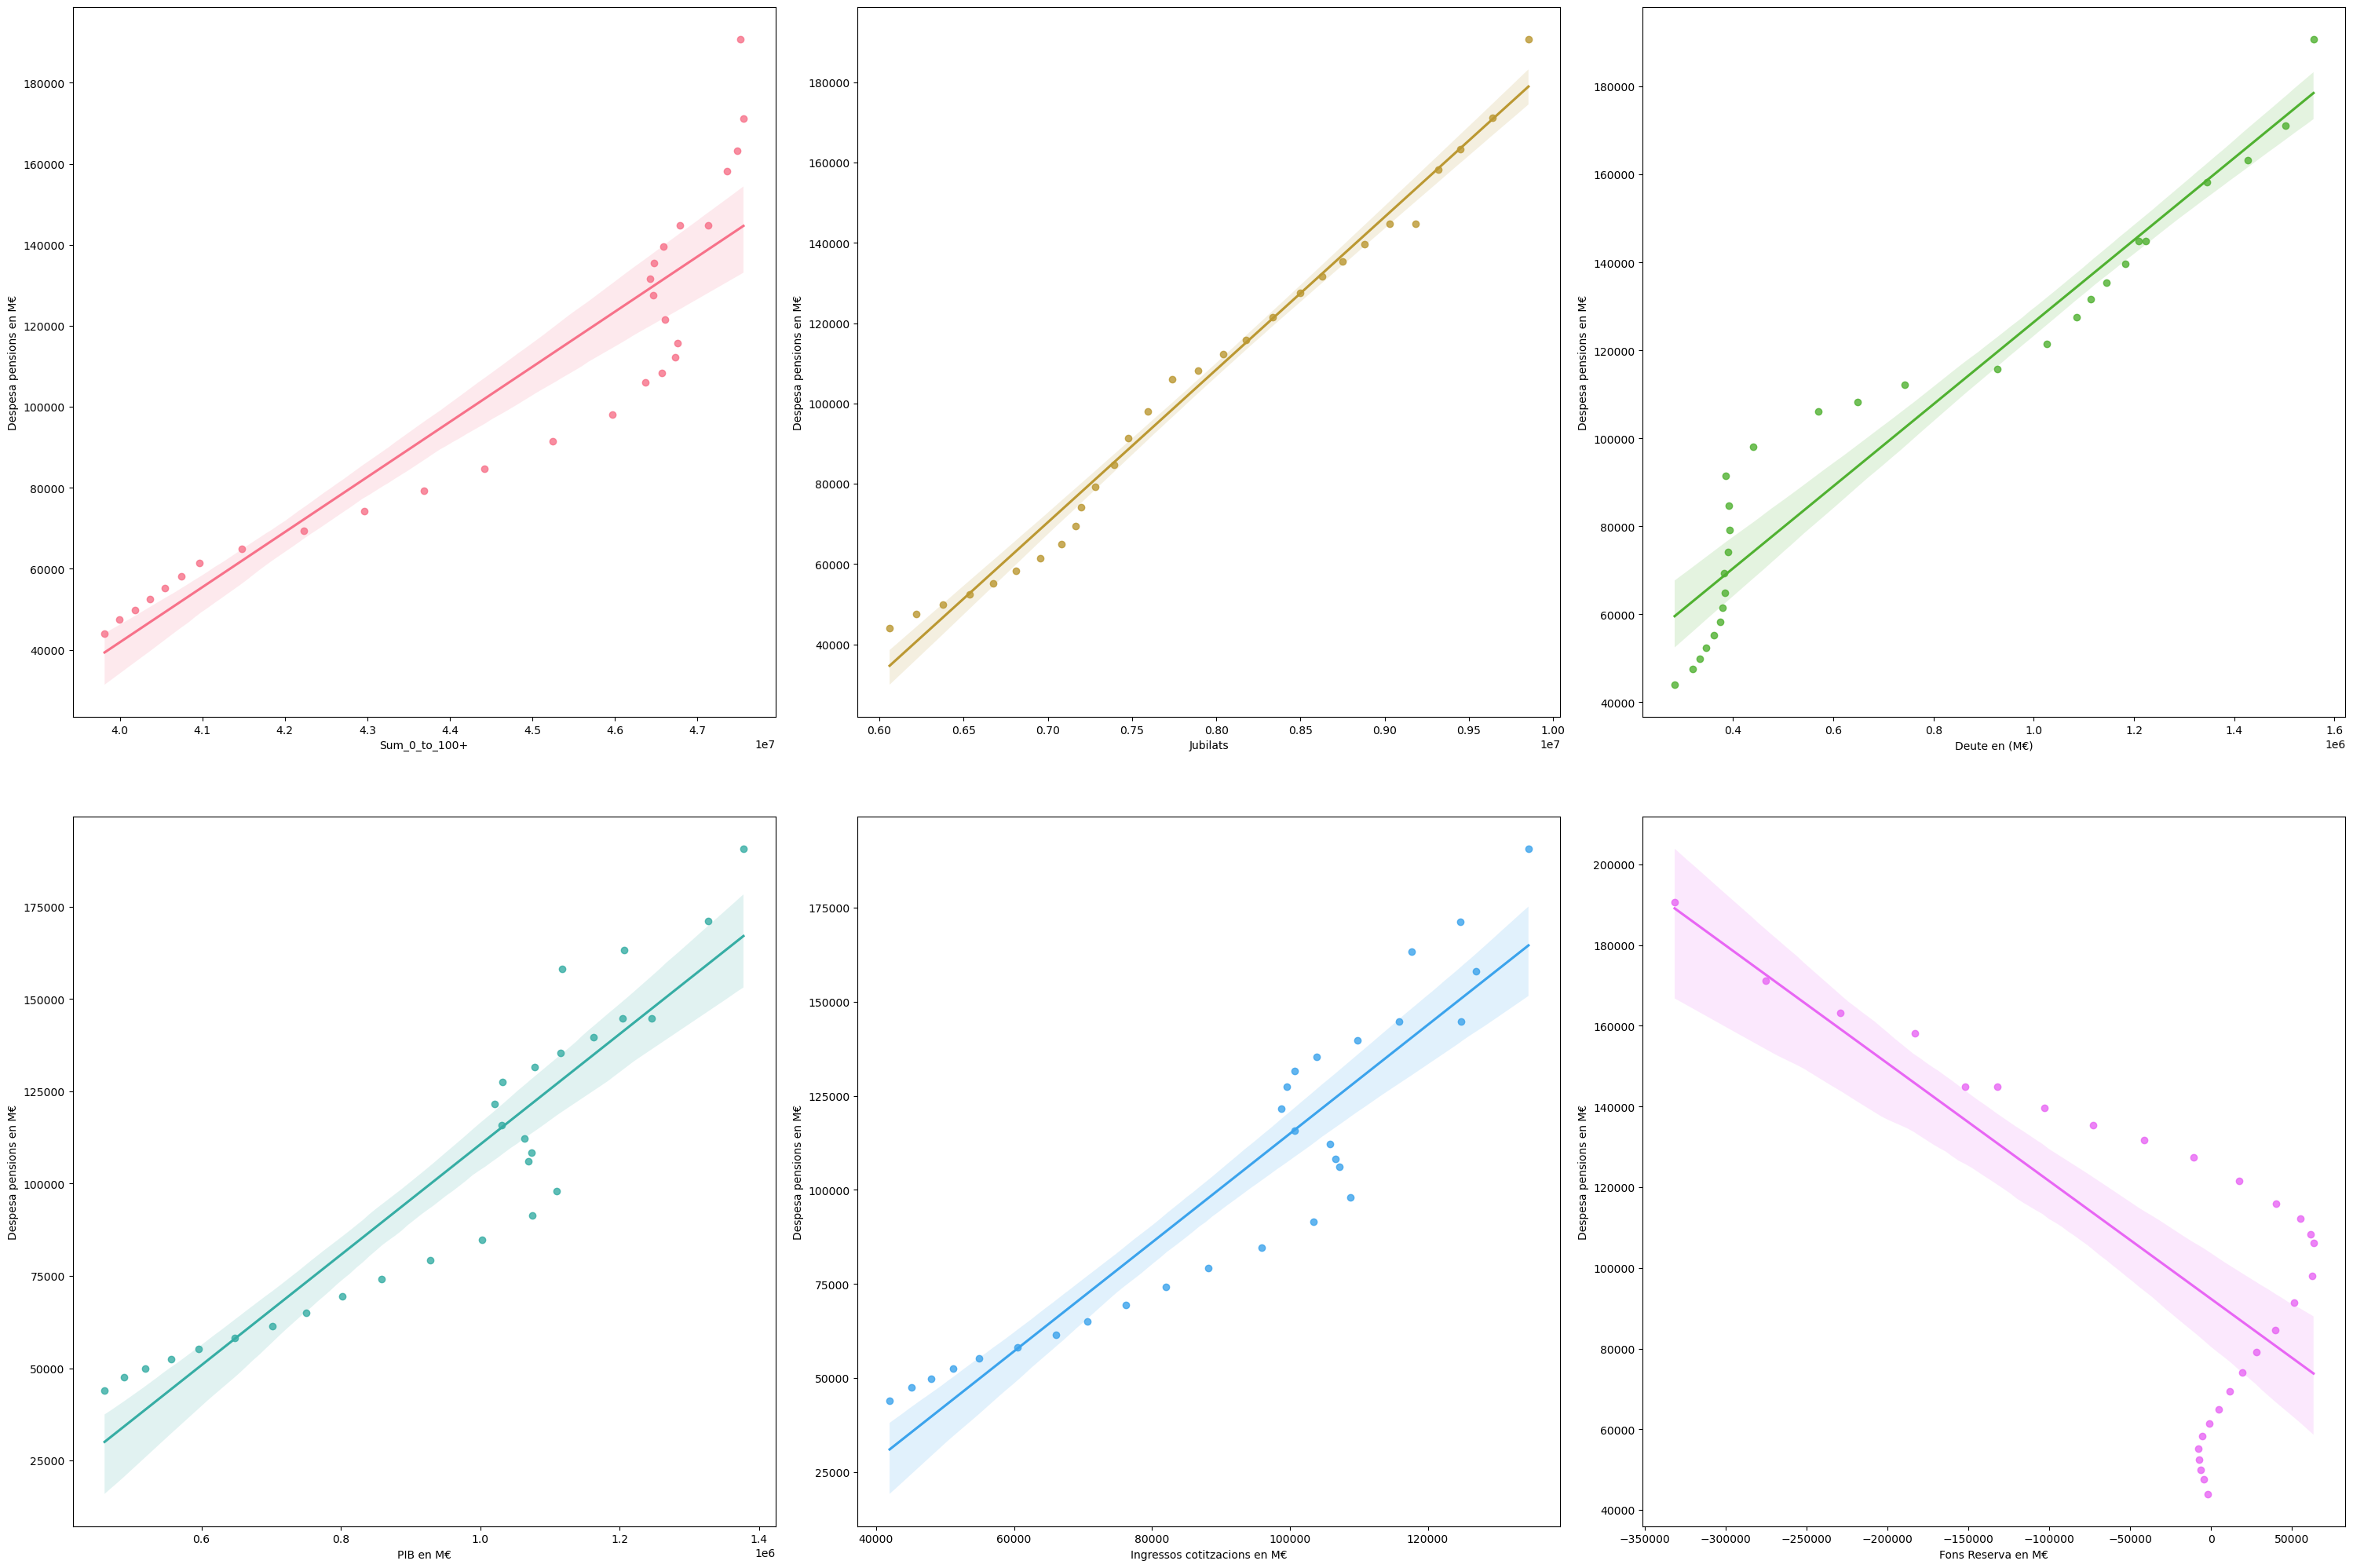

In [39]:
column_sels = ['Sum_0_to_100+', 'Jubilats', 'Deute en (M€)', 'PIB en M€','Ingressos cotitzacions en M€', 'Fons Reserva en M€']


x = resultatambdeuteidespesa.loc[:, column_sels]
y = resultatambdeuteidespesa['Despesa pensions en M€']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))
axs = axs.flatten()

for i, k in enumerate(column_sels):
    color_index = i % len(sns.color_palette("husl"))  #canvio color per variable
    sns.regplot(y=y, x=x[k], color=sns.color_palette("husl")[color_index], ax=axs[i])
plt.tight_layout(pad=0.8, w_pad=1, h_pad=6.0)
plt.show()    

Logicament la relació més directe entre Despesa en pensions es la del nombre de Jubilats i també es relaciona força amb el Deute en M€

In [40]:
resultatambdeuteidespesa.isnull().values.any() 

False

In [41]:
resultatambdeuteidespesa.duplicated().values.any() 

False

In [42]:
# Comprovem els tipus de variable per columna
column_data_types = resultatambdeuteidespesa.dtypes

# Iterem per columna i mirem el tipus de data
for column, dtype in column_data_types.items():
    print(f"Column '{column}' has dtype: {dtype}")

Column 'Any' has dtype: int64
Column 'Sum_0_to_100+' has dtype: int64
Column 'Jubilats' has dtype: float64
Column '% Jubilats' has dtype: float64
Column 'Afiliats' has dtype: float64
Column '% Afiliats' has dtype: float64
Column 'CotitzantxJubilat' has dtype: float64
Column 'Deute en (M€)' has dtype: int64
Column 'Deute(%PIB)' has dtype: float64
Column 'Deute per capita' has dtype: int64
Column 'PIB en M€' has dtype: float64
Column 'Despesa pensions en M€' has dtype: int64
Column 'Ingressos cotitzacions en M€' has dtype: int64
Column 'Fons Reserva en M€' has dtype: int64
Column '%PensionsvsPIB' has dtype: float64
Column 'PIB per capita' has dtype: float64
Column 'Rati Ingressos vs Despesa' has dtype: float64
Column 'Pensio x Jubilat' has dtype: float64
Column 'Ingres x Afiliat' has dtype: float64


Descripció de les variables:
- ANY — Any
- Sum_0_to_100+ — Total de la població  
- Jubilats — Total de Jubilats
- % Jubilats — % Jubilats respecte la població
- Afiliats — Total de Contribuents al sistema de pensions
- % afiliats — % Afiliats respecte la població
- CotitzantsxJubilat— Rati de Contribuents per Jubilat 
- Deute en (M€) — Deute del pais en Milions d'euros
- Deute per capita — Deute del pais per capita
- PIB en M€ — PIB del pais en Milionss d'euros
- Despesa pensions — Despesa en pensions en Milions d'euros
- Ingressos cotitzacions — Ingressos de contribuents en Milions d'euros
- Fons de Reserva — Ingressos menys Despesa per any en Milions d'euros.
- %PensionsvsPIB — % de les pensions respecte el PIB
- RatiIngressosvsDespesa - % de Ingressos per Despesa
- Pensio x Jubilat - Pensio anual en Euros per Jubilat

In [43]:
resultatambdeuteidespesa.describe().round(2).T

count        mean        std         min  \
Any                           29.00     2009.00       8.51     1995.00   
Sum_0_to_100+                 29.00 44531965.31 2842082.60 39814572.00   
Jubilats                      29.00  7870447.34 1095654.05  6060736.00   
% Jubilats                    29.00       17.60       1.49       15.22   
Afiliats                      29.00 16970458.18 2207890.39 12307616.25   
% Afiliats                    29.00       37.99       3.29       30.91   
CotitzantxJubilat             29.00        2.16       0.18        1.94   
Deute en (M€)                 29.00   754306.90  433274.90   283457.00   
Deute(%PIB)                   29.00       75.10      27.79       35.80   
Deute per capita              29.00    16456.28    8728.74     7121.00   
PIB en M€                     29.00   952437.85  260799.74   460905.69   
Despesa pensions en M€        29.00   103513.55   41992.42    43990.00   
Ingressos cotitzacions en M€  29.00    92082.90   26957.62    41951.00   
Fons Reserva en M€            29.00   -38353.41  105179.66  -331489.00   
%PensionsvsPIB                29.00       10.56       1.82        8.44   
PIB per capita                29.00    21112.61    4745.84    11576.31   
Rati Ingressos vs Despesa     29.00        0.93       0.14        0.71   
Pensio x Jubilat              29.00    12683.22    3549.23     7258.19   
Ingres x Afiliat              29.00     5314.79    1043.72     3408.54   

                                     25%         50%         75%         max  
Any                              2002.00     2009.00     2016.00     2023.00  
Sum_0_to_100+                41477654.00 46367771.00 46729232.00 47558629.00  
Jubilats                      7083236.00  7739486.00  8748055.50  9853566.00  
% Jubilats                         16.64       16.98       18.82       20.74  
Afiliats                     16126297.42 17326279.50 18701101.17 20454039.71  
% Afiliats                         35.80       38.64       40.59       43.04  
CotitzantxJubilat                   2.03        2.08        2.28        2.56  
Deute en (M€)                  382775.00   569535.00  1145050.00  1558149.00  
Deute(%PIB)                        53.30       64.20      101.80      120.40  
Deute per capita                 8950.00    12252.00    24610.00    32419.00  
PIB en M€                      750283.20  1032203.62  1114946.45  1377551.94  
Despesa pensions en M€          64958.00   106098.00   135448.00   190687.00  
Ingressos cotitzacions en M€    70577.00   100734.00   108776.00   134603.00  
Fons Reserva en M€             -73108.00    -4462.00    28253.00    63293.00  
%PensionsvsPIB                      8.83        9.93       12.03       14.15  
PIB per capita                  18088.85    22576.12    23991.11    28989.12  
Rati Ingressos vs Despesa           0.80        0.95        1.08        1.13  
Pensio x Jubilat                 9170.67    13708.66    15483.21    19352.08  
Ingres x Afiliat                 4376.52     5919.50     6082.95     6765.07

Veiem que els cotitzants per Jubilat te una desviació standard molt baixa, per tant ha esta molt similar durant el temps.
Al igual que el Rati Ingressos de contribuents respecte a pensions.

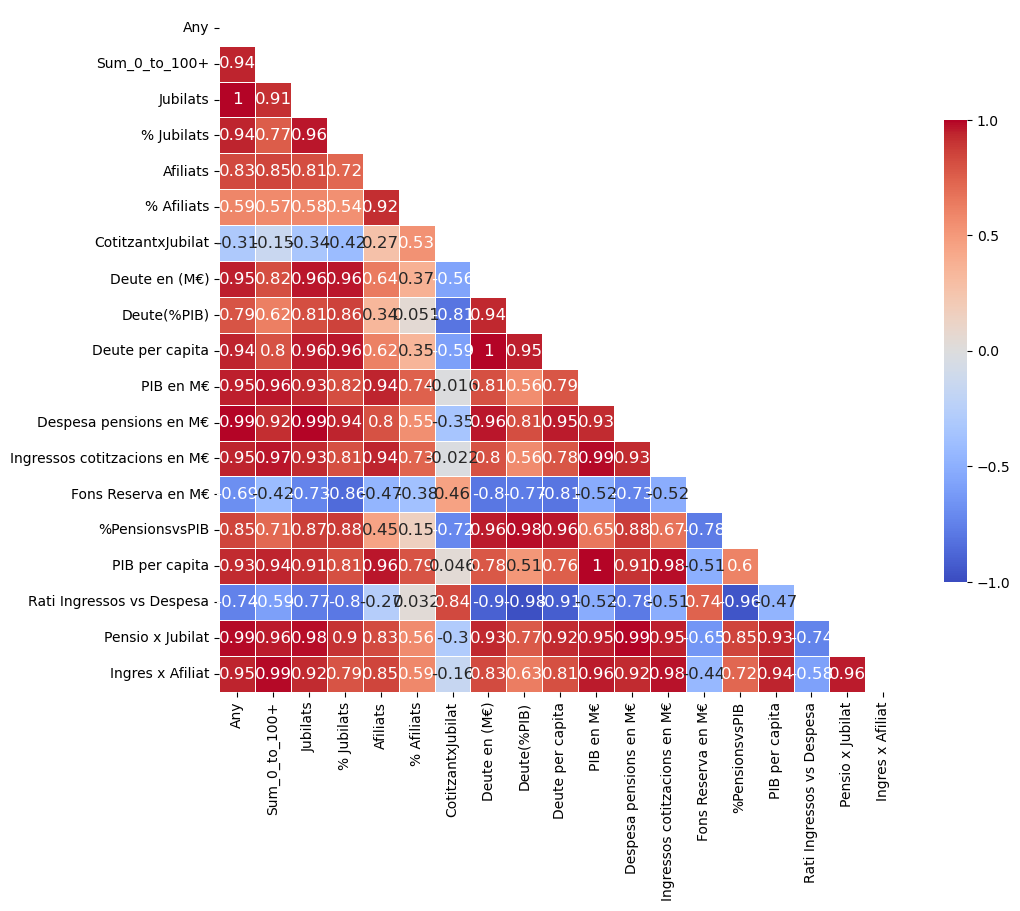

In [44]:
#Veiem la correlació entre variables 
f, ax = plt.subplots(figsize=(11, 15)) 
mask = np.triu(np.ones_like(resultatambdeuteidespesa.corr())) 
#Aquest mask np.triu treu el mirall (triangle idèntic) al heatmap
heatmap = sns.heatmap(resultatambdeuteidespesa.corr(method='pearson'), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(resultatambdeuteidespesa.corr().columns, rotation = 0)
ax.set_xticklabels(resultatambdeuteidespesa.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Veiem variables a remarcar: 
- Deute del estat en M€ que estan fortament correlacionades amb el nombre de Jubilats. I correlacions inverses com a menys deute mes rati ingrssos/despesa.
- El PIB está fortment relacionat amb el nombre de cotitzants i els ingressos d'aquests (a mes PIB, mes cotitzants ) i amb la població

In [45]:
# Calculem la matriu de correlacio per veure les variables mes correlacionades amb la Despesa en pension
correlation_matrix = resultatambdeuteidespesa.corr()

# Display the correlation with "Despesa pensions en M€"
despesa_correlation = correlation_matrix["Despesa pensions en M€"].sort_values(ascending=False)
print(despesa_correlation)

Despesa pensions en M€          1.00
Pensio x Jubilat                0.99
Jubilats                        0.99
Any                             0.99
Deute en (M€)                   0.96
Deute per capita                0.95
% Jubilats                      0.94
Ingressos cotitzacions en M€    0.93
PIB en M€                       0.93
Ingres x Afiliat                0.92
Sum_0_to_100+                   0.92
PIB per capita                  0.91
%PensionsvsPIB                  0.88
Deute(%PIB)                     0.81
Afiliats                        0.80
% Afiliats                      0.55
CotitzantxJubilat              -0.35
Fons Reserva en M€             -0.73
Rati Ingressos vs Despesa      -0.78
Name: Despesa pensions en M€, dtype: float64


## Preprocesament de la Base de dades

Preprocessarem les dades diverses vegades per que vull predir  (principalment la Despesa pensions) i els targets mai no es normalitzen. Tampoc es normalitzarà la columna d'Anys que utilitzaré per analitzar com les altres variables canviaren al llarg del temps...
Primer evaluaré de fer una regressió lineal simple per la despesa en pensions.


In [46]:
## Preprocessat = target Despesa en pensions
preprocessat = resultatambdeuteidespesa.copy()
preprocessat.head()

Any  Sum_0_to_100+   Jubilats  % Jubilats    Afiliats  % Afiliats  \
0  1995       39814572 6060736.00       15.22 12307616.25       30.91   
1  1996       39996472 6219734.50       15.55 12506000.75       31.27   
2  1997       40180049 6377704.50       15.87 12932119.75       32.19   
3  1998       40362356 6536607.00       16.19 13591036.75       33.67   
4  1999       40542232 6677750.00       16.47 14344917.17       35.38   

   CotitzantxJubilat  Deute en (M€)  Deute(%PIB)  Deute per capita  PIB en M€  \
0               2.03         283457        61.50              7121  460905.69   
1               2.01         319976        65.40              8005  489259.94   
2               2.03         333627        64.20              8311  519668.22   
3               2.08         346417        62.30              8595  556046.55   
4               2.15         362223        60.80              8950  595761.51   

   Despesa pensions en M€  Ingressos cotitzacions en M€  Fons Reserva en M€  \
0                   43990                         41951               -2039   
1                   47578                         45155               -4462   
2                   49878                         48012               -6328   
3                   52451                         51146               -7633   
4                   55200                         54904               -7929   

   %PensionsvsPIB  PIB per capita  Rati Ingressos vs Despesa  \
0            9.54        11576.31                       0.95   
1            9.72        12232.58                       0.95   
2            9.60        12933.49                       0.96   
3            9.43        13776.37                       0.98   
4            9.27        14694.84                       0.99   

   Pensio x Jubilat  Ingres x Afiliat  
0           7258.19           3408.54  
1           7649.52           3610.67  
2           7820.68           3712.62  
3           8024.19           3763.22  
4           8266.26           3827.42

In [47]:
Dades_historiques = preprocessat.copy()
Dades_historiques

Any  Sum_0_to_100+   Jubilats  % Jubilats    Afiliats  % Afiliats  \
0   1995       39814572 6060736.00       15.22 12307616.25       30.91   
1   1996       39996472 6219734.50       15.55 12506000.75       31.27   
2   1997       40180049 6377704.50       15.87 12932119.75       32.19   
3   1998       40362356 6536607.00       16.19 13591036.75       33.67   
4   1999       40542232 6677750.00       16.47 14344917.17       35.38   
5   2000       40741651 6810754.50       16.72 15062893.25       36.97   
6   2001       40966449 6954583.00       16.98 15649940.25       38.20   
7   2002       41477654 7083236.00       17.08 16126297.42       38.88   
8   2003       42230270 7162845.00       16.96 16612847.17       39.34   
9   2004       42959666 7196516.00       16.75 17081783.67       39.76   
10  2005       43685374 7279703.00       16.66 17835422.75       40.83   
11  2006       44422830 7391638.50       16.64 18596343.50       41.86   
12  2007       45245782 7476175.50       16.52 19152330.67       42.33   
13  2008       45966538 7595034.00       16.52 19005565.83       41.35   
14  2009       46367771 7739486.00       16.69 17916783.92       38.64   
15  2010       46572772 7893049.00       16.95 17581859.58       37.75   
16  2011       46729232 8042520.50       17.21 17326279.50       37.08   
17  2012       46756081 8178541.00       17.49 16740222.67       35.80   
18  2013       46603458 8334911.00       17.88 16227662.08       34.82   
19  2014       46464551 8500125.00       18.29 16491671.83       35.49   
20  2015       46431341 8630020.00       18.59 17017313.83       36.65   
21  2016       46473315 8748055.50       18.82 17518425.58       37.70   
22  2017       46584169 8882395.50       19.07 18126906.25       38.91   
23  2018       46792042 9027225.00       19.29 18701101.17       39.97   
24  2019       47131371 9183368.50       19.48 19189213.42       40.71   
25  2020       47363806 9317649.00       19.67 18767143.67       39.62   
26  2021       47486934 9451268.50       19.90 19274275.00       40.59   
27  2022       47558629 9637775.00       20.27 20005273.92       42.06   
28  2023       47519627 9853566.00       20.74 20454039.71       43.04   

    CotitzantxJubilat  Deute en (M€)  Deute(%PIB)  Deute per capita  \
0                2.03         283457        61.50              7121   
1                2.01         319976        65.40              8005   
2                2.03         333627        64.20              8311   
3                2.08         346417        62.30              8595   
4                2.15         362223        60.80              8950   
5                2.21         374557        57.80              9211   
6                2.25         378883        54.00              9233   
7                2.28         384145        51.20              9184   
8                2.32         382775        47.70              8996   
9                2.37         389888        45.40              9005   
10               2.45         393479        42.40              8941   
11               2.52         392132        39.10              8756   
12               2.56         384662        35.80              8423   
13               2.50         440621        39.70              9529   
14               2.31         569535        53.30             12252   
15               2.23         649153        60.50             13910   
16               2.15         743043        69.90             15871   
17               2.05         927813        90.00             19856   
18               1.95        1025655       100.50             22051   
19               1.94        1084846       105.10             23355   
20               1.97        1113661       103.30             23981   
21               2.00        1145050       102.70             24610   
22               2.04        1183412       101.80             25363   
23               2.07        1208861       100.40             25755   
24       

## ESCENARI A: OPTIMISTA

In [48]:
#Escenari conservador, els numeros segueixen igual que al 2023, excepte la població i el % de Jubilats que pugen i els afiliats a
#la seguretat social que pugen un 2% que es la  mitja desde el covid al 2020

#El % d'afiliats per població (43,04%) es manté igual que al 2023
#El Ingres x afiliat augmenta un 2%anual
#El deute per capita (32419€) no incrementa i es manté igual que al 2023
#El PIB per capita (28989.12€) no incrementa i es manté igual que al 2023
#La pension per Jubilat es manté igual que al 2023
EscenariA = Calculs_de_població[Calculs_de_població['Any'] > 2023].copy()

EscenariA['% Afiliats'] = 43.04
EscenariA['Afiliats'] = (EscenariA['Sum_0_to_100+'] * (EscenariA['% Afiliats']/100))
EscenariA['CotitzantxJubilat'] = (EscenariA['Afiliats'] / EscenariA['Jubilats']).round(2)
EscenariA['Deute per capita'] = 32419
EscenariA['Deute en (M€)'] = (32419 * EscenariA['Sum_0_to_100+']) / 1000000
EscenariA['PIB per capita'] = 28989.12
EscenariA['PIB en M€'] = (28989.12 * EscenariA['Sum_0_to_100+']) / 1000000
EscenariA['Deute(%PIB)'] = (EscenariA['Deute en (M€)'] / EscenariA['PIB en M€']) * 100
EscenariA['Pensio x Jubilat'] = 19352.08
EscenariA['Despesa pensions en M€'] = (EscenariA['Pensio x Jubilat'] * EscenariA['Jubilats']) / 1000000

# Suposant un valor inicial per a 'Ingres x Afiliat' per l'any 2024
valor_inicial_ingres_afiliat = 6580  # Canvia aquest valor pel que tinguis

EscenariA['Ingres x Afiliat'] = valor_inicial_ingres_afiliat

for i in range(1, len(EscenariA)):
    EscenariA.loc[EscenariA.index[i], 'Ingres x Afiliat'] = EscenariA.loc[EscenariA.index[i-1], 'Ingres x Afiliat'] * 1.02

EscenariA['Ingressos cotitzacions en M€'] = (EscenariA['Ingres x Afiliat'] * EscenariA['Afiliats']) / 1000000
# Afegeix una columna 'Fons Reserva' inicialitzada amb NaN
EscenariA['Fons Reserva en M€'] = float('NaN')

# Per al primer any (2024), calcula el 'Fons Reserva' amb el valor base de 2023
EscenariA.loc[EscenariA['Any'] == 2024, 'Fons Reserva en M€'] = (EscenariA.loc[EscenariA['Any'] == 2024, 'Ingressos cotitzacions en M€'].values[0]
                                                           - EscenariA.loc[EscenariA['Any'] == 2024, 'Despesa pensions en M€'].values[0]
                                                           + (-331489))  # valor del 2023

# Llista d'índexs reals del DataFrame EscenariA
indexs = EscenariA.index.tolist()

# Calcula el 'Fons Reserva' per a la resta d'anys (del 2025 en endavant)
for i in range(1, len(indexs)):
    idx_actual = indexs[i]
    idx_anterior = indexs[i-1]
    
    EscenariA.loc[idx_actual, 'Fons Reserva en M€'] = (EscenariA.loc[idx_actual, 'Ingressos cotitzacions en M€'] 
                                                - EscenariA.loc[idx_actual, 'Despesa pensions en M€']
                                                + EscenariA.loc[idx_anterior, 'Fons Reserva en M€'])
EscenariA['%PensionsvsPIB']=(EscenariA['Despesa pensions en M€'] / EscenariA['PIB en M€'])*100
EscenariA['Rati Ingressos vs Despesa'] = (EscenariA['Ingressos cotitzacions en M€'] / EscenariA['Despesa pensions en M€'])
EscenariA


Any  Sum_0_to_100+    Jubilats  % Jubilats  % Afiliats    Afiliats  \
2   2024       47473373 10078944.50       21.23       43.04 20432539.74   
3   2025       47420023 10315518.00       21.75       43.04 20409577.90   
4   2026       47360678 10555019.00       22.29       43.04 20384035.81   
5   2027       47296154 10796353.50       22.83       43.04 20356264.68   
6   2028       47226693 11051677.00       23.40       43.04 20326368.67   
7   2029       47153700 11329828.50       24.03       43.04 20294952.48   
8   2030       47076573 11615447.50       24.67       43.04 20261757.02   
9   2031       46995541 11894282.50       25.31       43.04 20226880.85   
10  2032       46911379 12178844.00       25.96       43.04 20190657.52   
11  2033       46822907 12464251.50       26.62       43.04 20152579.17   
12  2034       46728914 12744648.50       27.27       43.04 20112124.59   
13  2035       46629612 13024814.50       27.93       43.04 20069385.00   
14  2036       46525082 13306514.00       28.60       43.04 20024395.29   
15  2037       46414915 13591956.00       29.28       43.04 19976979.42   
16  2038       46299435 13877152.00       29.97       43.04 19927276.82   
17  2039       46177345 14165314.50       30.68       43.04 19874729.29   
18  2040       46047875 14457336.50       31.40       43.04 19819005.40   
19  2041       45910270 14746951.50       32.12       43.04 19759780.21   
20  2042       45763466 15024737.00       32.83       43.04 19696595.77   
21  2043       45607779 15282951.00       33.51       43.04 19629588.08   
22  2044       45443429 15512710.00       34.14       43.04 19558851.84   
23  2045       45269679 15708842.00       34.70       43.04 19484069.84   
24  2046       45084984 15871277.50       35.20       43.04 19404577.11   
25  2047       44887980 15996306.00       35.64       43.04 19319786.59   
26  2048       44678169 16083093.00       36.00       43.04 19229483.94   
27  2049       44455244 16136600.00       36.30       43.04 19133537.02   
28  2050       44219565 16163457.50       36.55       43.04 19032100.78   
29  2051       43971374 16163773.00       36.76       43.04 18925279.37   
30  2052       43710569 16142116.00       36.93       43.04 18813028.90   
31  2053       43437846 16104789.50       37.08       43.04 18695648.92   
32  2054       43153594 16053864.00       37.20       43.04 18573306.86   
33  2055       42858208 15989183.00       37.31       43.04 18446172.72   
34  2056       42552810 15911881.50       37.39       43.04 18314729.42   
35  2057       42238864 15827627.00       37.47       43.04 18179607.07   
36  2058       41917656 15733735.50       37.53       43.04 18041359.14   
37  2059       41590160 15621216.00       37.56       43.04 17900404.86   
38  2060       41256869 15493501.00       37.55       43.04 17756956.42   
39  2061       40919292 15358544.00       37.53       43.04 17611663.28   
40  2062       40578303 15221527.00       37.51       43.04 17464901.61   
41  2063       40235561 15080838.50       37.48       43.04 17317385.45   
42  2064       39892380 14940896.00       37.45       43.04 17169680.35   
43  2065       39548431 14808533.50       37.44       43.04 17021644.70   
44  2066       39204846 14678258.50       37.44       43.04 16873765.72   
45  2067       38863162 14546050.50       37.43       43.04 16726704.92   
46  2068       38524230 14421172.50       37.43       43.04 16580828.59   
47  2069       38188787 14309396.00       37.47       43.04 16436453.92   
48  2070       37858084 14206917.50       37.53       43.04 16294119.35   
49  2071       37533896 14116025.50       37.61       43.04 16154588.84   
50  2072       37217277 14037138.00       37.72       43.04 16018316.02   
51  2073       36907526 13975496.50       37.87       43.04 15884999.19   
52  2074       36605672 13918857.00       38.02       43.04 15755081.23   
53  2075       36313459 13854908.50       38.15       43.04 15629312.75   
54  2076       36031251 137943

In [49]:
print(Dades_historiques['Any'].isnull().sum())
print(EscenariA['Any'].isnull().sum())

0
0


In [50]:
combined_data = pd.concat([Dades_historiques, EscenariA],ignore_index=True)
combined_data

Any  Sum_0_to_100+    Jubilats  % Jubilats    Afiliats  % Afiliats  \
0    1995       39814572  6060736.00       15.22 12307616.25       30.91   
1    1996       39996472  6219734.50       15.55 12506000.75       31.27   
2    1997       40180049  6377704.50       15.87 12932119.75       32.19   
3    1998       40362356  6536607.00       16.19 13591036.75       33.67   
4    1999       40542232  6677750.00       16.47 14344917.17       35.38   
5    2000       40741651  6810754.50       16.72 15062893.25       36.97   
6    2001       40966449  6954583.00       16.98 15649940.25       38.20   
7    2002       41477654  7083236.00       17.08 16126297.42       38.88   
8    2003       42230270  7162845.00       16.96 16612847.17       39.34   
9    2004       42959666  7196516.00       16.75 17081783.67       39.76   
10   2005       43685374  7279703.00       16.66 17835422.75       40.83   
11   2006       44422830  7391638.50       16.64 18596343.50       41.86   
12   2007       45245782  7476175.50       16.52 19152330.67       42.33   
13   2008       45966538  7595034.00       16.52 19005565.83       41.35   
14   2009       46367771  7739486.00       16.69 17916783.92       38.64   
15   2010       46572772  7893049.00       16.95 17581859.58       37.75   
16   2011       46729232  8042520.50       17.21 17326279.50       37.08   
17   2012       46756081  8178541.00       17.49 16740222.67       35.80   
18   2013       46603458  8334911.00       17.88 16227662.08       34.82   
19   2014       46464551  8500125.00       18.29 16491671.83       35.49   
20   2015       46431341  8630020.00       18.59 17017313.83       36.65   
21   2016       46473315  8748055.50       18.82 17518425.58       37.70   
22   2017       46584169  8882395.50       19.07 18126906.25       38.91   
23   2018       46792042  9027225.00       19.29 18701101.17       39.97   
24   2019       47131371  9183368.50       19.48 19189213.42       40.71   
25   2020       47363806  9317649.00       19.67 18767143.67       39.62   
26   2021       47486934  9451268.50       19.90 19274275.00       40.59   
27   2022       47558629  9637775.00       20.27 20005273.92       42.06   
28   2023       47519627  9853566.00       20.74 20454039.71       43.04   
29   2024       47473373 10078944.50       21.23 20432539.74       43.04   
30   2025       47420023 10315518.00       21.75 20409577.90       43.04   
31   2026       47360678 10555019.00       22.29 20384035.81       43.04   
32   2027       47296154 10796353.50       22.83 20356264.68       43.04   
33   2028       47226693 11051677.00       23.40 20326368.67       43.04   
34   2029       47153700 11329828.50       24.03 20294952.48       43.04   
35   2030       47076573 11615447.50       24.67 20261757.02       43.04   
36   2031       46995541 11894282.50       25.31 20226880.85       43.04   
37   2032       46911379 12178844.00       25.96 20190657.52       43.04   
38   2033       46822907 12464251.50       26.62 20152579.17       43.04   
39   2034       46728914 12744648.50       27.27 20112124.59       43.04   
40   2035       46629612 13024814.50       27.93 20069385.00       43.04   
41   2036       46525082 13306514.00       28.60 20024395.29       43.04   
42   2037       46414915 13591956.00       29.28 19976979.42       43.04   
43   2038       46299435 13877152.00       29.97 19927276.82       43.04   
44   2039       46177345 14165314.50       30.68 19874729.29       43.04   
45   2040       46047875 14457336.50       31.40 19819005.40       43.04   
46   2041       45910270 14746951.50       32.12 19759780.21       43.04   
47   2042       45763466 15024737.00       32.83 19696595.77       43.04   
48   2043       45607779 15282951.00       33.51 19629588.08       43.04   
49   2044       45443429 15512710.00       34.14 19558851.84       43.04   
50   2045       45269679 15708842.00       34.70 19484069.84       43.04   
51   2046       45084984 15871277.50       35.20 19404

## PREDICCIO PRELIMINAR

In [51]:
# Separem les característiques i les etiquetes
X = combined_data.drop(columns=['Despesa pensions en M€'])
y = combined_data['Despesa pensions en M€']

# Dividim les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem i entrenem el model amb el conjunt d'entrenament
model = LinearRegression()
model.fit(X_train, y_train)
# Prediccions en el conjunt de prova per validar la precisió del model
y_pred = model.predict(X_test)

# Calculem l'error amb el conjunt de prova
mseLR = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) amb LR en el conjunto de test: {mseLR}")

# Assegura't que EscenariA té les mateixes columnes que X_train
columns_for_prediction = X_train.columns
X_future = EscenariA[columns_for_prediction]

# Prediccions per a les dades futures
EscenariA['PrediccioLR Despesa pensions'] = model.predict(X_future)

# Visualitza les prediccions
EscenariA.head()

Error Cuadrático Medio (MSE) amb LR en el conjunto de test: 50996.42417563174


Any  Sum_0_to_100+    Jubilats  % Jubilats  % Afiliats    Afiliats  \
2  2024       47473373 10078944.50       21.23       43.04 20432539.74   
3  2025       47420023 10315518.00       21.75       43.04 20409577.90   
4  2026       47360678 10555019.00       22.29       43.04 20384035.81   
5  2027       47296154 10796353.50       22.83       43.04 20356264.68   
6  2028       47226693 11051677.00       23.40       43.04 20326368.67   

   CotitzantxJubilat  Deute per capita  Deute en (M€)  PIB per capita  \
2               2.03             32419     1539039.28        28989.12   
3               1.98             32419     1537309.73        28989.12   
4               1.93             32419     1535385.82        28989.12   
5               1.89             32419     1533294.02        28989.12   
6               1.84             32419     1531042.16        28989.12   

   PIB en M€  Deute(%PIB)  Pensio x Jubilat  Despesa pensions en M€  \
2 1376211.31       111.83          19352.08               195048.54   
3 1374664.74       111.83          19352.08               199626.73   
4 1372944.38       111.83          19352.08               204261.57   
5 1371073.88       111.83          19352.08               208931.90   
6 1369060.27       111.83          19352.08               213872.94   

   Ingres x Afiliat  Ingressos cotitzacions en M€  Fons Reserva en M€  \
2           6580.00                     134446.11          -392091.43   
3           6711.60                     136980.92          -454737.24   
4           6845.83                     139545.68          -519453.12   
5           6982.75                     142142.68          -586242.34   
6           7122.40                     144772.60          -655342.68   

   %PensionsvsPIB  Rati Ingressos vs Despesa  PrediccioLR Despesa pensions  
2           14.17                       0.69                     195079.41  
3           14.52                       0.69                     199650.82  
4           14.88                       0.68                     204279.94  
5           15.24                       0.68                     208936.98  
6           15.62                       0.68                     213871.85

Com veiem que la Despesa en Pensions en M€ i el Deute en (M€) estan molt interrelacionades aplicarem el MultioutputRegressor per predir les dos variables:

In [52]:

# Definim les columnes de característiques i les columnes objectiu
features_columns = combined_data.drop(columns=['Despesa pensions en M€','Deute en (M€)']).columns.tolist()
targets = ['Despesa pensions en M€','Deute en (M€)']

# Preparamos los datos
X_trainMOR = combined_data[features_columns]
y_trainMOR = combined_data[targets]

# Entrenamos el modelo usando MultiOutputRegressor
forest = RandomForestRegressor(n_estimators=100)  # Puedes ajustar los parámetros según necesites
multioutput_forest = MultiOutputRegressor(forest)
multioutput_forest.fit(X_trainMOR, y_trainMOR)

# Predicción para 2024-2100
X_future = EscenariA[features_columns]
predictions = multioutput_forest.predict(X_future)

# Añadimos las predicciones al dataframe 'EscenariA'
EscenariA['predictedMOR_Despesa pensions en M€'] = predictions[:, 0]
EscenariA['predictedMOR_Deute en (M€)'] = predictions[:, 1]

EscenariA[['Any','predictedMOR_Despesa pensions en M€', 'predictedMOR_Deute en (M€)']].head()


Any  predictedMOR_Despesa pensions en M€  predictedMOR_Deute en (M€)
2  2024                            194075.86                  1539913.72
3  2025                            198238.56                  1537666.95
4  2026                            202253.83                  1535519.95
5  2027                            207783.80                  1533644.19
6  2028                            213093.40                  1531344.17

## EVALUACIÓ DELS MODELS

Error de Entrenament: 18137.711353027342
Error de Test: 50996.42417563174


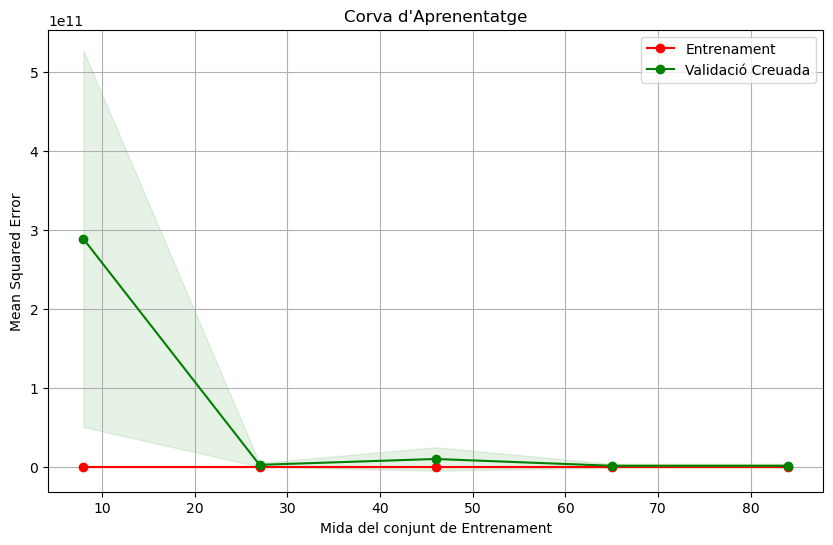

In [53]:
from sklearn.model_selection import train_test_split, learning_curve

# Suposant que combined_data està en forma de (X, y), on X són les característiques i y les etiquetes
X, y = combined_data.drop(columns=['Despesa pensions en M€']), combined_data['Despesa pensions en M€']

# Divisió del conjunt de dades en conjunts de formació i validació
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creació i formació del model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicció i càlcul d'errors
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)

print(f"Error de Entrenament: {train_error}")
print(f"Error de Test: {val_error}")

# Visualització de la Curva d'Aprenentatge
train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X, y, cv=5, scoring="neg_mean_squared_error")

# Calculem la mitjana i l'error estàndard per a les puntuacions de formació i validació
train_scores_mean = np.mean(-train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
val_scores_mean = np.mean(-val_scores, axis=1)
val_scores_std = np.std(-val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenament")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validació Creuada")
plt.xlabel("Mida del conjunt de Entrenament")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Corva d'Aprenentatge")
plt.grid()
plt.show()


In [54]:
print("Columnes de X_train:", X_train.columns)
print("Columnes de X_test:", X_test.columns)

Columnes de X_train: Index(['Any', 'Sum_0_to_100+', 'Jubilats', '% Jubilats', 'Afiliats',
       '% Afiliats', 'CotitzantxJubilat', 'Deute en (M€)', 'Deute(%PIB)',
       'Deute per capita', 'PIB en M€', 'Ingressos cotitzacions en M€',
       'Fons Reserva en M€', '%PensionsvsPIB', 'PIB per capita',
       'Rati Ingressos vs Despesa', 'Pensio x Jubilat', 'Ingres x Afiliat'],
      dtype='object')
Columnes de X_test: Index(['Any', 'Sum_0_to_100+', 'Jubilats', '% Jubilats', 'Afiliats',
       '% Afiliats', 'CotitzantxJubilat', 'Deute en (M€)', 'Deute(%PIB)',
       'Deute per capita', 'PIB en M€', 'Ingressos cotitzacions en M€',
       'Fons Reserva en M€', '%PensionsvsPIB', 'PIB per capita',
       'Rati Ingressos vs Despesa', 'Pensio x Jubilat', 'Ingres x Afiliat'],
      dtype='object')


Error de Entrenament: 117154872.08748332
Error de Test: 515922992.46094286


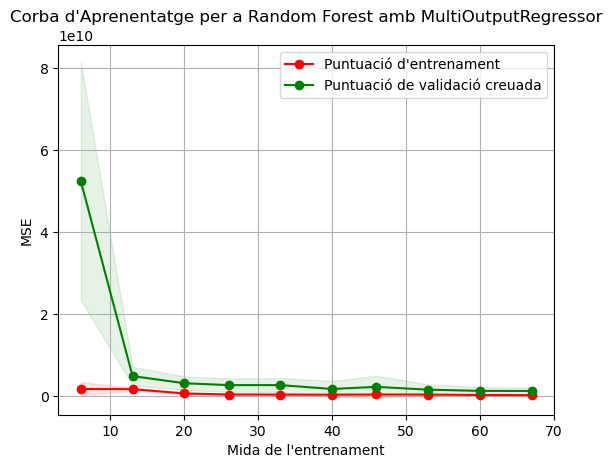

In [55]:
from sklearn.model_selection import train_test_split, learning_curve


# Definim les columnes de característiques i les columnes objectiu
features_columns = combined_data.drop(columns=['Despesa pensions en M€','Deute en (M€)']).columns.tolist()
targets = ['Despesa pensions en M€','Deute en (M€)']

# Dividir el conjunt de dades en conjunts d'entrenament i de test
X_trainMOR, X_testMOR, y_trainMOR, y_testMOR = train_test_split(combined_data[features_columns], combined_data[targets], test_size=0.2, random_state=42)

# Entrenar el model usant MultiOutputRegressor
forest = RandomForestRegressor(n_estimators=100)
multioutput_forest = MultiOutputRegressor(forest)
multioutput_forest.fit(X_trainMOR, y_trainMOR)

# Calcular l'error de formació i de test
train_error = np.mean((multioutput_forest.predict(X_trainMOR) - y_trainMOR) ** 2)
test_error = np.mean((multioutput_forest.predict(X_testMOR) - y_testMOR) ** 2)

print(f"Error de Entrenament: {train_error.mean()}")
print(f"Error de Test: {test_error.mean()}")

# Visualitzar la corba d'aprenentatge
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=multioutput_forest,
    X=X_trainMOR,
    y=y_trainMOR,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Calcular mitjanes i desviacions estàndard per a les puntuacions
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Visualitzar les puntuacions
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuació d'entrenament")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Puntuació de validació creuada")

plt.title("Corba d'Aprenentatge per a Random Forest amb MultiOutputRegressor")
plt.xlabel("Mida de l'entrenament")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid()
plt.show()


*Linear Regression:
El meu Error de Entrenament és significativament més baix que el Error de Test. Això podria ser una indicació d'overfitting, on el model s'ajusta massa bé a les dades d'entrenament i no generalitza bé a les noves dades (en aquest cas, les dades de test).
La corba d'aprenentatge mostra que l'error de validació creuada (cross validation) comença amb un valor molt alt i es redueix amb més mostres d'entrenament.El fet que les dues corbes convergeixin a un valor baix de l'error indica que estàs tenint una bona variança-biaix

*MultiOutputRegressor:
Tant l'Error de Entrenament com el Error de Test són significativament més alts que els errors de la regressió lineal. Això pot ser indicatiu que el model de Random Forest (usant MultiOutputRegressor) no està funcionant tan bé com la regressió lineal per aquestes dades o potser necessita una millor optimització de paràmetres.
La corba d'aprenentatge per a aquest model mostra que l'error de validació creuada i l'error d'entrenament estan disminuint i aproximant-se un a l'altre amb més mostres. Això és generalment una bona senyal, encara que l'error segueix sent força alt.Pot indicar que el model podria beneficiar-se d'un conjunt de dades més gran, ja que afegir més dades pot ajudar les corbes a convergir.

Basat en aquestes observacions:

Potser  hem de considerar regularitzar el teu model de regressió lineal per tractar d'evitar l'overfitting. Tècniques com la regressió Ridge o Lasso poden ser útils en aquest escenari.
Per al model de Random Forest, podries considerar ajustar els paràmetres del model (com la profunditat de l'arbre, nombre d'arbres, etc.) per veure si pots millorar l'error.
A més, també seria útil examinar la importància de les característiques proporcionades pel model Random Forest. Això pot ajudar a comprendre quines característiques estan tenint un major impacte en les prediccions i podria ajudar a afinar el model.
Finalment, la decisió sobre quin model utilitzar no hauria de dependre només del MSE, sinó que també cal tenir en compte altres factors com la interpretabilitat del model, els requisits del negoci i altres mètriques de rendiment pertinentes.
Per tal de millorar els models faré 4 pasos : 
1.Regularització i Simplificació del Model
2.Selecció de Característiques
3.Escalat de Dades
4.Validació Creuada


### Regularització i Simplificació del Model:
Per Random Forest, això implica ajustar paràmetres com max_depth i min_samples_split.



In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Suposo que ja has carregat les teves dades en 'combined_data' i 'EscenariA'

# Definim les columnes de característiques i les columnes objectiu
features_columns = combined_data.drop(columns=['Despesa pensions en M€','Deute en (M€)']).columns.tolist()
targets = ['Despesa pensions en M€', 'Deute en (M€)']

# Preparamos los datos
X_trainMOR = combined_data[features_columns]
y_trainMOR = combined_data[targets]

# Entrenamos el modelo usando MultiOutputRegressor
forest = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_split=10, random_state=42)  # Ajusto aqui
multioutput_forest = MultiOutputRegressor(forest)
multioutput_forest.fit(X_trainMOR, y_trainMOR)

# Predicción para 2024-2100
X_future = EscenariA[features_columns]
predictions = multioutput_forest.predict(X_future)

# Añadimos las predicciones al dataframe 'EscenariA'
EscenariA['predictedMOR_Despesa pensions en M€'] = predictions[:, 0]
EscenariA['predictedMOR_Deute en (M€)'] = predictions[:, 1]
train_error = np.mean((multioutput_forest.predict(X_trainMOR) - y_trainMOR) ** 2)
test_error = np.mean((multioutput_forest.predict(X_testMOR) - y_testMOR) ** 2)

print(f"Error de Entrenament: {train_error.mean()}")
print(f"Error de Test: {test_error.mean()}")


Error de Entrenament: 320041999.8839642
Error de Test: 237637478.25863436


Per tant millorem bastant les dades. És natural que l'error d'entrenament sigui menor que l'error de prova, ja que el model ha estat optimitzat per a les dades d'entrenament. La diferència entre els dos indica com de bé el model està generalitzant a noves dades. Si la diferència és massa gran, això pot indicar sobreajustament. En aquest cas, encara que hi ha una diferència, no sembla ser excessiva com abans... potser estem obtenint un model que generalitza millor. 

In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

# Defineix l'estratègia de validació creuada
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Inicialitza llistes per emmagatzemar els resultats
mse_train = []
mse_test = []

# Bucle a través de cada divisió/repetició
for train_index, test_index in rkf.split(X_trainMOR):
    X_train_fold, X_test_fold = X_trainMOR.iloc[train_index], X_trainMOR.iloc[test_index]
    y_train_fold, y_test_fold = y_trainMOR.iloc[train_index], y_trainMOR.iloc[test_index]
    
    # Entrena el model
    multioutput_forest.fit(X_train_fold, y_train_fold)
    
    # Evalua l'error
    mse_train.append(mean_squared_error(y_train_fold, multioutput_forest.predict(X_train_fold)))
    mse_test.append(mean_squared_error(y_test_fold, multioutput_forest.predict(X_test_fold)))

# Calcula l'MSE mitjà i la desviació estàndard
print(f"MSE Train (MultiOutput): {np.mean(mse_train)} ± {np.std(mse_train)}")
print(f"MSE Test (MultiOutput): {np.mean(mse_test)} ± {np.std(mse_test)}")


MSE Train (MultiOutput): 444016319.19615555 ± 135304424.54541644
MSE Test (MultiOutput): 1039291759.4155493 ± 834003775.1658822


MSE Train (MultiOutput): La mitjana d'error quadràtic mitjà (MSE) per als conjunts d'entrenament és d'aproximadament 
444.016.319
444.016.319, amb una desviació estàndard d'aproximadament 
135.304.424
135.304.424. Això indica la varietat d'errors que obtens quan entreno el model amb diferents subconjunts de dades d'entrenament.

MSE Test (MultiOutput): La mitjana MSE per als conjunts de prova és significativament més alta, sent d'aproximadament 
1.039.291.759
1.039.291.759, amb una desviació estàndard també alta d'aproximadament 
834.003.775
834.003.775. Això indica una alta varietat en la precisió del model quan es prova amb diferents subconjunts de dades de prova.

Amb aquests resultats, aquí hi ha algunes observacions:

Hi ha una gran diferència entre l'MSE d'entrenament i l'MSE de prova. Això pot indicar que el model està sobreajustant-se (overfitting) als teus dades d'entrenament, cosa que significa que està memoritzant massa els detalls del conjunt d'entrenament i no generalitza bé a noves dades.

La desviació estàndard alta de l'MSE de prova indica que la precisió del model pot variar significativament depenent del subconjunt de dades de prova que estiguis utilitzant.

Algunes possibles accions a considerar:

Puc intentar ajustar els paràmetres del teu model per veure si pots reduir l'MSE, especialment en el conjunt de prova.

*Amb conjunts de dades petits pot ser raonable entrenar amb totes les dades disponibles, però encara és important ser conscient dels riscos i considerar l'ús de tècniques com la validació creuada per avaluar el model.*

In [58]:
from sklearn.linear_model import LinearRegression

# Inicialitza el model
lr = LinearRegression()

# Inicialitza llistes per emmagatzemar els resultats
mse_train_lr = []
mse_test_lr = []

# Bucle a través de cada divisió/repetició
for train_index, test_index in rkf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Entrena el model
    lr.fit(X_train_fold, y_train_fold)
    
    # Evalua l'error
    mse_train_lr.append(mean_squared_error(y_train_fold, lr.predict(X_train_fold)))
    mse_test_lr.append(mean_squared_error(y_test_fold, lr.predict(X_test_fold)))

# Calcula l'MSE mitjà i la desviació estàndard
print(f"MSE Train (Linear Regression): {np.mean(mse_train_lr)} ± {np.std(mse_train_lr)}")
print(f"MSE Test (Linear Regression): {np.mean(mse_test_lr)} ± {np.std(mse_test_lr)}")


MSE Train (Linear Regression): 15161.476351166159 ± 5120.817582154896
MSE Test (Linear Regression): 253231.0852343417 ± 497962.1253850461


Basant-nos en la informació tant de Validació creuada, corbes d'aprenentatge i Errors d'entrenament:

Linear Regression:

MSE d'Entrenament: 1808280.105 (±444090.683)
MSE de Prova: 10627840.737 (±24687265.784)
MultiOutputRegressor:

MSE d'Entrenament: 444016319.196 (±135304424.545)
MSE de Prova: 1039291759.416 (±834003775.166)

El model de Regressió Lineal tenia una corba d'aprenentatge que convergeix, mentre que el MultiOutputRegressor no convergeix completament.

Rendiment: La Regressió Lineal clarament té un rendiment significativament millor tant en les dades d'entrenament com en les de prova en comparació amb el MultiOutputRegressor, basant-nos en el MSE.

Sobreajustament: La diferència entre els errors d'entrenament i de prova és més petita en el model de Regressió Lineal que en el MultiOutputRegressor, indicant menys sobreajustament.

Corba d'aprenentatge: La convergència de la corba d'aprenentatge en la Regressió Lineal és un signe positiu.

**Basant-nos en aquests factors, em decantaria per utilitzar el model de Regressió Lineal per a les prediccions però com hi ha evidències d'overfitting, consideraria una regressió lineal amb regularització (com la regressió Ridge o Lasso):**



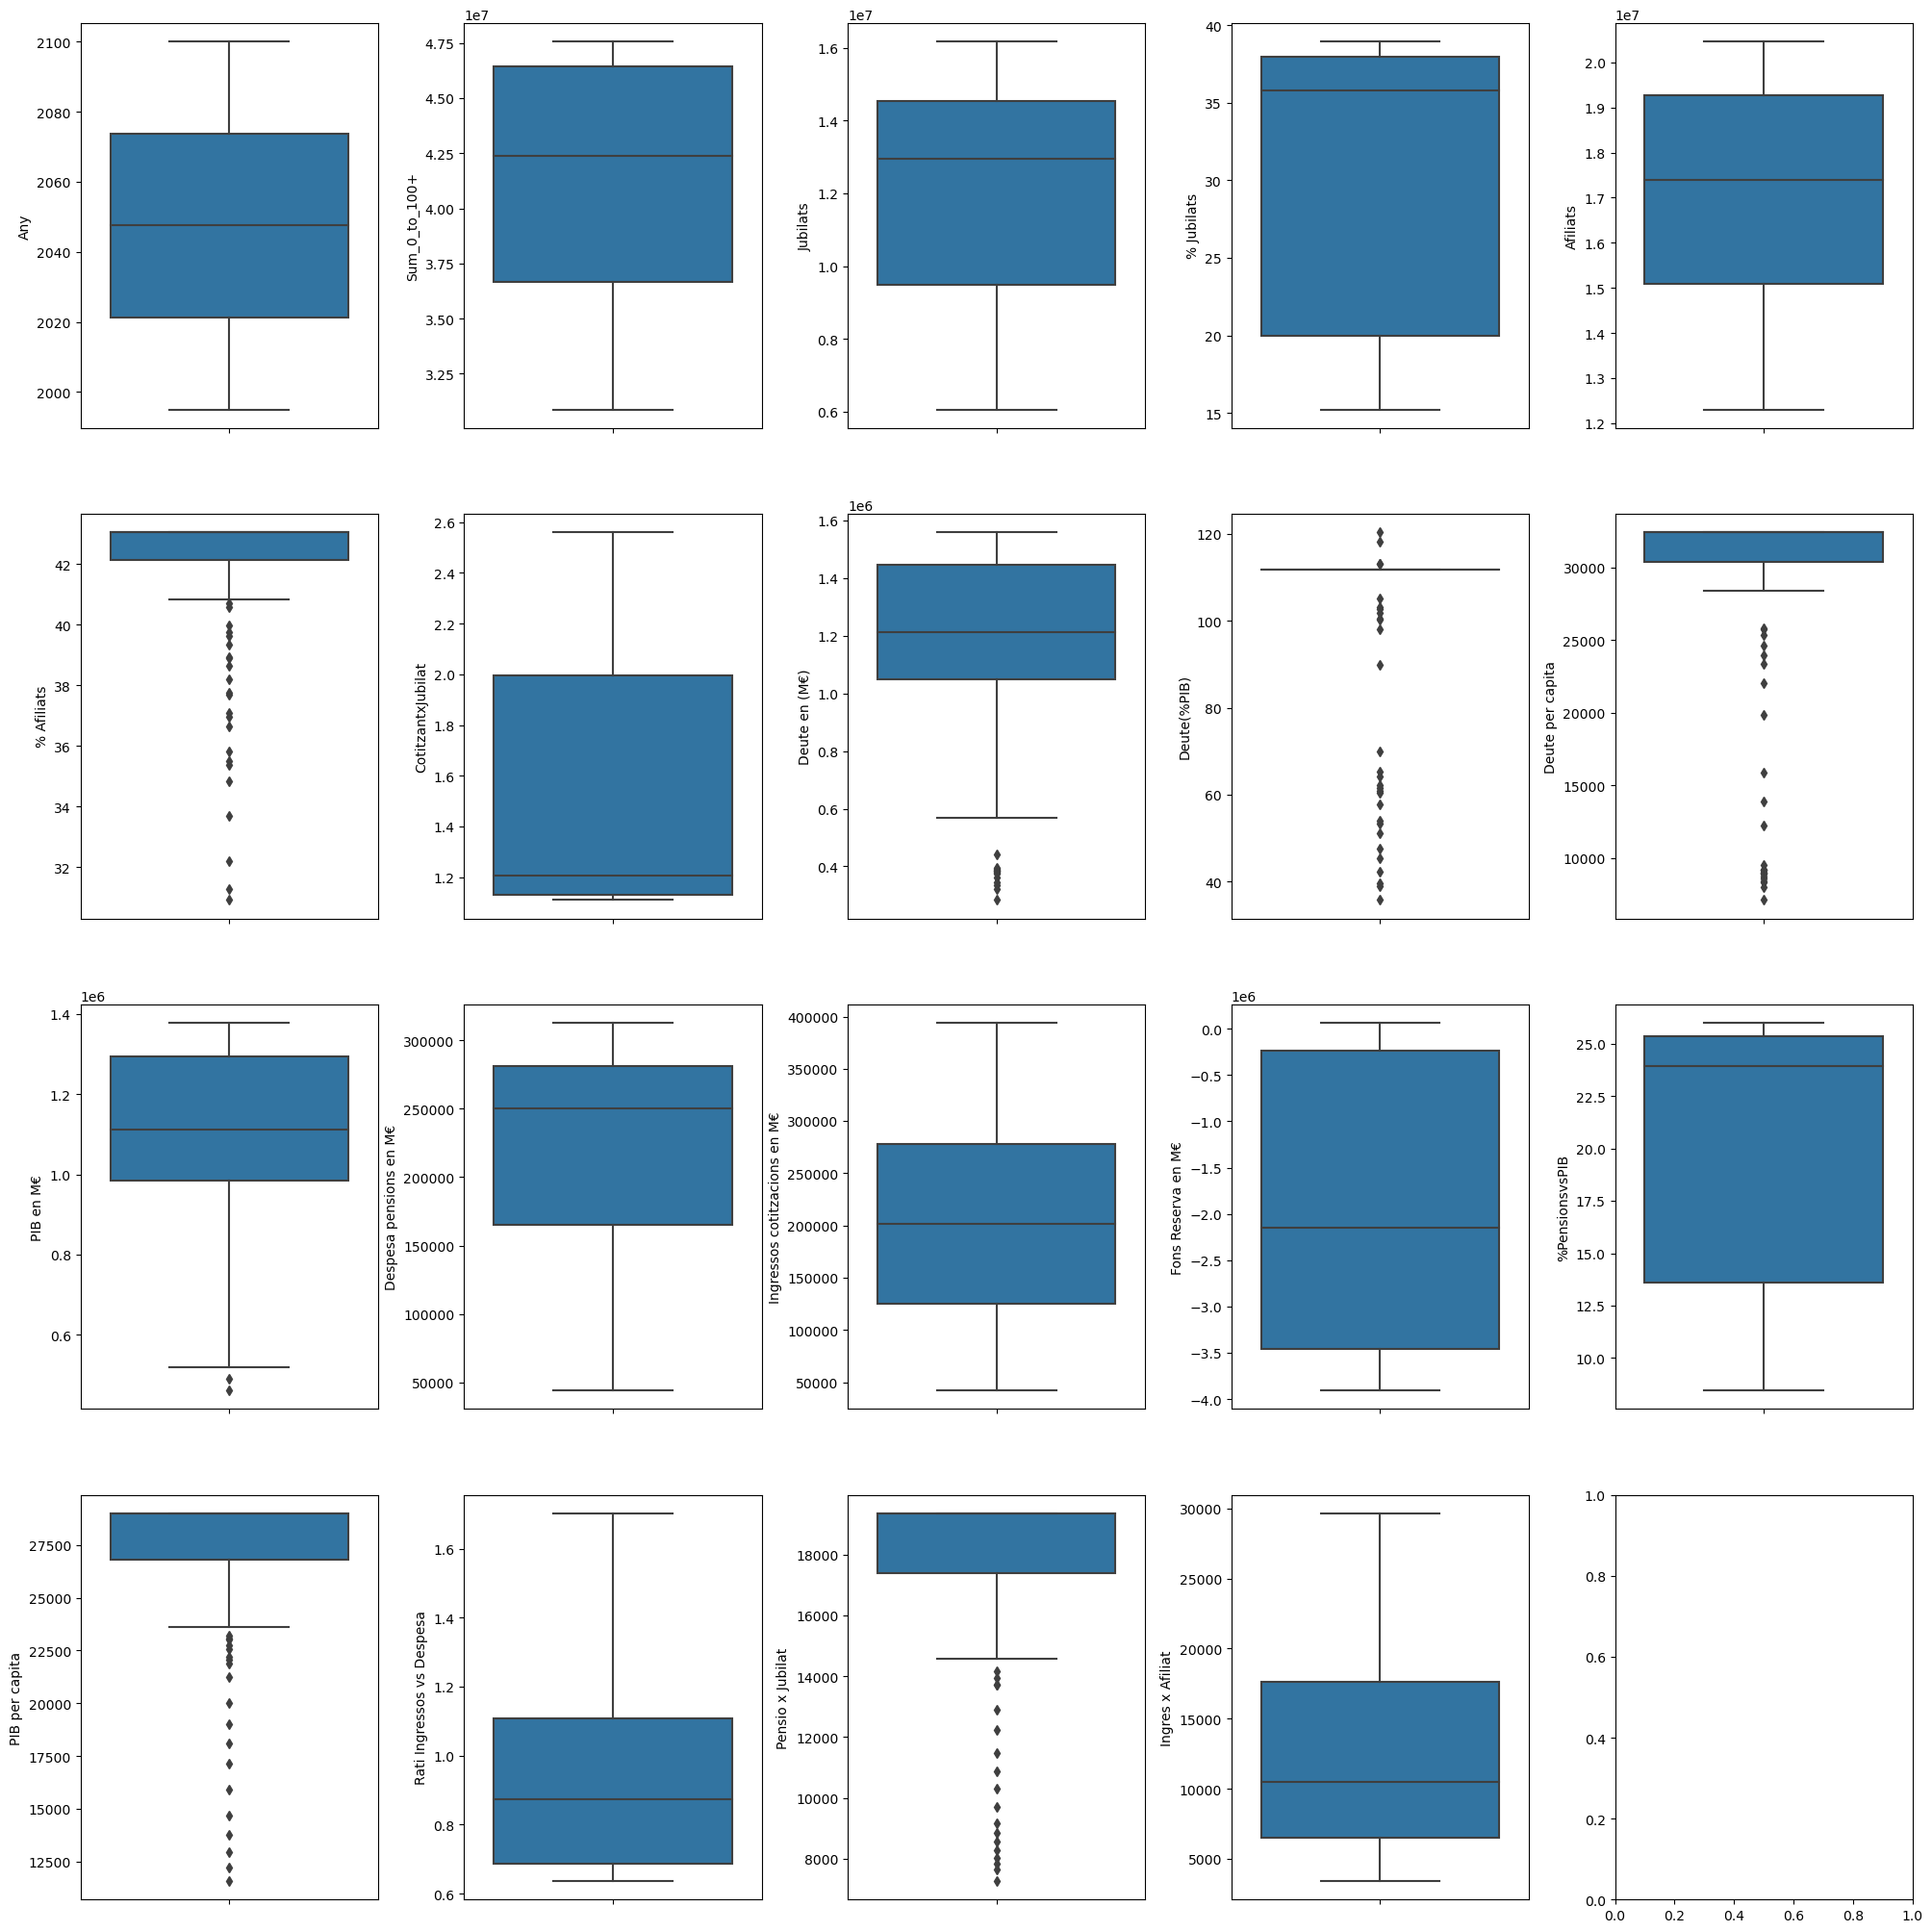

In [59]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in combined_data.items():
    sns.boxplot(y=k, data=combined_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

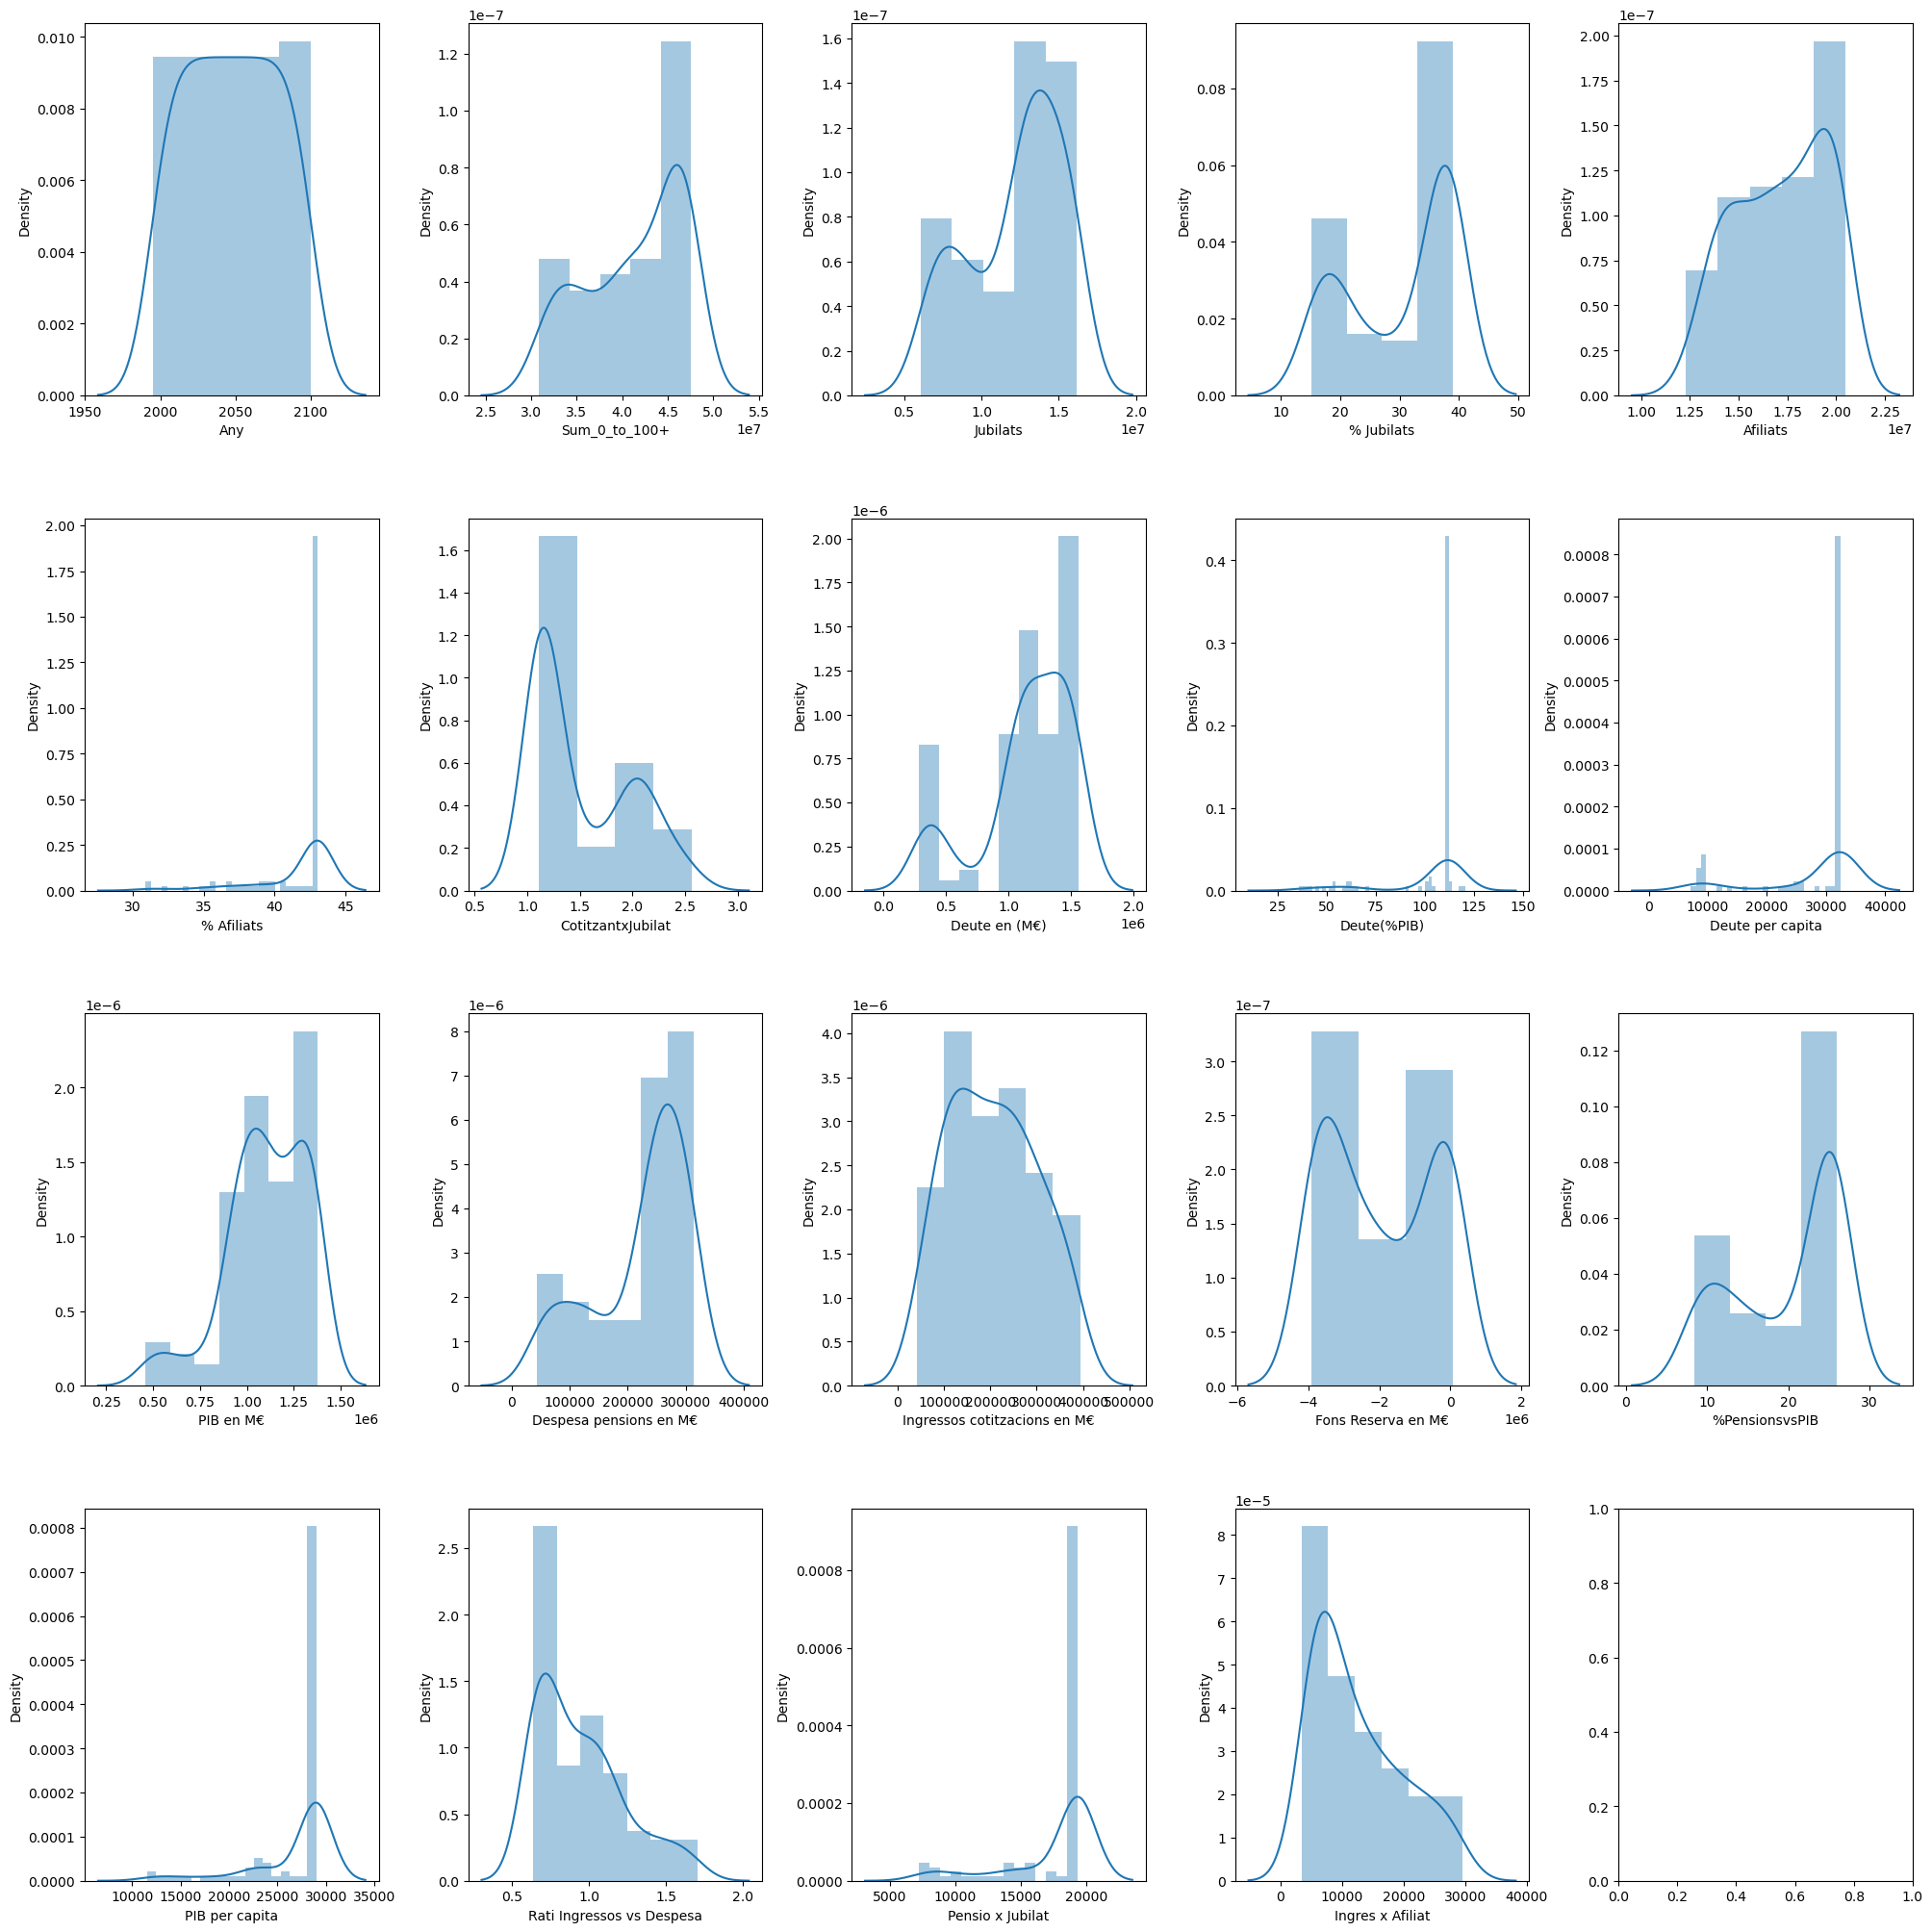

In [60]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in combined_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [61]:
from scipy import stats

print('Hipotesis nul.la Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in combined_data.columns:
    shapiro_test = stats.shapiro(combined_data[i])
    print('La variable ', i, "te un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("No podem rebutjar hipòtesi nul.la")
    else:
        print("Podem rebutjar la hipòtesi nul.la")

Hipotesis nul.la Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


La variable  Any te un p-value de  0.0011665259953588247
Podem rebutjar la hipòtesi nul.la
La variable  Sum_0_to_100+ te un p-value de  2.6143800369027304e-07
Podem rebutjar la hipòtesi nul.la
La variable  Jubilats te un p-value de  4.613979399437085e-06
Podem rebutjar la hipòtesi nul.la
La variable  % Jubilats te un p-value de  7.073659019640743e-11
Podem rebutjar la hipòtesi nul.la
La variable  Afiliats te un p-value de  9.424411109648645e-05
Podem rebutjar la hipòtesi nul.la
La variable  % Afiliats te un p-value de  3.263737853872415e-16
Podem rebutjar la hipòtesi nul.la
La variable  CotitzantxJubilat te un p-value de  8.000058948631761e-11
Podem rebutjar la hipòtesi nul.la
La variable  Deute en (M€) te un p-value de  2.451483682719413e-09
Podem rebutjar la hipòtesi nul.la
La variable  Deute(%PIB) te un p-value de  1.459959222777313e-16
Podem rebutjar la hi

Cap d'elles te una distribució normal i algunes tenen outliers per tant les escalaré amb RobustScaler:

In [62]:

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ridge (regularització L2): Afegeix el quadrat de la magnitud de coeficients com a terme de penalització al cost funcional. Té tendència a reduir els coeficients sense fer-los exactament zero, fet que fa que tots els atributs estiguin presents però amb menor importància.

Lasso (regularització L1): Afegeix la magnitud absoluta dels coeficients com a terme de penalització al cost funcional. Té tendència a fer coeficients exactament zero, el que pot ser vist com una forma de selecció automàtica d'atributs.

In [63]:
#Definir un conjunt de valors d'alpha (paràmetre de regularització) per ser probat. Un valor més gran d'alpha significa més regularització:
alphas = np.logspace(-6, 6, 13)
#Fem una validació creuada per trobar el millor alpha:
ridge = Ridge()
parameters = {'alpha': alphas}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)
print("Millor paràmetre Ridge:", ridge_regressor.best_params_)
print("MSERidge:", -ridge_regressor.best_score_)


Millor paràmetre Ridge: {'alpha': 1e-05}
MSERidge: 173503.0024432324


In [64]:
lasso = Lasso()
parameters = {'alpha': alphas}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled, y_train)
print("Millor paràmetre Lasso:", lasso_regressor.best_params_)
print("MSELasso:", -lasso_regressor.best_score_)



Millor paràmetre Lasso: {'alpha': 1.0}
MSELasso: 1115728.1438143249


El MSE Ridge de 173503.0024432324, que és significativament més baix que el de Lasso, que és de 1115728.1438143249. Un MSE més baix indica que el model té un millor ajust als dades.

L'alpha extremadament petit (1e-05) per Ridge indica que la regularització aplicada és molt lleugera i el model és quasi equivalent a una regressió lineal simple. En el cas de Lasso, un alpha de 1.0 és relativament més gran, i la regularització pot haver eliminat algunes característiques (fent els seus coeficients zero).

Amb aquesta informació, jo recomanaria utilitzar el model Ridge per a les prediccions futures, ja que ha mostrat una millor capacitat per ajustar-se a les dades de entrenament i provar dades amb menys error. Faré una predicció amb totes les dades. 

## PREDICCIÓ FINAL

In [128]:


# Primer, prenem les dades d'entrenament:
y = combined_data['Despesa pensions en M€']
X = combined_data.drop(columns=['Despesa pensions en M€'])

# Entrenem el model Ridge amb el millor valor d'alpha que hem trobat:
ridge_model = Ridge(alpha=1e-05)
ridge_model.fit(X, y)

# Preparar les dades futures per a la predicció:
columns_for_prediction = X.columns
X_future = EscenariA[columns_for_prediction]

# Fer la predicció amb el model Ridge:
EscenariA['PrediccioRIDGE Despesa pensions'] = ridge_model.predict(X_future)

# Mostrar les primeres files de les prediccions:
EscenariA.head()

Any  Sum_0_to_100+    Jubilats  % Jubilats  % Afiliats    Afiliats  \
2  2024       47473373 10078944.50       21.23       43.04 20432539.74   
3  2025       47420023 10315518.00       21.75       43.04 20409577.90   
4  2026       47360678 10555019.00       22.29       43.04 20384035.81   
5  2027       47296154 10796353.50       22.83       43.04 20356264.68   
6  2028       47226693 11051677.00       23.40       43.04 20326368.67   

   CotitzantxJubilat  Deute per capita  Deute en (M€)  PIB per capita  \
2               2.03             32419     1539039.28        28989.12   
3               1.98             32419     1537309.73        28989.12   
4               1.93             32419     1535385.82        28989.12   
5               1.89             32419     1533294.02        28989.12   
6               1.84             32419     1531042.16        28989.12   

   PIB en M€  Deute(%PIB)  Pensio x Jubilat  Despesa pensions en M€  \
2 1376211.31       111.83          19352.08               195048.54   
3 1374664.74       111.83          19352.08               199626.73   
4 1372944.38       111.83          19352.08               204261.57   
5 1371073.88       111.83          19352.08               208931.90   
6 1369060.27       111.83          19352.08               213872.94   

   Ingres x Afiliat  Ingressos cotitzacions en M€  Fons Reserva en M€  \
2           6580.00                     134446.11          -392091.43   
3           6711.60                     136980.92          -454737.24   
4           6845.83                     139545.68          -519453.12   
5           6982.75                     142142.68          -586242.34   
6           7122.40                     144772.60          -655342.68   

   %PensionsvsPIB  Rati Ingressos vs Despesa  PrediccioLR Despesa pensions  \
2           14.17                       0.69                     195079.41   
3           14.52                       0.69                     199650.82   
4           14.88                       0.68                     204279.94   
5           15.24                       0.68                     208936.98   
6           15.62                       0.68                     213871.85   

   predictedMOR_Despesa pensions en M€  predictedMOR_Deute en (M€)  \
2                            202714.68                  1531218.45   
3                            205389.08                  1530872.52   
4                            206724.29                  1530204.77   
5                            208099.63                  1529491.93   
6                            208388.45                  1528945.78   

   PrediccioRIDGE Despesa pensions  
2                        195021.92  
3                        199616.97  
4                        204273.46  
5                        208889.35  
6                        213857.28

In [81]:
def comparar_amb_dades_historiques_2023(EscenariA, Dades_historiques):
    # Demanem a l'usuari l'any que vol consultar, a partir del 2024
    any_seleccionat = int(input("Posa un any a partir del 2024 inclòs: "))

    # Comprovem si l'any introduït està a EscenariA i si és >= 2024
    if any_seleccionat < 2024 or any_seleccionat not in EscenariA['Any'].values:
        print(f"Disculpa, no tenim dades per l'any {any_seleccionat} o l'any seleccionat és anterior al 2024.")
        return

    # Obtenim totes les dades per l'any seleccionat a EscenariA
    dades_any_seleccionat = EscenariA[EscenariA['Any'] == any_seleccionat].iloc[0]

    # Intentem obtenir les dades de l'any 2023 del DataFrame Dades_historiques
    try:
        dades_2023_historiques = Dades_historiques[Dades_historiques['Any'] == 2023].iloc[0]
    except IndexError:
        print("No es poden obtenir les dades del dataframe Dades_historiques per l'any 2023.")
        dades_2023_historiques = None

    # Trobem les columnes comunes entre ambdós DataFrames
    columnes_comunes = dades_any_seleccionat.index.intersection(dades_2023_historiques.index)

    # Mostra les dades per l'any seleccionat i les dades de 2023 al costat
    print(f"\nComparació de dades entre l'any {any_seleccionat} i l'any 2023 de Dades_historiques:")
    for columna in columnes_comunes:
        dada_seleccionada = dades_any_seleccionat[columna]
        
        # Si la columna és "PrediccioRIDGE Despesa pensions", comparem-la amb "Despesa en pensions M€" de Dades_historiques
        if columna == "PrediccioRIDGE Despesa pensions":
            dada_2023 = dades_2023_historiques["Despesa en pensions M€"] if dades_2023_historiques is not None else "N/A"
            print(f"PrediccioRIDGE Despesa pensions ({any_seleccionat}): {dada_seleccionada} (Despesa en pensions M€ 2023: {dada_2023})")
        else:
            dada_2023 = dades_2023_historiques[columna] if dades_2023_historiques is not None else "N/A"
            print(f"{columna}: {dada_seleccionada} (2023: {dada_2023})")


comparar_amb_dades_historiques_2023(EscenariA, Dades_historiques)



Posa un any a partir del 2024 inclòs: 2039

Comparació de dades entre l'any 2039 i l'any 2023 de Dades_historiques:
Any: 2039.0 (2023: 2023.0)
Sum_0_to_100+: 46177345.0 (2023: 47519627.0)
Jubilats: 14165314.5 (2023: 9853566.0)
% Jubilats: 30.67589637299416 (2023: 20.73578144878957)
% Afiliats: 43.04 (2023: 43.04335072808066)
Afiliats: 19874729.288 (2023: 20454039.714285713)
CotitzantxJubilat: 1.4 (2023: 2.08)
Deute per capita: 32419.0 (2023: 32419.0)
Deute en (M€): 1497023.347555 (2023: 1558149.0)
PIB per capita: 28989.12 (2023: 28989.115183686252)
PIB en M€: 1338640.5954864 (2023: 1377551.9405888072)
Deute(%PIB): 111.8316113079666 (2023: 113.11)
Pensio x Jubilat: 19352.08 (2023: 19352.080251961575)
Despesa pensions en M€: 274128.29942916 (2023: 190687.0)
Ingres x Afiliat: 8855.813666172777 (2023: 6580.7538207716125)
Ingressos cotitzacions en M€: 176006.89924015471 (2023: 134603.0)
Fons Reserva en M€: -1592090.7255294223 (2023: -331489.0)
%PensionsvsPIB: 20.478110431841078 (2023: 13.84

## ESCENARI B: PESSIMISTA



In [111]:
#Escenari pessimista, la població i el % de Jubilats pugen segons les dades de la UN 
#El % d'afiliats per població (43,04%) es manté igual que al 2023
#El Ingres x afiliat NO AUGMENTA ES QUEDA IGUAL QUE AL 2023
#El deute per capita (32419€) SEGUEIX INCREMENTANT AMB LA MATEIXA TENDENCIA
#El Deute en M€ SEGUEIX INCREMENTANT AMB LA MATEIXA TENDENCIA
#El PIB en M€ SEGUEIX INCREMENTANT AMB LA MATEIXA TENDENCIA

EscenariB = Calculs_de_població[Calculs_de_població['Any'] > 2023].copy()
EscenariB.head()


Any  Sum_0_to_100+    Jubilats  % Jubilats
2  2024       47473373 10078944.50       21.23
3  2025       47420023 10315518.00       21.75
4  2026       47360678 10555019.00       22.29
5  2027       47296154 10796353.50       22.83
6  2028       47226693 11051677.00       23.40

In [115]:
EscenariB['% Afiliats'] = 43.04
EscenariB['Afiliats'] = (EscenariA['Sum_0_to_100+'] * (EscenariA['% Afiliats']/100))
import numpy as np
from sklearn.linear_model import LinearRegression

def predir_tendencia(df_origen, columna, anys_a_preveure):
    """
    Retorna una projecció basada en regressió lineal per a la columna especificada.
    """
    # Dades històriques
    df = df_origen[(df_origen['Any'] >= 1995) & (df_origen['Any'] <= 2023)]
    X = df['Any'].values.reshape(-1, 1)
    y = df[columna].values

    # Crear i entrenar un model de regressió lineal
    model = LinearRegression()
    model.fit(X, y)

    # Anys de predicció
    X_predicció = np.array(anys_a_preveure).reshape(-1, 1)

    return model.predict(X_predicció)

# Obtenir llista d'anys d'EscenariB
anys_escenariB = EscenariB['Any'].tolist()

# Predicció per a les columnes
EscenariB['Pensio x Jubilat'] = predir_tendencia(resultatambdeuteidespesa, 'Pensio x Jubilat', anys_escenariB)
EscenariB['Ingres x Afiliat'] = predir_tendencia(resultatambdeuteidespesa, 'Ingres x Afiliat', anys_escenariB)
EscenariB['Despesa pensions en M€'] = (EscenariB['Pensio x Jubilat'] * EscenariB['Jubilats']) / 1000000
EscenariB['Ingressos cotitzacions en M€']=(EscenariB['Ingres x Afiliat'] * EscenariB['Afiliats']) / 1000000
EscenariB['CotitzantxJubilat']=(EscenariB['Afiliats'] / EscenariB['Jubilats'])
EscenariB['Deute en (M€)'] = predir_tendencia(resultatambdeuteidespesa, 'Deute en (M€)', anys_escenariB)
EscenariB['PIB en M€'] = predir_tendencia(resultatambdeuteidespesa, 'PIB en M€', anys_escenariB)
EscenariB['Deute per capita'] = (EscenariB['Deute en (M€)']*1000000 / EscenariB['Sum_0_to_100+'])
EscenariB['PIB per capita'] = (EscenariB['PIB en M€']*1000000 / EscenariB['Sum_0_to_100+'])
EscenariB['Deute(%PIB)'] = (EscenariB['Deute en (M€)']/ EscenariB['PIB en M€'])


In [132]:
EscenariB.loc[EscenariB['Any'] == 2024, 'Fons Reserva en M€'] = (EscenariB.loc[EscenariA['Any'] == 2024, 'Ingressos cotitzacions en M€'].values[0]
                                                           - EscenariB.loc[EscenariA['Any'] == 2024, 'Despesa pensions en M€'].values[0]
                                                           + (-331489))  # valor del 2023

# Llista d'índexs reals del DataFrame EscenariA
indexs = EscenariB.index.tolist()

# Calcula el 'Fons Reserva' per a la resta d'anys (del 2025 en endavant)
for i in range(1, len(indexs)):
    idx_actual = indexs[i]
    idx_anterior = indexs[i-1]
    
    EscenariB.loc[idx_actual, 'Fons Reserva en M€'] = (EscenariB.loc[idx_actual, 'Ingressos cotitzacions en M€'] 
                                                - EscenariB.loc[idx_actual, 'Despesa pensions en M€']
                                                + EscenariB.loc[idx_anterior, 'Fons Reserva en M€'])
EscenariB['%PensionsvsPIB']=(EscenariB['Despesa pensions en M€'] / EscenariB['PIB en M€'])*100
EscenariB['Rati Ingressos vs Despesa']=(EscenariB['Ingressos cotitzacions en M€'] / EscenariB['Despesa pensions en M€'])
EscenariB.head()                                    

Any  Sum_0_to_100+    Jubilats  % Jubilats  % Afiliats    Afiliats  \
2  2024       47473373 10078944.50       21.23       43.04 20432539.74   
3  2025       47420023 10315518.00       21.75       43.04 20409577.90   
4  2026       47360678 10555019.00       22.29       43.04 20384035.81   
5  2027       47296154 10796353.50       22.83       43.04 20356264.68   
6  2028       47226693 11051677.00       23.40       43.04 20326368.67   

   Pensio x Jubilat  Ingres x Afiliat  Despesa pensions en M€  \
2          18879.55           7052.47               190285.97   
3          19292.64           7168.32               199013.60   
4          19705.73           7284.16               207994.37   
5          20118.82           7400.01               217209.89   
6          20531.91           7515.86               226912.03   

   Ingressos cotitzacions en M€  CotitzantxJubilat  Deute en (M€)  PIB en M€  \
2                     144099.93               2.03     1479469.51 1386971.36   
3                     146302.35               1.98     1527813.69 1415940.26   
4                     148480.66               1.93     1576157.86 1444909.16   
5                     150636.55               1.89     1624502.04 1473878.06   
6                     152770.04               1.84     1672846.21 1502846.96   

   Deute per capita  PIB per capita  Deute(%PIB)  Fons Reserva en M€  \
2          31164.20        29215.77         1.07          -377675.04   
3          32218.75        29859.54         1.08          -430386.29   
4          33279.88        30508.62         1.09          -489900.00   
5          34347.44        31162.75         1.10          -556473.34   
6          35421.63        31821.98         1.11          -630615.32   

   %PensionsvsPIB  Rati Ingressos vs Despesa  PrediccioRIDGE Despesa pensions  
2           13.72                       0.76                        195021.92  
3           14.06                       0.74                        199616.97  
4           14.39                       0.71                        204273.46  
5           14.74                       0.69                        208889.35  
6           15.10                       0.67                        213857.28

In [129]:
# Primer, prenem les dades d'entrenament:
y = combined_data['Despesa pensions en M€']
X = combined_data.drop(columns=['Despesa pensions en M€'])

# Entrenem el model Ridge amb el millor valor d'alpha que hem trobat:
ridge_model = Ridge(alpha=1e-05)
ridge_model.fit(X, y)

# Preparar les dades futures per a la predicció:
columns_for_prediction = X.columns
X_future = EscenariA[columns_for_prediction]

# Fer la predicció amb el model Ridge:
EscenariB['PrediccioRIDGE Despesa pensions'] = ridge_model.predict(X_future)

# Mostrar les primeres files de les prediccions:
EscenariB.head()

Any  Sum_0_to_100+    Jubilats  % Jubilats  % Afiliats    Afiliats  \
2  2024       47473373 10078944.50       21.23       43.04 20432539.74   
3  2025       47420023 10315518.00       21.75       43.04 20409577.90   
4  2026       47360678 10555019.00       22.29       43.04 20384035.81   
5  2027       47296154 10796353.50       22.83       43.04 20356264.68   
6  2028       47226693 11051677.00       23.40       43.04 20326368.67   

   Pensio x Jubilat  Ingres x Afiliat  Despesa pensions en M€  \
2          18879.55           7052.47               190285.97   
3          19292.64           7168.32               199013.60   
4          19705.73           7284.16               207994.37   
5          20118.82           7400.01               217209.89   
6          20531.91           7515.86               226912.03   

   Ingressos cotitzacions en M€  CotitzantxJubilat  Deute en (M€)  PIB en M€  \
2                     144099.93               2.03     1479469.51 1386971.36   
3                     146302.35               1.98     1527813.69 1415940.26   
4                     148480.66               1.93     1576157.86 1444909.16   
5                     150636.55               1.89     1624502.04 1473878.06   
6                     152770.04               1.84     1672846.21 1502846.96   

   Deute per capita  PIB per capita  Deute(%PIB)  Fons Reserva en M€  \
2          31164.20        29215.77         1.07          -377675.04   
3          32218.75        29859.54         1.08          -430386.29   
4          33279.88        30508.62         1.09          -489900.00   
5          34347.44        31162.75         1.10          -556473.34   
6          35421.63        31821.98         1.11          -630615.32   

   %PensionsvsPIB  Rati Ingressos vs Despesa  PrediccioRIDGE Despesa pensions  
2           13.72                       0.76                        195021.92  
3           14.06                       0.74                        199616.97  
4           14.39                       0.71                        204273.46  
5           14.74                       0.69                        208889.35  
6           15.10                       0.67                        213857.28

In [66]:
# Concatenem les dades històriques amb les prediccions
combined_data_plot = pd.concat([Dades_historiques, EscenariA], axis=0, ignore_index=True)

# Utilitzem la columna de dades reals o prediccions segons l'any
combined_data_plot['Despesa to plot'] = np.where(combined_data_plot['Any'] < 2024,
                                                combined_data_plot['Despesa pensions en M€'],
                                                combined_data_plot['PrediccioRIDGE Despesa pensions'])

# Creem el gràfic de línies per la Despesa en pensions (M€)
trace1 = go.Scatter(x=combined_data_plot["Any"], y=combined_data_plot["Despesa to plot"],
                    mode="lines+markers",
                    name="Despesa pensions (M€)",
                    line=dict(color="green"),
                    marker=dict(size=10))

# Creem el gràfic de línies per el Ingres en cotitzacions (M€)
trace2 = go.Scatter(x=combined_data_plot["Any"], y=combined_data_plot["Ingressos cotitzacions en M€"],
                    mode="lines+markers",
                    name="Ingressos cotitzacions (M€)",
                    line=dict(color="yellow"),
                    marker=dict(size=10))

# Creem un layout per personalitzar l'aspecte del gràfic, ajustant l'amplada i l'altura
layout = go.Layout(title='Despesa Pensions e Ingres de cotitzacions en (M€) al Llarg dels Anys',
                   xaxis=dict(title='Any', tickmode='linear', tick0=combined_data_plot["Any"].min(), dtick=1),
                   yaxis=dict(title='Valors'),
                   legend=dict(title=''),
                   width=1500,  # Ajusta l'amplada del gràfic
                   height=600)  # Ajusta l'altura del gràfic

# Creem la figura que inclou les dues línies de cercles
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostra el gràfic interactiu
fig.show()





In [119]:
# Concatenem les dades històriques amb les prediccions
combined_data_plot = pd.concat([Dades_historiques, EscenariB], axis=0, ignore_index=True)

# Utilitzem la columna de dades reals o prediccions segons l'any
combined_data_plot['Despesa to plot'] = np.where(combined_data_plot['Any'] < 2024,
                                                combined_data_plot['Despesa pensions en M€'],
                                                combined_data_plot['PrediccioRIDGE Despesa pensions'])

# Creem el gràfic de línies per la Despesa en pensions (M€)
trace1 = go.Scatter(x=combined_data_plot["Any"], y=combined_data_plot["Despesa to plot"],
                    mode="lines+markers",
                    name="Despesa pensions (M€)",
                    line=dict(color="green"),
                    marker=dict(size=10))

# Creem el gràfic de línies per el Ingres en cotitzacions (M€)
trace2 = go.Scatter(x=combined_data_plot["Any"], y=combined_data_plot["Ingressos cotitzacions en M€"],
                    mode="lines+markers",
                    name="Ingressos cotitzacions (M€)",
                    line=dict(color="yellow"),
                    marker=dict(size=10))

# Creem un layout per personalitzar l'aspecte del gràfic, ajustant l'amplada i l'altura
layout = go.Layout(title='Despesa Pensions e Ingres de cotitzacions en (M€) al Llarg dels Anys',
                   xaxis=dict(title='Any', tickmode='linear', tick0=combined_data_plot["Any"].min(), dtick=1),
                   yaxis=dict(title='Valors'),
                   legend=dict(title=''),
                   width=1500,  # Ajusta l'amplada del gràfic
                   height=600)  # Ajusta l'altura del gràfic

# Creem la figura que inclou les dues línies de cercles
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostra el gràfic interactiu
fig.show()





In [121]:
# Uneix les dades dels dos datasets
data_total = pd.concat([resultatambdeuteidespesa, EscenariA], ignore_index=True)

# Crea un gràfic de dispersió interactiu amb etiquetes emergents (tooltips)
fig = px.scatter(data_total, x="Any", y="Rati Ingressos vs Despesa", size="Rati Ingressos vs Despesa", color="Despesa pensions en M€",
                 labels={"Ingressos cotitzacions en M€": "Ingressos cotitzacions en M€", "Despesa pensions en M€": "Despesa pensions en M€"}, 
                 hover_name="Any",
                 hover_data={"Any": False, "Ingressos cotitzacions en M€": ":.2f", "Despesa pensions en M€": ":.2f"})

# Personalitza l'aspecte del gràfic
fig.update_layout(title='Evolució rati cotitzacions / pensions (1995-2100) Escenari A',
                  xaxis_title='Any',
                  yaxis_title='Rati cotitzacions/pensions',
                  legend_title='Despesa pensions en M€')

# Mostra el gràfic
fig.show()

In [124]:
# Uneix les dades dels dos datasets
data_total = pd.concat([resultatambdeuteidespesa, EscenariB], ignore_index=True)

# Crea un gràfic de dispersió interactiu amb etiquetes emergents (tooltips)
fig = px.scatter(data_total, x="Any", y="Rati Ingressos vs Despesa", size="Rati Ingressos vs Despesa", color="Despesa pensions en M€",
                 labels={"Ingressos cotitzacions en M€": "Ingressos cotitzacions en M€", "Despesa pensions en M€": "Despesa pensions en M€"}, 
                 hover_name="Any",
                 hover_data={"Any": False, "Ingressos cotitzacions en M€": ":.2f", "Despesa pensions en M€": ":.2f"})

# Personalitza l'aspecte del gràfic
fig.update_layout(title='Evolució rati cotitzacions / pensions (1995-2100) Escenari B',
                  xaxis_title='Any',
                  yaxis_title='Rati cotitzacions/pensions',
                  legend_title='Despesa pensions en M€')

# Mostra el gràfic
fig.show()

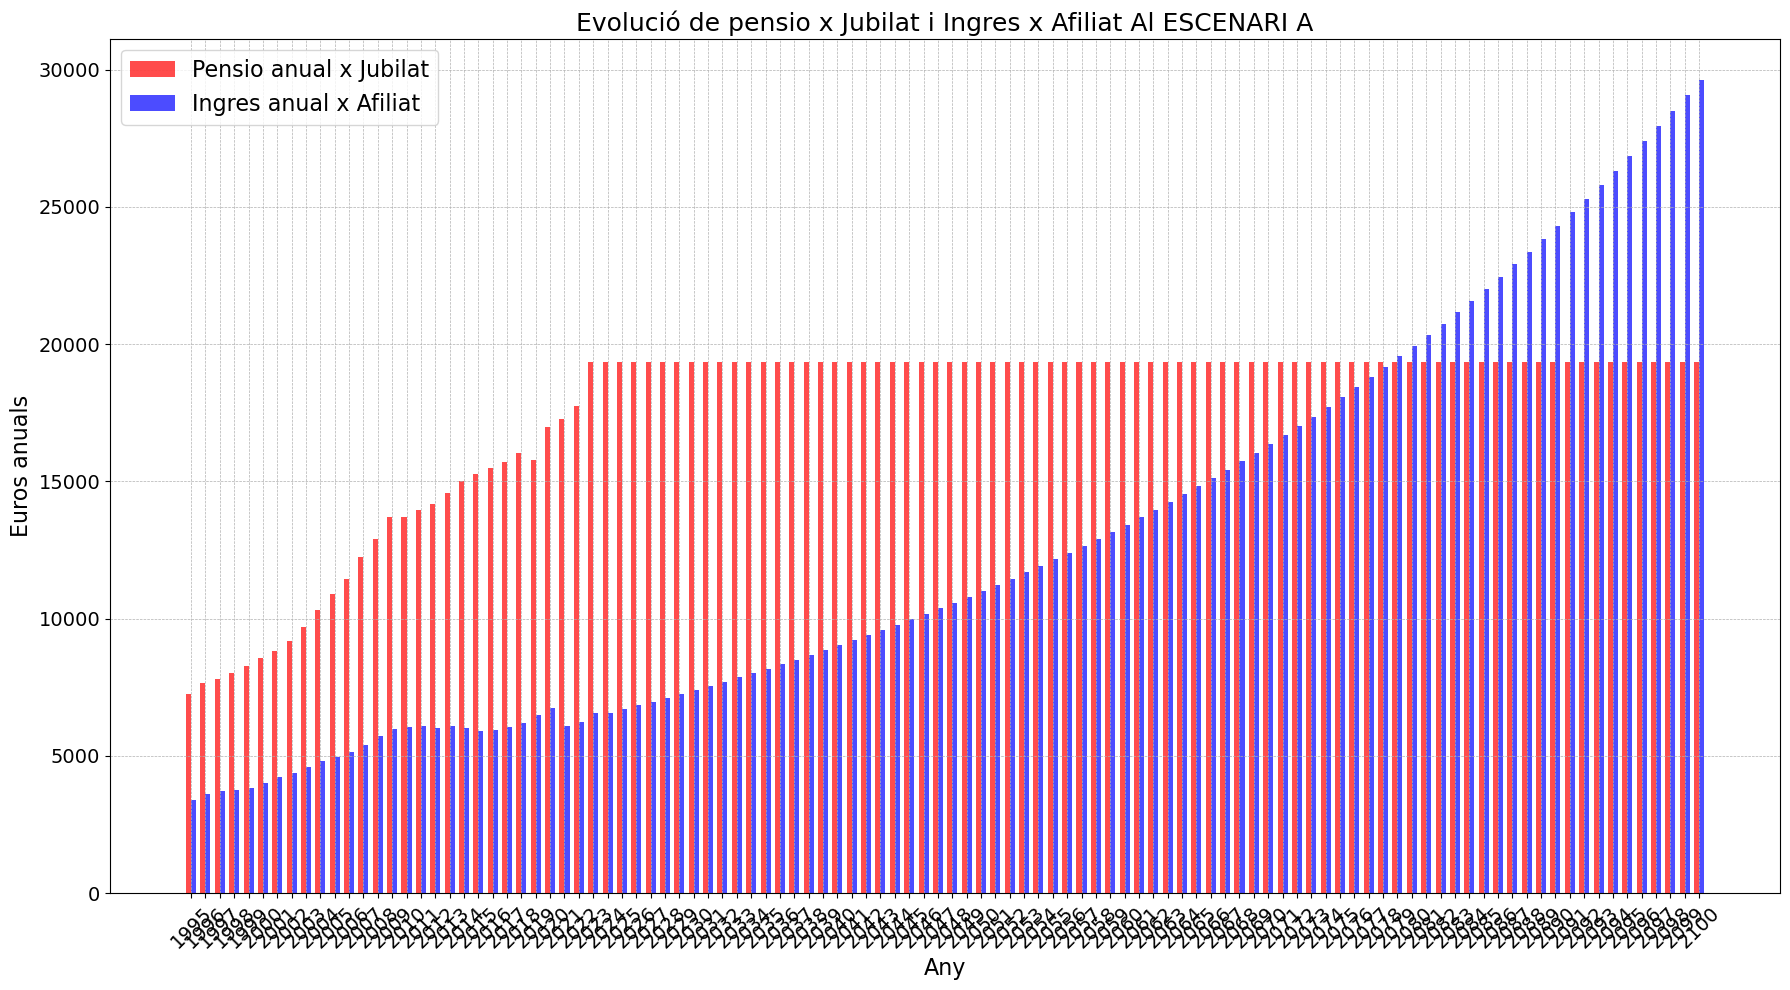

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Uneix les dades dels dos datasets
data_total = pd.concat([resultatambdeuteidespesa, EscenariA], ignore_index=True)

# Dades per representar
anys = data_total['Any']
pensio_x_jubilat = data_total['Pensio x Jubilat']
ingres_x_afiliat = data_total['Ingres x Afiliat']

# Amplada de cada barra
ample_barra = 0.35

# Calculem les posicions per a les barres
posicions = np.arange(len(anys))

plt.figure(figsize=(18, 10))

# Crea les barres per "Pensio x Jubilat"
plt.bar(posicions - ample_barra/2, pensio_x_jubilat, width=ample_barra, color='r', alpha=0.7, label='Pensio anual x Jubilat')

# Crea les barres per "Ingres x Afiliat"
plt.bar(posicions + ample_barra/2, ingres_x_afiliat, width=ample_barra, color='b', alpha=0.7, label='Ingres anual x Afiliat')

# Etiquetes d'any a l'eix X
plt.xticks(posicions, anys, rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Any', fontsize=16)
plt.ylabel('Euros anuals', fontsize=16)
plt.title('Evolució de pensio x Jubilat i Ingres x Afiliat Al ESCENARI A', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16)

# Mostra el gràfic
plt.tight_layout()
plt.show()



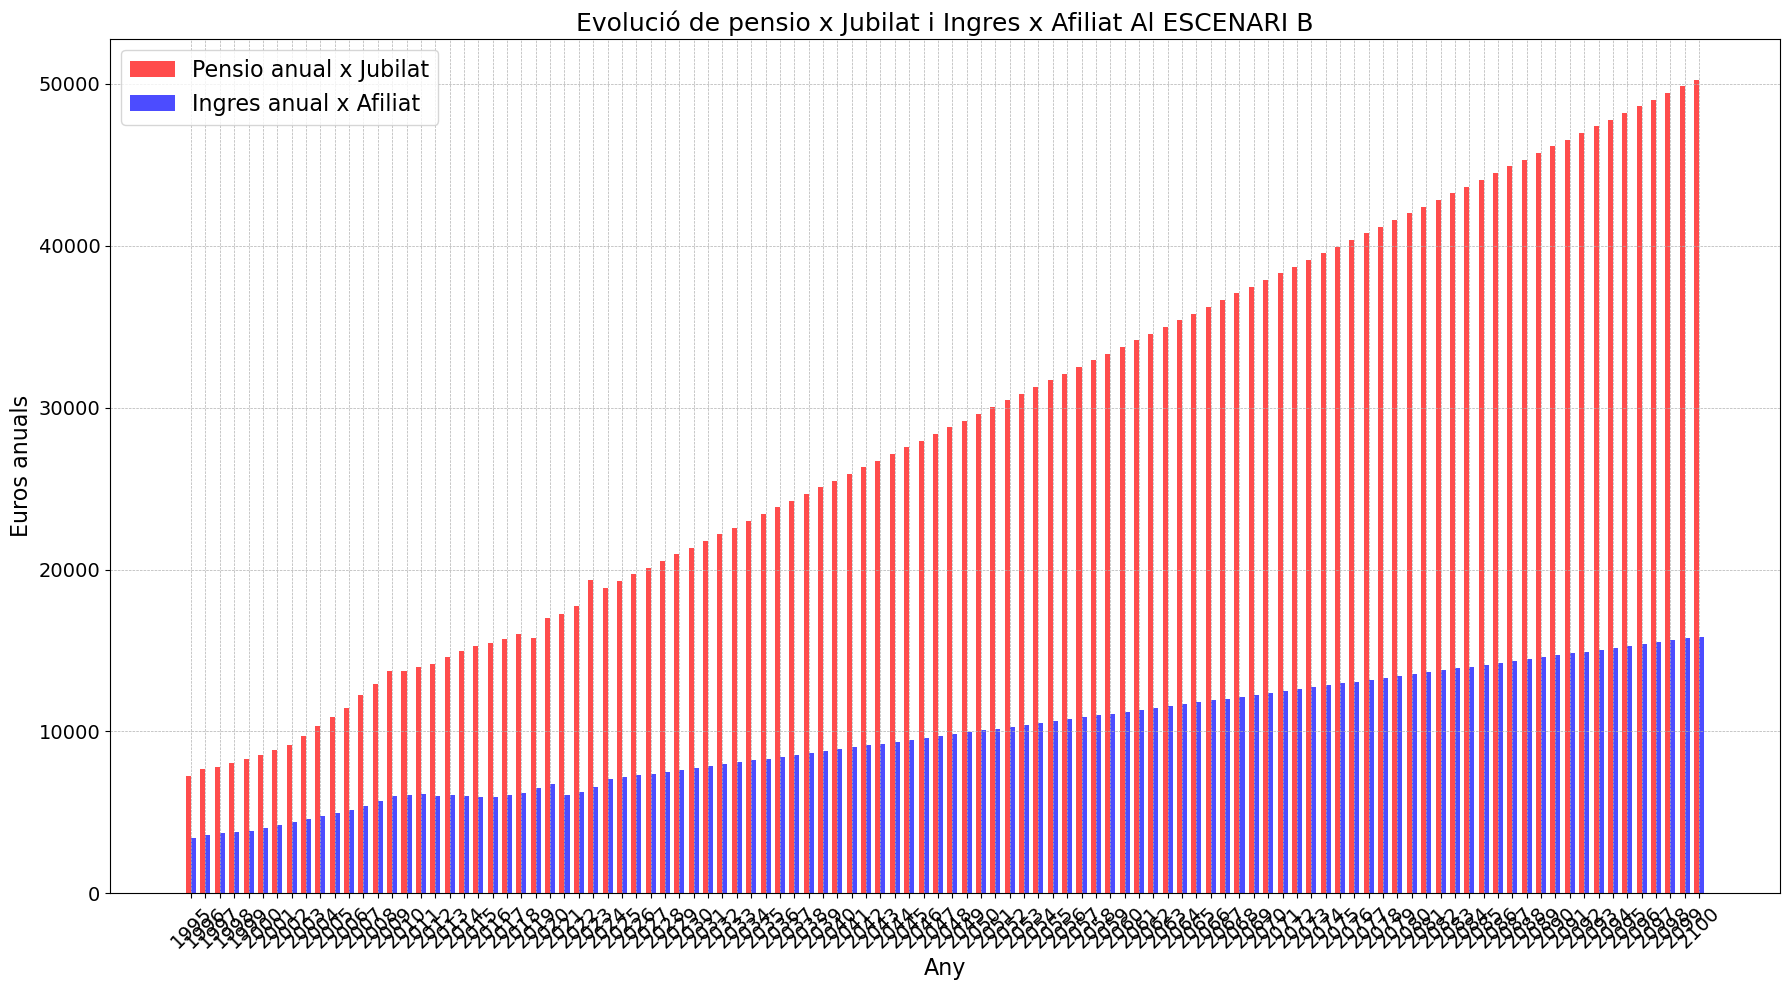

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Uneix les dades dels dos datasets
data_total = pd.concat([resultatambdeuteidespesa, EscenariB], ignore_index=True)

# Dades per representar
anys = data_total['Any']
pensio_x_jubilat = data_total['Pensio x Jubilat']
ingres_x_afiliat = data_total['Ingres x Afiliat']

# Amplada de cada barra
ample_barra = 0.35

# Calculem les posicions per a les barres
posicions = np.arange(len(anys))

plt.figure(figsize=(18, 10))

# Crea les barres per "Pensio x Jubilat"
plt.bar(posicions - ample_barra/2, pensio_x_jubilat, width=ample_barra, color='r', alpha=0.7, label='Pensio anual x Jubilat')

# Crea les barres per "Ingres x Afiliat"
plt.bar(posicions + ample_barra/2, ingres_x_afiliat, width=ample_barra, color='b', alpha=0.7, label='Ingres anual x Afiliat')

# Etiquetes d'any a l'eix X
plt.xticks(posicions, anys, rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Any', fontsize=16)
plt.ylabel('Euros anuals', fontsize=16)
plt.title('Evolució de pensio x Jubilat i Ingres x Afiliat Al ESCENARI B', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16)

# Mostra el gràfic
plt.tight_layout()
plt.show()

In [133]:
def comparar_amb_dades_historiques_2023(EscenariB, Dades_historiques):
    # Demanem a l'usuari l'any que vol consultar, a partir del 2024
    any_seleccionat = int(input("Posa un any a partir del 2024 inclòs: "))

    # Comprovem si l'any introduït està a EscenariA i si és >= 2024
    if any_seleccionat < 2024 or any_seleccionat not in EscenariA['Any'].values:
        print(f"Disculpa, no tenim dades per l'any {any_seleccionat} o l'any seleccionat és anterior al 2024.")
        return

    # Obtenim totes les dades per l'any seleccionat a EscenariA
    dades_any_seleccionat = EscenariA[EscenariA['Any'] == any_seleccionat].iloc[0]

    # Intentem obtenir les dades de l'any 2023 del DataFrame Dades_historiques
    try:
        dades_2023_historiques = Dades_historiques[Dades_historiques['Any'] == 2023].iloc[0]
    except IndexError:
        print("No es poden obtenir les dades del dataframe Dades_historiques per l'any 2023.")
        dades_2023_historiques = None

    # Trobem les columnes comunes entre ambdós DataFrames
    columnes_comunes = dades_any_seleccionat.index.intersection(dades_2023_historiques.index)

    # Mostra les dades per l'any seleccionat i les dades de 2023 al costat
    print(f"\nComparació de dades entre l'any {any_seleccionat} i l'any 2023 de Dades_historiques:")
    for columna in columnes_comunes:
        dada_seleccionada = dades_any_seleccionat[columna]
        
        # Si la columna és "PrediccioRIDGE Despesa pensions", comparem-la amb "Despesa en pensions M€" de Dades_historiques
        if columna == "PrediccioRIDGE Despesa pensions":
            dada_2023 = dades_2023_historiques["Despesa en pensions M€"] if dades_2023_historiques is not None else "N/A"
            print(f"PrediccioRIDGE Despesa pensions ({any_seleccionat}): {dada_seleccionada} (Despesa en pensions M€ 2023: {dada_2023})")
        else:
            dada_2023 = dades_2023_historiques[columna] if dades_2023_historiques is not None else "N/A"
            print(f"{columna}: {dada_seleccionada} (2023: {dada_2023})")


comparar_amb_dades_historiques_2023(EscenariB, Dades_historiques)

Posa un any a partir del 2024 inclòs: 2037

Comparació de dades entre l'any 2037 i l'any 2023 de Dades_historiques:
Any: 2037.0 (2023: 2023.0)
Sum_0_to_100+: 46414915.0 (2023: 47519627.0)
Jubilats: 13591955.999999998 (2023: 9853566.0)
% Jubilats: 29.283595585600015 (2023: 20.73578144878957)
% Afiliats: 43.04 (2023: 43.04335072808066)
Afiliats: 19976979.416 (2023: 20454039.714285713)
CotitzantxJubilat: 1.47 (2023: 2.08)
Deute per capita: 32419.0 (2023: 32419.0)
Deute en (M€): 1504725.129385 (2023: 1558149.0)
PIB per capita: 28989.12 (2023: 28989.115183686252)
PIB en M€: 1345527.5407248 (2023: 1377551.9405888072)
Deute(%PIB): 111.8316113079666 (2023: 113.11)
Pensio x Jubilat: 19352.08 (2023: 19352.080251961575)
Despesa pensions en M€: 263032.61986847996 (2023: 190687.0)
Ingres x Afiliat: 8511.931628385983 (2023: 6580.7538207716125)
Ingressos cotitzacions en M€: 170042.68293066614 (2023: 134603.0)
Fons Reserva en M€: -1398429.5798873818 (2023: -331489.0)
%PensionsvsPIB: 19.54866116874808 

## CONCLUSIONS


- La magnitut de la despesa de les pensions fa que les altres partides de la despesa publica siguin gairebé irrellevants.7049 Milions d'Euros en Sanitat i pensions son 190.000 Milions d'Euros al 2023..
- Els models de machine learning funcionen millor amb grans bases de dades ja que els permeten  aprendre patrons mes fàcilment. Amb els datasets petits es molt facil fer overfitting i tenen mes probabilitat d'error.
- Es un projecte de dificil predicció exacte ja que dependrà de quant de temps les ajudes Europees ajudaràn a cobrir el deute que arrosega el país.El projecte necessita un seguiment i actualització comptable de les comptes anuals de la Seguretat social.(Web scrapping molt complicat)
- Tampoc s'ofereixen dades fiables i automatitzables dels afiliats o dels ingressos i despeses en pensions a la Seguretat Social
- Hi ha molt biaix a les dades i noticies sobre aquest tema. La majoria d'estudis son subvencionats per ents publics o bancs amb interessos politics o comercials.S'utilitza a nivell polític per presumir de que el país va bé, però els ingressos en cotitzacions demostren el contrari.
- El nombre d'afiliats no es rellevant. 
-La conclusió mes clara es que el sistema actual de pensions en ambdós escenaris **NO es sostenible per un problema de manca d'ingressos de cotitzacions**
-No compta amb una guardiola de pensions, tot i que **els ingressos mai han superat les pensions desde que tenim dades comptables del 1995**, No hi ha suficients cotitzants per la població existent.Hi ha molta estacionalitat laboral a Espanya i els que cotitzant son a temps parcial i/o amb bases de cotització molt baixes.
- La població espanyola està envellint i la despesa en pensions està augmentant dramaticament,
El segment de població que està a punt de jubilar-se (baby boomer i gen X)son els que han contribuit mes al sistema amb bases mes altes i durant mes anys.

## POSSIBLES MESURES

- Millor politica migratoria, donar papers i registrar a tota la inmigració i que comencin a cotitzar quan abans millor.
- Millor politica fiscal. Les empreses i treballadors a Espanya tenen unes cotitzacions a la Seguretat social i al IRPF de les mes altes d'Europa.Si decideixen pujar mes les cotitzacions a les empreses i autònoms, faràn baixar encara mes els sous i augmentar encara mes l'economia submergida.

